## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
from sklearn.feature_selection import RFE

/Users/shivamgautam/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/shivamgautam/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/shivamgautam/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Importing data

In [4]:
titanic = pd.read_csv('train_titanic.csv')
titanic.head()

FileNotFoundError: File b'train_titanic.csv' does not exist

In [5]:
titanic.shape

NameError: name 'titanic' is not defined

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Making all column names lowercase so that we dont have to worry about cases
titanic.columns = [x.lower() for x in titanic.columns]
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data exploration

Columns like name,ticket and passengerid are just id-variables and would not add any value to our analysis. Let's drop them at the start.

In [10]:
titanic.drop(['passengerid','name','ticket'],axis = 1, inplace = True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Null values

In [11]:
# Columns having null values
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

Cabin column has 687 rows blank out of 891 or almost 77% of the data is blank. These kind of columns cannot add value to our analysis and should be dropped.

In [12]:
# Cabin has large number of missing values, so dropping it for now
titanic.drop('cabin',axis = 1, inplace = True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [14]:
mean_value = titanic['age'].mean()
titanic['age'] = titanic['age'].fillna(mean_value)
titanic.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [15]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [16]:
# Embarked column has two missing values - we can either drop the two rows or impute them with the highest occurring value
# dropping them for now
titanic.dropna(inplace = True)

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
survived    889 non-null int64
pclass      889 non-null int64
sex         889 non-null object
age         889 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
fare        889 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Unique value counts

In [19]:
# if any of the columns has just 1 value - we should remove that column
# if any of the text/string type column has huge number of distinct values, we should look at that column
for x in titanic.columns:
    print(x,titanic[x].nunique())

survived 2
pclass 3
sex 2
age 89
sibsp 7
parch 7
fare 247
embarked 3


### Variables - 1 by 1

#### Survived

In [99]:
titanic['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

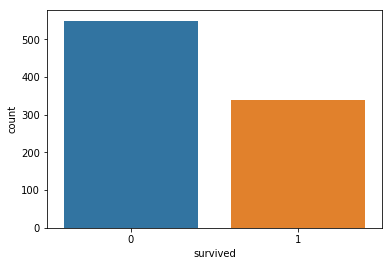

In [100]:
sns.countplot(titanic['survived'])

Number of people who survived is less than the number of people who did not survive.

#### Pclass or passenger class

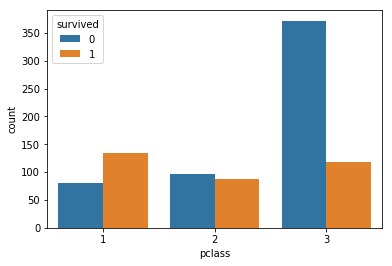

In [101]:
sns.countplot(titanic['pclass'],hue = titanic['survived'])

pclass = 3 shows much lesser survival rates as compared to other classes.

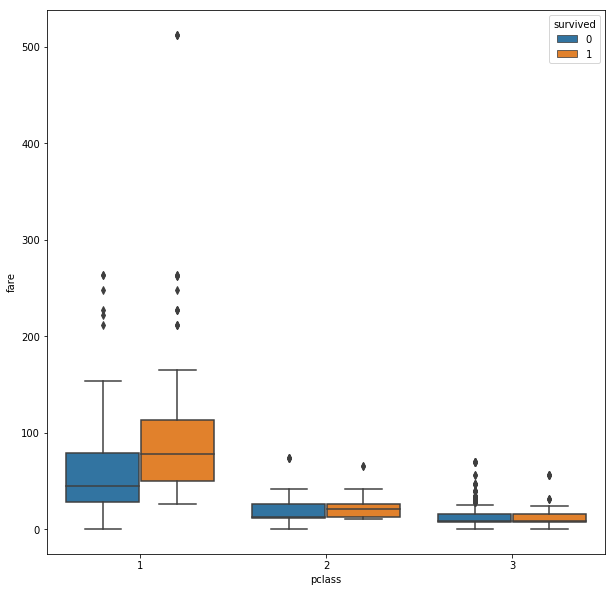

In [102]:
plt.figure(figsize = (10,10))
sns.boxplot(x='pclass', y='fare', data=titanic, hue="survived")

pclass = 1 has the highest fare and survival rates while pclass = 3 is on the other end which possibly indicates that the rooms for this class were somewhere in the middle and not easily accessible.

#### Gender

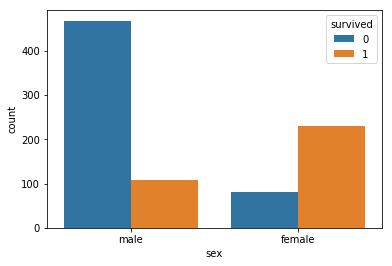

In [103]:
sns.countplot(titanic['sex'],hue = titanic['survived'])

Males seem to have a lower probability of survival than females.

#### Age

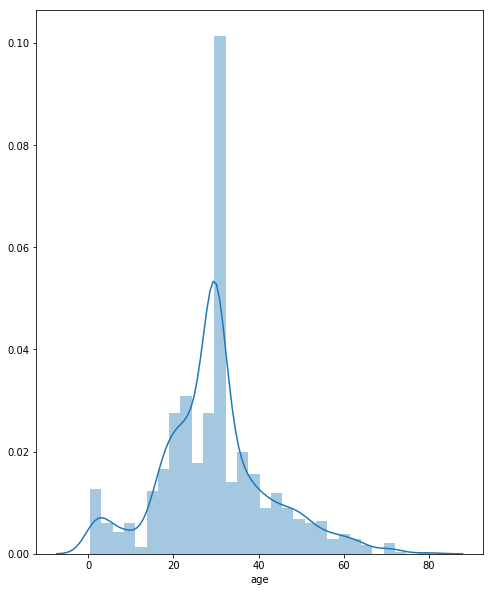

In [20]:
plt.figure(figsize = (8,10))
#continuous variable
sns.distplot(titanic['age'])

In [21]:
titanic['age'].skew()

0.43172026491227716

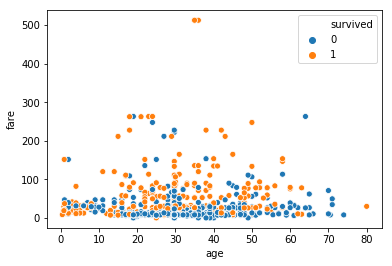

In [106]:
# scatterplot...may not be too relevant in this context
sns.scatterplot(x = 'age', y = 'fare',hue = 'survived', data = titanic)

#### SibSp or Siblings and spouse

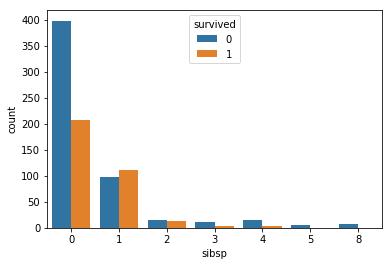

In [107]:
sns.countplot(titanic['sibsp'],hue = titanic['survived'])

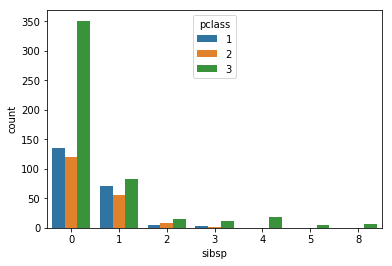

In [108]:
sns.countplot(titanic['sibsp'],hue = titanic['pclass'])

Looks like people travelling alone have lesser chances of survival and passengers of pclass = 3 are travelling alone.

#### Parch or parent/children

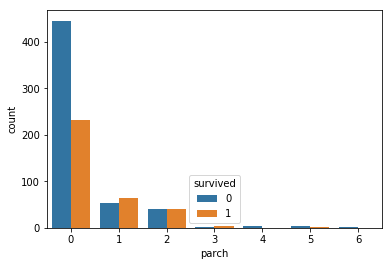

In [109]:
sns.countplot(titanic['parch'],hue = titanic['survived'])

#### Fare

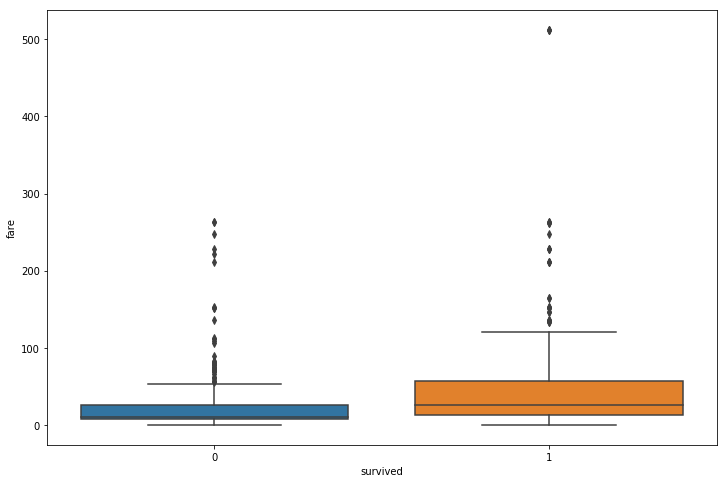

In [110]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'survived',y = 'fare',data = titanic)

Clearly shows that the mean fare for people who survived was higher than the ones who did not survive.

#### Embarked

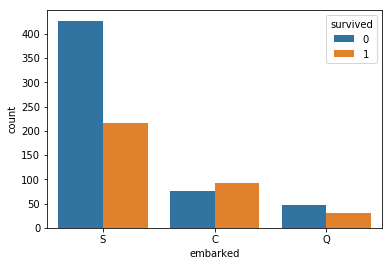

In [111]:
sns.countplot(titanic['embarked'],hue = titanic['survived'])

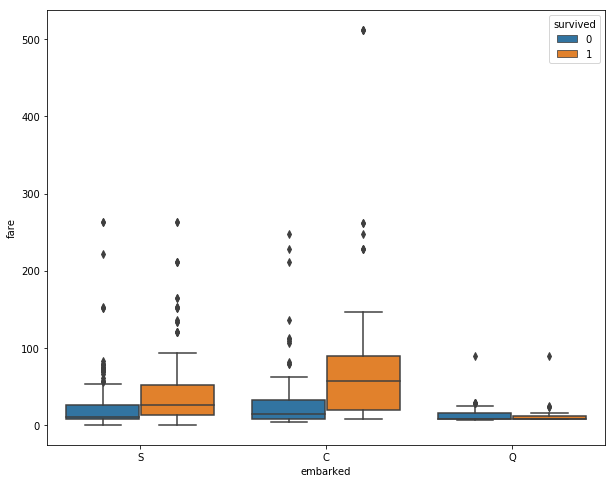

In [112]:
plt.figure(figsize = (10,8))
sns.boxplot(x='embarked', y='fare', data=titanic, hue="survived")

passengers who embarked from port C have paid higher fares and have better survival rates.

F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


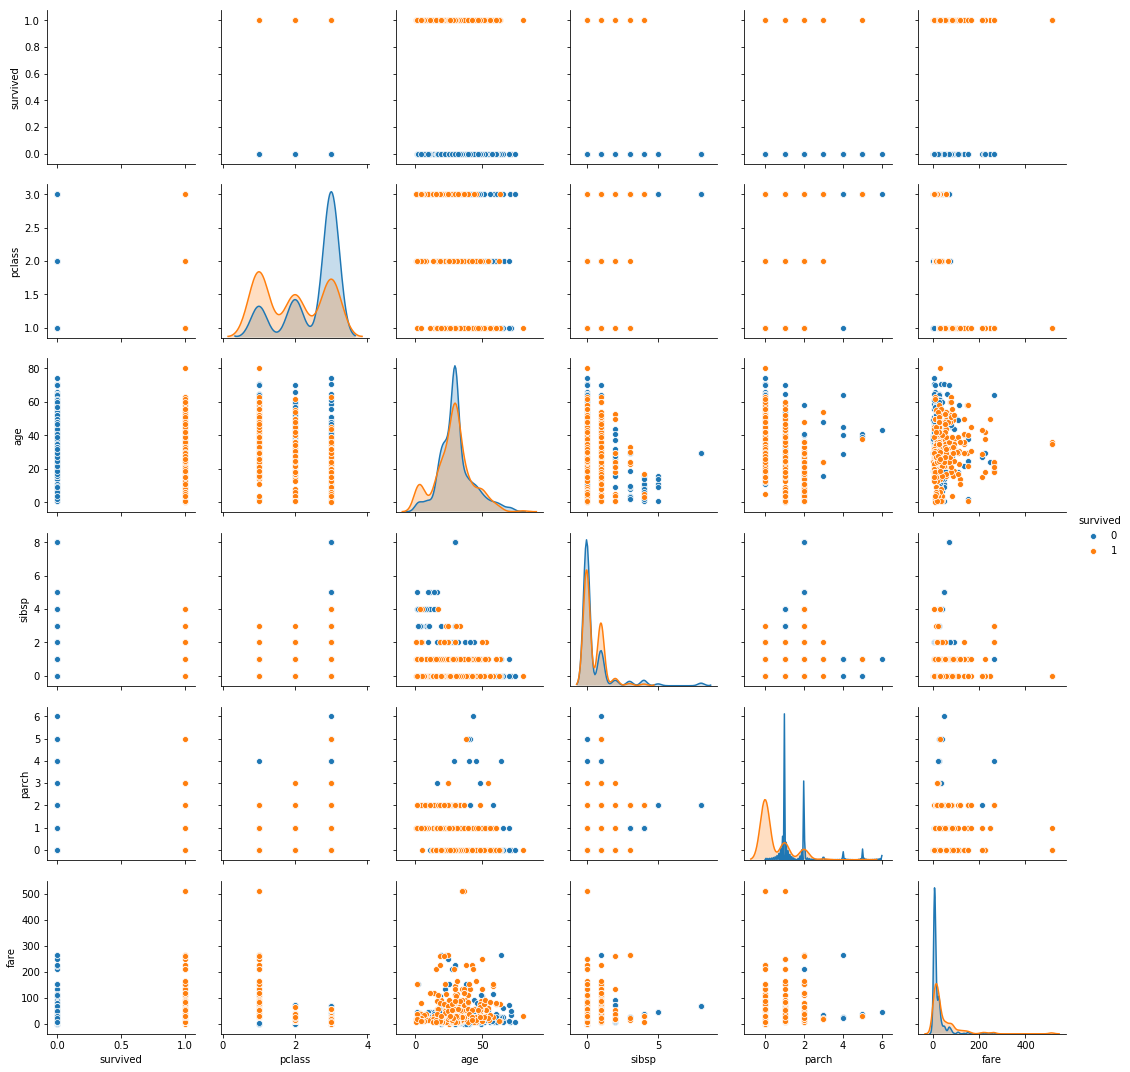

In [113]:
sns.pairplot(titanic,hue = 'survived')

## Data prep

### Dummy variables

In [114]:
sex = pd.get_dummies(titanic['sex'],drop_first= True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [115]:
pclass = pd.get_dummies(titanic['pclass'],drop_first= True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [116]:
embarked = pd.get_dummies(titanic['embarked'],drop_first= True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [117]:
t2 = pd.concat([titanic,sex,pclass,embarked],axis = 1)
t2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,male,2,3,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


### Dropping few columns

In [118]:
# dropping columns given that we alreayd have dummy vars for them
t3 = t2.drop(['sex','embarked','pclass'],axis = 1)
t3.columns = ['survived','age','sibsp','parch','fare','male','pclass_2','pclass_3','embarked_q','embarked_s']
t3.head()

,survived,age,sibsp,parch,fare,male,pclass_2,pclass_3,embarked_q,embarked_s
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


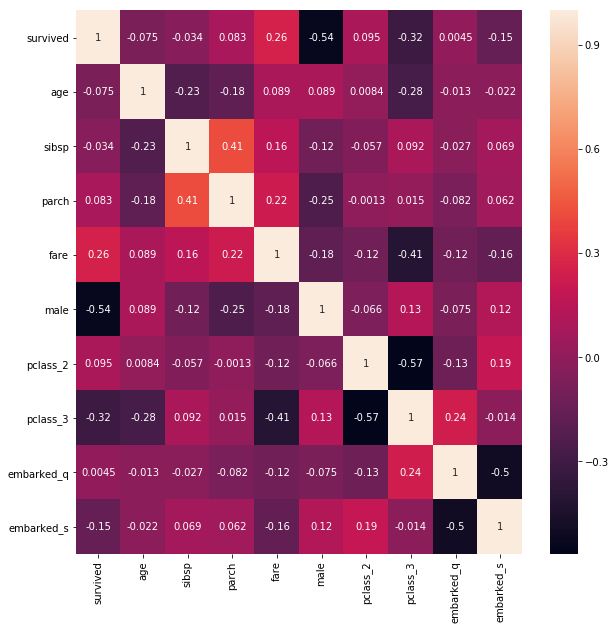

In [119]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmcAAAJ2CAYAAAAaOCUvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xd4FNUax/Hv2U0hFZIA2QRQQlM6IaFITSgBghRFRUQQRUEQCwJKU1BpKtgQBa6AAldARQGpoVfpEJoCIaGmUEJIrzv3j12XVKRsyOJ9P8/DY3bmzO4v4+zZs++cmShN0xBCCCGEELZBV9IBhBBCCCHETTI4E0IIIYSwITI4E0IIIYSwITI4E0IIIYSwITI4E0IIIYSwITI4E0IIIYSwITI4E0IIIYSwITI4E0IIIYSwITI4E0IIIYSwIXYlHeBBk3U18oH6kwofBI4t6Qh3zFV78L4z+GU+UIcFtZ1ulHSEOxYYfaSkI9yRhR4tSzrCHftSF1vSEe7YMzqfko5wR47pM0o6wh2bdfZndT9f735/ztqXrXJff7/b8eB9CgphYx60gZkQQgjbJoMzIYQQQggbIqc1hRBCCGE7jDklnaDESeVMCCGEEMKGSOVMCCGEELZDM5Z0ghInlTMhhBBCCBsilTMhhBBC2A6jVM6kciaEEEIIYUOkciaEEEIIm6HJnDOpnAkhhBBC2BKpnAkhhBDCdsicM6mcCSGEEELYEhmcCSGEEELYEDmtKYQQQgjbIRcESOVMCCGEEMKWSOVMCCGEELZD/vC5VM6EEEIIIWyJVM6EEEIIYTtkzplUzoQQQgghbIlUzoQQQghhO+QmtFI5E0IIIYSwJVI5E0IIIYTNkD98LoOzEjd20mds27kXT48yLFs4s0SzdB7XlxrBDchKy2Tp8JnEHD9boI1vHT+enDoQ+1IOnNp8mFUfzAeg59evU7aKDwCl3F1IT0xhRuhoylQsy5sbpnI1MhqAC4ciWDFmrtUytxvfh6rBDchKy2DV8NnEHSuY2btOZTpPM2U+s/kwG8YvAKDlsKeo3r4hmlEj9Voiq4bNIvlygmU7Q70q9F02nuVDpnNy9T6r5DUE18P/wz4ovY7IH7fw19e/51mvc7CjyVeD8KhXmczryewaOJ3Ui1dRdnoaTXsZj7p+6Ox0nP15B39OX4HO0Z42v72H3sEOZafnwsq9HJ+61CpZ83Nt1RCf9weATsf1n8K4OvOXPOu9+nfH45kQyMkhOz6RS+98QVb0FQDsfctRYfLr2PmUA03j3Evjybp0uVhy5jdt2gd07BhMamoar7wyjMOHjxVoExa2BIOhPGlp6QA8/vjzXLlyzbL+iSdCWbRoJs2aPc7Bg0esntE7uB4NzMdF1I9bOFnIcdEo13Gx++/jwl5PwCf98ahfBc1oJPy9BVz5408AWi8dQ6nyZchJzwJg+7NTyLiWaPXsAG9++BpN2zQhIy2DSUM/4dSx0wXaTF04GS9vL/R6PeF7j/L56K8wGo0MHjuAZu0fIzszm0vnopn89ickJ6ZYJddDQfVoNd60X08s2sKBbwru15AvXqVcXT/SryexdvDXJF28CkDAa12o9WwQWo6RbePmc37rUct2SqfoueojkmOvs/LFaQC0+2wAvk0eJTMpDYANb8/i6onzVvk9/tZz3IvUCW5IZloG3w+fwYXjUQXadBvei6ZPtsK5tCtv1u5jWf7YU0H0GNWHhLh4ADb/sIadSzZZNZ+wngd+cKaU6grU0jRtihWeK1nTNFcrxLpt3UPb81yProz+aOr9fNkCagQ1wMvPwOdBb1PRvxpdJ77ErO7vF2jXdcJLLB89hwsHT9P3+3eoHlSf01vCWTJkuqVNxzG9yUhKtTyOPxfHjNDRVs9cJbg+Hn4GZrUehq9/VTpM6Mf87uMLtOsw8UXWjppD9MEInv5hBFWC6hG55Qh7Zq1i+zTTACOgXwjN33yCdWPmAabON3hUT6K2We+DWOkUAZP6saXnZNJi4mm/5iOiww6SeOrSzd+pVxCZN1JY3WwYlbo1pf7YXvzx6nQqdWmC3sGedW1GondyoNPWTzj32y5SL15ly1MTyU7NQNnpabv8fWI3hXPtYITVcgOg0+H7wSCi+o4lO/YaVZZ9TtKGPWREXLA0ST9+hjPdhqKlZ+DZuxOGkS9y4Y1PAKg49W0uf7OElB2H0TmXQjNq1s1XhA4dgqlWrTK1a7eicWN/vvpqIq1adSu0bb9+bxY68HJ1deG1115kz56DxRNSp/Cf1I/tPSeTGhNPW/NxkZTruKhsPi7WNhtGxW5NqTu2F3tenU6V3m0AWN9mJI5e7rT48R02dnwPNNP+3TvkG66HF/wAt6ambRpT0a8ivVr0pVbDmgyb/CYDuwwp0O79Vz8iNdnUL3w0exzBj7dm44rN7Nt2gFmTvyMnx8iro1/h+SHPMXPSf+45l9Ipgia8wLLnppAcE0/PlR8Suf4A109HW9rUfjaI9IQUFrQcRvWuTWk++lnWDv4aj+q+1OjalP+2fRdXbw+6LxrJglbDLcdt/f4diY+IxsHVKc9r7py4iDNW+iKXX50gf8r7+fBe0Ov4+Ven98RXmNK9YL96ZON+Nv+who+2TC+wbv/KXSweN6dY8lmVzDl7MOacKaWKHERqmrbCGgOzkhLYoC6l3d1KOgY1QwI4/Ot2AC4eiqCUmzOu5crkaeNargyObk5cOGj6Vnz41+3UCgks8Fx1OzflyIo/ij1z9fYBHFu6A4DoQ2dwdHfBpXzezC7ly+Do6kS0ebBybOkOqpszZyanWdrZOzuiaTcHDAH9Qji5Zh+pV61XafD0r0rS2ThSzl/BmJXD+eW7qdAhIE8b344BnP1pGwAXV+7Fu2Vt0wpNQ+/siNLr0JdywJiZTbY5f3ZqBgA6ez06e32e38NanOrXIONcDFkX4tCysrmxchtu7ZvmaZOy+yhauilL6qGT2BnKAuBYrRLY6UjZcRgAY2q6pV1x69IlhP/+11RJ3Lv3EGXKuGMwlL+j5xg3bjjTps0kI6N4Mnv6VyXZfFxoWTlcWL4b30KOi3Pm4+LSyr2UNx8XbjUqcHnHcQAyriWSdSMFj/p+xZKzKC06NGftL2EAnDj4J66lXfEq71mg3d8DM72dHnsHezRMx+m+bQfIyTF9GB8/eIJyPmWtksu7QVUSzsaRaH6/nVqxmyoheferX0hD/vrF1O9FrNpLxeam/VolJIBTK3ZjzMwm8cIVEs7G4d2gKgAuBk8qt2nAiUVbrJLzdtUPacTuX7cCEHXoNE5uLrjn66P/Xpd4JaHAcvFgua+DM6WUi1JqlVIqXCl1TCnVUyl1VilV1rw+UCm1xfzzeKXUbKVUGDBfKbVHKVU713NtUUoFKKX6KaW+VkqVNj+XzrzeWSl1QSllr5SqqpRaq5Q6oJTarpR61NzGTyn1h1Jqn1Lqo/u5L2yNm7cHN6LjLY8TY+NxN3jkaeNu8CAx5mabGzHxuHnnbVO58aMkX73BtbOxlmUelcoxeNUk+i95j4cbPWK9zAYPkqJvnnpKii2Yx83bg6TYm5mTYuJxy/V7tRrxNIP/+JLa3Zux/TPTh7irtwc1OgRyaOFGq2UFcDJ4knbpZt7UmHic8u1jZ4MHqeb/D1qOkazEVBw8Xbmwci85qRl0DZ9Bl/1f8tfMVWQmmE79KJ0iZP0kuh39ltitx4g/dMaquQHsDV5kxVyxPM6OuYq9t1eR7T2eCSF56wEAHPwqkJOYQqVvR1P19y/xHvki6O5P1+Pra+DixRjL40uXYvH1NRTadvbsqezZs4ZRo96wLKtfvzYVK/qwZo11j4Xc8h8XaYUcF04GD9IKOS5unDiHb4cAlF6Hc6VylKnnh3OFm/9fAj8fSLv1k6g5tHux5S9nKMvl6JvHxpWYK5Q1FD7AmvbfKfwevpTU5FS2rNxWYH3nZzuxZ7N1Kk8uBg+Sc/VpyTHxuObbr64GD5Jy7dfMpFRKebjiWsi2LuZtW41/np2TFhVa/X3snWfoFTaJFuN6o3Ow7ompMt6exOfq7xJir+FhKDgIvpWGnZrw3pqpDPhmGB4+Rb9/S5xmvL//bND9rpx1BKI1TauvaVodYO0/tA8Aumma9hywGHgGQCnlA/hqmnbg74aapt0AwoHW5kVdgHWapmUBs4HXNU0LAIYD35jbfAl8q2laI+DmaOL/kFKq4ELtztvU7dqMIyt2WR4nXU7g02Zv8E3n0az5aCHPfDkEx3ynAu5aIXkKVI0KzXyzzbZPf+abx97k+LJdBLzQHoB2455ny5TF1j/1VkgUbisvePlXRTMaWdFgCCsbD+WRgaG4PFTOtNqoEdZ+NL83fB1P/6qUfqSidXMXpYgKXeluQTjVrcbV/5gGu8pOj0uj2sROmsOZ7kNxeMiAx1Nt70vEwv/3F8zdr98bBAaG0LbtUzRv3pjevXuglOLTT99n5MgJxRyykGW3eVycXbSVtJh42q6dQIMP+3Bt/2mM2aYPmz2vfcP6NiPZ0v1DyjZ5lIeebmH97EVFK+LYGNZ7JN0bPo29gz0Nm/vnWdfnjefIyc4h7NcNVspVWP9QoFXBDTWK3N+V2zYg9VoiV46eLbB615SfWBg0giWPv0+p0q4EDHr8bmIX6fZ+n6Id2bCf0S0G81Gn4fy18wj9phU89Sxsx/2ec3YUmKqU+hhYqWna9kI/8G9aoWna3+eefgLWA+MwDdJ+LqT9EqAnsBl4FvhGKeUKNAN+zvVajub/Ngd6mH9eAHxcWAil1ABgAMA30ybwct9e//BrPhia9GlPYK9gAC6FR1La9+a3MHeDJ4lx1/O0vxETj7vPzTalfTxJunyzjU6vo3aHRnzTZYxlWU5mNmmZyQBEH4si/nwcXn4Goo/e3TyYhn3bUf9ZU+aYI5G4+d789udm8MwzoR/M1bRc3y7dfDxJiitY8j+xfBdPzxvOjs9/xVDPj27TTR2Xk6cbVYLrY8w2cjrsQIHt7kRaTDxOuaoazj6epOXLkhoTj7OvJ2kx8Si9Dnt3ZzKvJ/PQE82I2XwELTuHjGuJXN13Cs/6VUg5f7NikZWYypVdf2IIrseNkxfvKWt+WbHXsPcpZ3ls51OWrMvxBdq5NK9Pudd6EtVrJFpmtmnbmKukH48k60IcAElhu3HyfwTT29n6Bg7sy0svmd6jBw4coWJFH8u6ChUMxMTEFdgmOtq0LDk5hSVLlhEYWJ/ffw+jVq1HCAtbAoC3dzl++WUOTz3V36oXBeQ/LpwKOS7SYuJxKuS4AAgft9DSLnjFOJKjTN8z02NN783slHTO/7oLzwZVOf/zDqtkfuKFbnTpHQrAX4dPUt735rFRzqcc1+KuFbUpmRlZ7Fz/By06NGP/dtN7quPTITRr9xhvPTPcKvnAXCnL1ae5+niSkq9PS46Nx83Xk5RY0351cHMmPSG5yG392jekSvuGVA6uj97RHgc3J9p/OYj1b35LqrnvMWZm8+dP2/AfGHrPv0NQnw606NUOgLPhEXj6evF3XbyMwcsyuf92pCQkW37evmgjT777/D3nKzbytzXvb+VM07RTmKphR4HJSqn3gexcOUrl2yQl17aXgGtKqXqYBmCLC3mJFUAnpZSn+XU2mZ87QdO0Brn+1cwd6zZyz9Y0LVDTtMB/y8AMYM+C9cwIHc2M0NGcCNtPgydbAlDRvxoZSWkk55u3kHwlgYzkNCr6VwOgwZMt+TPXgKVqizpciYwmMddpRGdPN5TONCj2qFQer8oGrp+/+6v0Ds7fwLzQMcwLHcPpsAPU6WGqBvj6VyUjKZWUfIOzlMsJZKak4+tvmi9Sp0cLTq83Zfao7G1pV719Q66dMZ3+mtnibb5tMZRvWwzl5Oq9hL33/T0PzADiD0fi5mfApVI5dPZ6HurWlEvr8j5v9LqDVH6mFQAVH29MnHk+Ueqlq3g3rwWA3skRr4DqJEZE4+jlhr27s2l5KXu8W9UmMSIGa0s7cgrHyr7YV/RG2dtR+vFWJG3Yk6dNqVpVqDBhCOcHfETOtRu5tj2NrrQrek93AFya1ctzIYG1zZo1nyZNOtGkSSdWrFhH796m71+NG/tz40YSsbF5jz+9Xo+Xl+mUlZ2dHZ06teP48VMkJiZRsWIDHnmkOY880py9ew9ZfWAGcP1wJK5+BpwrlUPZ66nUrSkx+Y6LmHUHedh8XFR4vLFlnpneyQG9k+m7ZvlWdTDmGEk6dck00PA0Xduk7PT4tPcn0YoD9t9+WM5LIQN5KWQg29ftpONTIQDUaliT5MQUruUbuDs5l7LMQ9PrdTRt05jzEaYrGRsHNaL34GcZ1W8sGVacixgXHkmZygbcze+3Gl2bErU+70UdUesP8uhTpn6vWufGXNx5wrK8Rtem6BzscK9UjjKVDcQdPsMfH//EvMZv8EOzoax7bQYXd55g/ZvfAuCca75rlQ4BxFthf29ZsI4JoSOYEDqCw2H7aPqk6cSQn3910pJS72huWe75afXbBxJzxrpf4IR13dfKmVLKF4jXNG2hUioZ6AecxTSQWsPNKlZRFgPvAKU1TTuaf6WmaclKqb2YTleu1DQtB0hUSkUppZ7WNO1nZSqf1dM0LRzYianCthDobZVf8g6NGDeFfYeOkJCQSNvuzzO4fx96dOlw33Oc2nyYGsENeHvr52SmZfDriFmWda+tnmS52nLF2Ln0mPqq6VYaW8I5teWwpV3dLo/lOaUJpjlobd9+GmNODlqOkeVj5pJ2wzqXyZ/ZdJgqwfUZuG0aWWmZrB4+27LuxdUTmRdqquCtGzOPztMGYFfKgcgt4URuDgcgaGRPPKv4oBk1Ei9dZe3oeVbJVRQtx8jB0d/TetG7pltpLN5K4qlL1BnRg/jwKKLDDhK5aAtNpw8idNc0MhNS+ONV0xVXEfPW0/iLgXTc8jEoRdTirdz48wKla1aiyZevovQ6lE5xfsUeYjYcsn74HCPR42dS+YcPUTod139eT8bp85R/qzdpR0+TtHEvhlEvoXMpRaWvRwKQFX2F8wM+AqOR2Mlz8Fs4EZQi7WgE1xevs37GQqxdu4mOHYM5cWI7qalpDBhwszKzZ88amjTphKOjA7//vhB7ezv0ej2bNu1g7twf70s+MB0Xh0d/T0vzcXHWfFzUGtGD6+FRxIQdJGrRFhpPH0RH83Gxx3xcOHq503LRu2iaRlrMdfa9bhoo6BzsabloJMpOj9LruLz9GJELi+e2CX9s3EPTNk1YvHMB6WnpTH77U8u6uWGzeClkIKWcnZg87yMcHBzQ6XUc3HmI5QtMt7UYOuF17B3t+Wyx6cre4wf/ZNrIL+45l5ZjZOt7P9B14Tvo9DpOLNlK/KlLNBnWg8tHoohaf5ATi7fS/otX6bN9GhkJyax97WsA4k9d4vTKPTy/6WOM2Ua2jv3+H6c5hHw1CCcvd5SCK8fPs2WU9W4ZBHBs80HqBvszYet0MtMy+WHEDMu6sas/ZULoCACeHPk8jbu1wMHJgSl/zGTHko2s/OJn2rwYSv12geTk5JCakMz3w2cU9VLCBqjiuLKryBdTqgPwKWAEsoBBgBMwB4gD9gCBmqYFKaXGA8mapk3Ntb03cAn4SNO0D8zL+pm3GWJ+/BSmU55BmqZtNS/zA74FfAB7YLGmaR+al/+IaZC6FBj7T7fSyLoaef92mBV8EDi2pCPcMVftgbiI2MIv84E6JACo7XTjnxvZmMBo699frDgt9GhZ0hHu2Je6B2/q7TM6n39uZEOO6e/PlcrWNOvsz7ecf2RtGX9uvq+dqmPN4Fv+fkqpjpiKPnrgu/x3iFBKPQzMBcoB8cDzmqbdU2nyvlbONE1bBxT2lblGIW3HF7IsjnyZNU37Hvg+1+NfyDfLU9O0KEwXI+R/vijgsVyLHthbcgghhBDCupRSemAG0B64COxTSq3QNO1ErmZTgfmapv2glGoDTAb6FHy22/fA34RWCCGEEP8itnUT2sZAhKZpkQBKqcVANyD34KwWMNT882Zg2b2+6IN1/kgIIYQQ4v6pAOS+gumieVlu4dycM/8E4KaUuqcbycngTAghhBC24z7fhFYpNUAptT/XvwG50hR6J8J8j4cDrZVShzDda/USpjtR3DU5rSmEEEKI/1uaps3GdLP6wlwEKuV6XBGIzt1A07Ro4EkA871Ve5hvjH/XZHAmhBBCCNthW3PO9gHVzXd3uITp9lvP5W5g/hOU8ZqmGYFRmK7cvCdyWlMIIYQQohCapmUDQzDdaeJP4CdN044rpT5USnU1NwsCTiqlTgHewMR7fV2pnAkhhBDCZpjuH287NE1bDazOt+z9XD//AvxizdeUypkQQgghhA2RypkQQgghbIdmU3POSoRUzoQQQgghbIhUzoQQQghhO2zras0SIZUzIYQQQggbIpUzIYQQQtgOmXMmlTMhhBBCCFsigzMhhBBCCBsipzWFEEIIYTuMtnUT2pIglTMhhBBCCBsilTMhhBBC2A65IEAqZ0IIIYQQtkQqZ0IIIYSwHXITWqmcCSGEEELYEqmc3aEPAseWdIQ7Mm7/hJKOcMd6BrxV0hHuyF4HKK3sSzrGHdGllS7pCHdsgUfLko5wR2LtVElHuGPOOJR0hDuW+YDt5upGx5KOYPtkzplUzoS4Vw/awEwIIYRtk8qZEEIIIWyHzDmTypkQQgghhC2RypkQQgghbIdUzqRyJoQQQghhS6RyJoQQQgiboWnytzWlciaEEEIIYUOkciaEEEII2yFzzqRyJoQQQghhS2RwJoQQQghhQ+S0phBCCCFsh/z5JqmcCSGEEELYEqmcCSGEEMJ2yAUBUjkTQgghhLAlUjkTQgghhO2QOWdSORNCCCGEsCVSORNCCCGE7ZA5Z1I5E0IIIYSwJVI5E0IIIYTtkDlnUjkTQgghhLAlUjkTQgghhO2QOWdSORNCCCGEsCVSOStGncf1pUZwA7LSMlk6fCYxx88WaONbx48npw7EvpQDpzYfZtUH8wHo+fXrlK3iA0ApdxfSE1OYETqaMhXL8uaGqVyNjAbgwqEIVoyZe99+J4Cxkz5j2869eHqUYdnCmff1tW+l//hXaBgcSEZaBl8P/4LIY5F51juUcmDEt+/i/ZAPRqOR/Rv2svBj0/4O6d2RTn1DMeYYSU9N59tRM7h4+kKxZ35u3EvUC25IZlomc4ZP59zxqAJtnhz+HM2fbI1zaRcG1X7estzTtywvT3sdZ3dndDo9v3y8kCNbDlo1n3dwPfw/7IPS64j8cQsnv/49z3qdgx2NvxqER73KZFxPZvfA6aRevIqy0xM47WU86vqh7HSc+3kHf01fAUC1lztQpXcwKEXUfzdz+j9r/y8zPxRUj5bjTTlPLNrCwW8K5mz/xauUq+tH+vUk1g3+mqSLVwEIeK0LNZ8NQssxsn3cfM5vPQpA/Zc7UuvZIEDj2l8X2ThsNjkZWZbnbPVhXx59phWzH335nvPnNuiDV2ncphHpaRlMe3saEcfO5FnvWMqRMTNH4/uwD8YcI7s37GHulHkAlPMtx4jPh+Hi7opOr2Pu5Hns27zPqvn+FvxBH/yCG5CdlsHaYbO5fOxsgTbl61am47SB2JVyIGrzYTaPWwBAjc6NeWzok3hV8+W/XccRd8T0XjXUr0L7Kf1NGyv44/PfiFi332qZ2+TKvKaIzN75Mm8yZ249uhdV2vljzMom4dxl1g6fTUZiKg+3rEPLkT3R29uRk5XN1omLuLDrhNUy3zOpnEnlrLjUCGqAl5+Bz4PeZtno7+g68aVC23Wd8BLLR8/h86C38fIzUD2oPgBLhkxnRuhoZoSO5viavZxYe7Ozij8XZ1l3vwdmAN1D2zPzswn3/XVvpWFwAD5+vrzWeiAzR81gwIRBhbZbPnsZb7QdzPDQt3g0sCb+QQ0B2L58K0M7vMGw0LdYNvNXXhzbv9gz1wtqiLefDyODhvD96G/pM3FAoe0Ob9zHh93eLbC8y5Cn2LdqF+M7j2Dm65/RZ8Ir1g2oUzSc1I/tvT9hbet3eKj7Y7jVqJCniV+vIDJvpLCm2TBOz15DvbG9AKjYpQk6B3vC2oxkQ4exVOnTBueKZXF/pCJVegezMfR91rcdhU87f1z9vP/vMiudovWEF/i97yf82OYdanRrikd13zxtaj0bREZCCgtbDiP8u7U0G/0sAB7VfanetSk/tn2XFX0+ofXEfiidwsXgQf0XQ/jp8fdY1G4USqejetemlucrX88PB3fne8pdmEbBjajg58uLLfvz5btf8fqkIYW2WzprKS8HD2BwpyHUblSLwKBAAJ57oxfbVm7ntU5DmPzaFIZMfM3qGQH8guvjUdnA3FbDWD9yDu0m9iu0XbuJL7J+5BzmthqGR2UDlYPqAXD15EVWDPiSi3tO5ml/9eRFFj7+Hgs6jeHXvp/SfvKLKL11Plr/zjyn1TDCRs6h/S0yh42cwxxzZj9z5rPbj/J9+5H80GE016NiaPJaFwDS4pP47aVp/BAyirVDZxH6xatWySusRwZnxaRmSACHf90OwMVDEZRyc8a1XJk8bVzLlcHRzYkLB08DcPjX7dQKCSzwXHU7N+XIij+KP/RtCmxQl9LubiUdI4/G7ZuwZelmAE4dOomLuwse5T3ytMlMz+TYH6YKQ3ZWNpHHzuBlKAtAWnKapZ2jcyk0tGLP7B/SiF2/bgUg8tBpnN1cKJ3vGPl73Y0rCYU8g4aTqxMATu7OJMTFWzWfp39Vks/GkXL+ClpWDheW76ZCh4A8bXw7BnD2p20AXFy5l/Ita5ujadg5O6L0OvSlHDBmZpOVnIZ7dV+uHYggJy0TLcfIld1/UqFTo/+7zN4NqnLjbByJ569gzMrh9IrdVAnJm7NKSEP++sXUh0Ss2kvF5rXNywM4vWI3xsxski5c4cbZOLwbVAVA2emxK+WA0uuwd3IgJe66ablO0WxML3ZNWnxPuQvzWEhTNizdCMBfh/7Cxd0Vz3zvvYz0DML/OAKY3nunj0ZQzsf03tM0DWdX06DRxc2Z+LhrVs8IUDUkgBNLdwAQc+gMju4uuJTP+35zKV8GR1cnYg5GAHBi6Q6qdTD1yfER0VyPjCnwvNnppuMCQO9oj2bFrqNaSADHbyOzQ67Mx3O50V4xAAAgAElEQVRlPrf9mCVb9MEzuBo8Abh8/BwpcaY+5eqpi9g52qN3sKETaZrx/v6zQf+6wZlSaplS6oBS6rhSaoB5WX+l1Cml1Bal1H+UUl+bl5dTSi1VSu0z/2turRxu3h7ciL75YZkYG4+7IW+H5W7wIDHmZpsbMfG4eedtU7nxoyRfvcG1s7GWZR6VyjF41ST6L3mPhxs9Yq3IDzRPgxdXo69YHl+LvYant1eR7Z3dXQhs15ijO8Mtyzr2DeWbbbPoO+oF5oybXax5Acp4exIffdXy+HrsNTwMRWfOb9nnS3iseyum/TGbofPGsHDcHKvmczJ4knrp5gdlakw8TvmOYSeDB2nm41zLMZKVmIqDpysXV+4lOzWDLuEz6Lz/S07OXEVWQgo3Tl6kXNNHcfBwRe/kgE+bBjj5ev7fZXYxeJCUq39IjonHJV/O3G20HCOZSamU8nAtctuU2OscmrWaF3Z/yUsHviYjKZUL244BULdfCFHrD5J6ubBB/r0pa/DiSq7j+GrMVcuXnsK4uLvQtF0TDu08DMDCzxfS5slgFu5dwEc/fMiM97+1ekYAV4MHSTE3j42k2Hhc8+1zV4MHSbHxt2xTGEODqrywYQovhE1mw+h5lgHR/cqcfBuZ6/ZsRdSWIwWW1whtxOXj58jJzLZKZmEdNjRUtpqXNE2LV0o5AfuUUquA94CGQBKwCfj7E/lL4HNN03YopR4C1gE1rRFCKVVwoXbnbep2bcaRFbssj5MuJ/BpszdIS0jGt44fvWe/zVch75CRq/Lz/6jQXVnEV1idXsfb04ezet5K4i7EWZavnb+atfNX07JbK556vSfTh31RXHGBwv//F5W5ME26tmTHL5tZ993vVG1Yg1c+f4P3Qobe0XPcOl/BZQWeu4hj2NO/KprRyO8NhuBQ2oXgZe9xedsxkk5H89eM32m1ZCTZKRkknDhvtQ+yByrzbbz3oYg2RWzrWNqZKiENmd9sKJmJqXSc+To1nmjOpV3Hqda5Mb89M/HeMhflDo5jnV7HqK/fZfm8FcSeN33hDOoWxPqfN7B09q/UbPgo73wxgoHtXrXacWyJWcj+LPgahR5A//jcsYfP8EO7kXhW86XjZwOJ2hKeZ67f3Sosc/48t9OmyZCuGLON/PnbzjzLvWpUoNWoZ/n5+Y/vOauwrn/j4OwNpdQT5p8rAX2ArZqmxQMopX4GapjXtwNq5fqQdFdKuWmalpT7Cc0VuAEAnTwb0dCtWqEv3KRPewJ7BQNwKTyS0rm+XbsbPEk0n2L4242YeNx9brYp7eNJ0uWbbXR6HbU7NOKbLmMsy3Iys0nLTAYg+lgU8efj8PIzEH204ETyf7uOfUNp/2wIABFHTlPWtxzwJwBeBi+uXy78NN+gKUOIiYpm5dwVha7fsWJ7kXPW7lWbPh1p3asdAFHhEXj63qwweBi87ujUZKuebfnshY8AOHPwFPaODrh6upF0LdEqWVNj4nGucLOS5+zjSXpc3spLWkw8Tr6epMXEm06luTuTeT2Zh55oRuzmI2jZOWRcS+TqvlN41K9CyvkrnF20lbOLTKdz64x6xlLF+n/KnBITj1uu/sHVx9NyCtLSJtbUJiXWlNPBzZn0hOQit63Yog6JF66QHm/qvs6s2Y9PYHUybqRQurI3fbZPA8DeyYHnt09jYcthd52/ywuP06lXRwBOhZ+iXK7juKxP2SJPTb718ZtciormtznLLMs69uzAmD5jAfjz4F84ONrj7unOjWs37jrf3xr0bUddc58ceyQSN5+bx4abwdNyau9vybHxuBk887RJjrv9amN8RDRZqRmUfaSi5YKBu8lc7xaZ8+cxVcqKzlz7qZZUbevPT70m59nO1eBJt9lvsXroTG6cu3xXWYuNXBDw7zqtqZQKwjTgekzTtPrAIeDkLTbRmds2MP+rkH9gBqBp2mxN0wI1TQssamAGsGfBestE/RNh+2nwZEsAKvpXIyMpjeR884aSrySQkZxGRX/TczZ4siV/hh2wrK/aog5XIqNJzFWydvZ0Q+lMg0mPSuXxqmzg+nkbe2PdJ2vnr2ZY6FsMC32LvWF7COph6tBq+D9CalIq1y9fL7BNr+G9cXZzZu4H3+VZ7lPZx/JzQJtAYs5GF0vmTQvWMi50OONCh3MwbC/NnmwNQBX/6qQlpRYxt6xw16KvULO5aeKvT9UK2DvaW21gBnD9cCSufgacK5VD2eup1K0p0esO5GkTve4glZ9pBUDFxxtzecdxAFIvXaV881oA6J0c8QqoTlKEaZ86erkD4FTBiwqhjTi/bBfW8qBkjguPpHRlA26VyqGz11O9a1Oi1ue90jZq/UEefcrUh1Tr3JiLO09Yllfv2hSdgx1ulcpRurKBuMNnSL50DW//atiVcgCgUvPaXD99iXObDjMvYAjzmw1lfrOhZKVl3tPADOD3H1YyuOMQBnccwq51f9CuR1sAHvV/lNSkFOILee+9MKIvLm7OzBw/K8/yy9GXadCigSlztUo4lHKwysAM4PD8DSzoNIYFncYQse4AtXq0AMDHvyoZSamk5DvNm3I5gcyUdHz8TXP4avVowZmwAwWeNzf3SuUsFwC4VfDCs6oPiReu3HKbf8o8v9MY5psz176NzFm5Mtfu0YIIc+bKrevReNDj/Nb/M7LTMy3bOLo78+T3w9j+8U9E7z9911lF8VHWLh2XJKVUN+BlTdO6KKUeBQ4D/YGJgD+m05obgaOapg1RSv0IHNI07VPz9g00TTt8q9cYW/m5295hj3/Yjxqt65OZlsGvI2ZZqluvrZ7EjNDRAPjW9aPH1FdNt9LYEs7Kcd9btn9y6kAuHIpg3383WpbV6tiItm8/jTEnBy3HyMbPl3JyY9G3Txi33/pXVY4YN4V9h46QkJCIl2cZBvfvQ48uHaz2/D0D3rqr7V75aCD+rRuab6XxFWeOmibITlv9BcNC38LL4MV/9szjYsQFssynHNbMX8WGxet5adzL1GvRgJysbJITk/nuvVlcuM1baZRW9neVF+D5D1+mbmt/MtMymDNiBmePmm5B8MHqqYwLHQ7A0yP70LRbS8p4e5AQd51tSzaw/Iuf8K1WkX5TBuHoUgo0jZ8mL+D49vBbvZxFaEap22pnaFOfBubbUkQt3spfXy6n9ogexIdHERN2EJ2jPY2nD8KjzsNkJqSw+9XppJy/gt7ZkUZfDMS9RgWUUkQt3sqpb1cBELTsPRw93DBmZRM+/r+WwZG12ErmOLtCTjfl8nBwfVqOf950K40lWzkwfQWNh/Xg8pEozq4/iN7RnvZfvErZOpXJSEhm3Wtfk3je9KEf8HpXavVsjTHbyPbxCzhvnkvU+O0nqd6lKcacHK4cO8emd77DmG8u0YC/vivyVhq/c3eT8V+bMJjAoEAy0tKZNuxzTh8xfeB/s/ZrBnccQllDWf67bwHnT58nK9P03lvx/e+sXbyOh6o/xFsfv4GTixOapvHdpLkc3Hb7t4QJUbc/T7PtRy9QOageWWmZrBs+21Ld6rNmIgs6mc5QeNfzo+O0AebbUoSz6X3T7XaqdQikzYd9cfJ0IyMxlSsnzrG0zyfUfLI5jQd3wZiVg2bU2P3lb5bBUWHu9BO37Ucv4GfOvDZX5r5rJjI/V+ZOuTJvNGfuv20aegc70q+bz7YcimDD6Hk0fb0bTV7rwvWom9M6fnn+Y1KL+HI3/PzCWx/MVpa2/JP7OjBx6vbOff39bse/bXDmCCwDKmCqmJUDxmM6jTkciMZ03ite07QxSqmywAxM88zsgG2apt3ymuI7GZzZguIYnBW3ux2clZR7GZyVlNsdnIm790+DM1t0t4OzknQngzNb8EB9gJjJ4Oz++1fNOdM0LQPolH+5Umq/pmmzlVJ2wG9AmLn9VaDn/U0phBBCiCLJnLN/15yzWxivlDoMHAOiMFXXhBBCCCFszr+qclYUTdOGl3QGIYQQQtwGG70x7P30/1I5E0IIIYR4IPxfVM6EEEII8YCQOWdSORNCCCGEsCVSORNCCCGE7ZDKmVTOhBBCCCFsiVTOhBBCCGE7/kU3x79bUjkTQgghhLAhUjkTQgghhO2QOWdSORNCCCGEsCUyOBNCCCGEsCFyWlMIIYQQtkNOa0rlTAghhBDClkjlTAghhBC2Q/7wuVTOhBBCCCFsiVTOhBBCCGE7ZM6ZVM6EEEIIIWyJVM6EEEIIYTvkzzdJ5UwIIYQQwpZI5UwIIYQQtkPmnEnlTAghhBDClkjl7A65ag/WeLZnwFslHeGOLTnwRUlHuGOJL75Y0hHuyOG9hpKOcMdWOqmSjnBHPDR9SUe4Yy9nepZ0hDsW5VDSCe5MhaySTvAAkMqZVM6EuFcP2sBMCCGEbZPKmRBCCCFsh/yFAKmcCSGEEELYEqmcCSGEEMJmaEa5z5lUzoQQQgghbIhUzoQQQghhO+RqTamcCSGEEELYEhmcCSGEEELYEDmtKYQQQgjbIbfSkMqZEEIIIYQtkcqZEEIIIWyH3EpDKmdCCCGEELZEKmdCCCGEsB1yKw2pnAkhhBBC2BKpnAkhhBDCdkjlTCpnQgghhBC2RCpnQgghhLAdmlytKZUzIYQQQggbIpUzIYQQQtgOmXMmlTMhhBBCCFsilTMhhBBC2A75CwFSORNCCCGEsCVSOStG7cb3oWpwA7LSMlg1fDZxx84WaONdpzKdpw3EvpQDZzYfZsP4BQC0HPYU1ds3RDNqpF5LZNWwWSRfTrBsZ6hXhb7LxrN8yHROrt5XLPn7j3+FhsGBZKRl8PXwL4g8FplnvUMpB0Z8+y7eD/lgNBrZv2EvCz+eD0BI74506huKMcdIemo6346awcXTF4ol5+0YO+kztu3ci6dHGZYtnFliOXKzb9gYl1deB52O9PWrSP/lx0LbOTRrjduoD0kYOoCciJMoN3fcRn6IXfVHyNi4lpRZX96XvJ7B9akxoR9KryP6v5s4N315nvVlmtak+kcv4FrrIY4P/JLLK/dY1jlW8KLmZwMp5VsWNI3DvaeQfuHKfcn9xLgXqBnsT1ZaBouGf8vF42cLtAkd3pPAJ1vhXNqFkbX7WZa37h9K02fbYMzOITk+icXvzOT6pavFkrPD+L5UD65PVlomy4fPIraQ/sKnTmW6TnsV+1L2nN4czrrxpvdb67eexL9XMKnXkgDY9OkSIjaHU6d7M5oNeNyyvXfNSszuPJa4E+fuKat3cD38P+yD0uuI/HELJ7/+Pc96nYMdjb8ahEe9ymRcT2b3wOmkXryKstcT8El/POtXQTMaOfzeAq788Sd6Jwcem/0GLpW90XKMxIQd5OikJfeUsTBtx/ehirlPXnOLPjl02kDsSjkQufkwG819ctDoXlRt609OVjYJ5y6zZsRsMhJTqdW9GY0GdLZsX75mJX7oPJbLJ87fc16foHoEftQHpdMRsWgLJwrZz82+ehXPun5kXE9ix6tfk3LRdHyWqVmJxh+/hL2bExg11oS+jzEji4e7NqH2G91M7+ONhzk0YfE957Q6Teac/SsqZ0qp75RStcw/J5d0HoAqwfXx8DMwq/Uw1o6aQ4cJ/Qpt12Hii6wdNYdZrYfh4WegSlA9APbMWsXcjqOZFzqGiI2HaP7mE5ZtlE4RPKonUduOFFv+hsEB+Pj58lrrgcwcNYMBEwYV2m757GW80XYww0Pf4tHAmvgHNQRg+/KtDO3wBsNC32LZzF95cWz/Yst6O7qHtmfmZxNKNEMeOh0ur75F4vh3SHjtBRxbtUVf6eGC7ZycKNWlB1l/Hbcs0jIzSf3vHFLmfnsf8yoemfISh5+bzO6Wb+P9RHNcalTI0yT90lX+fPMb4n7dWWDz2tNf4/yM39nd8m32dRxN5tUb9yV2zaAGlPPzYVLQW/w0+j88NfHlQtsd33iAL7qNKbD80omzfNZlNJ92epfwNXvoMqp3seSsFlwfLz8DX7cexspRc+g84cVC24VOfIlVo77j69bD8PIzUC2ovmXdnjlrmB06mtmho4nYHA7AsWW7LMuWDf2WhItX73lghk7RcFI/tvf+hLWt3+Gh7o/hlu9Y8OsVROaNFNY0G8bp2WuoN7YXAFV6twEgrM1ItvWcQv3xvUEpAE5+u5p1LUewvv1ovBrXwNCmPtb0d5/8n9bDWDdqDu2L6JNDJr7IulFz+I+5T/Yz98lntx9lbshIvu84mutRMTQd3AWAE8t28UPoGH4IHcOqod9y4+JVqwzMlE7RaNILbO79CSuD3qFyt6a4V/fN06ZqryAyE1JY0XwYf/1nLf5jnzVtq9fRbPog9o6cx6rgkax/aiJaVjYOHq74v9eLjc9MZlXwSEqVLY13i9r3nFVY379icKZp2suapp0o6Ry5VW8fwLGlOwCIPnQGR3cXXMqXydPGpXwZHF2diD4YAcCxpTuoHhIIQGZymqWdvbMjWq77vgT0C+Hkmn2kXk0stvyN2zdhy9LNAJw6dBIXdxc8ynvkaZOZnsmxP44CkJ2VTeSxM3gZygKQliu/o3MpNEp2DkFgg7qUdncr0Qy52VWvSU7MJYxxMZCdTca2Tdg3aVGgnXPv/qT9ugiyMm8uzEgn+8TRvMuKmXvDaqRFxZF+7jJaVg5xy3ZRtmOjPG3SL1wh+cR5tHxXWrnUqICy0xO/zXSs5KRmYEy7P9nrhASy79dtAJw7FIGTmzPu5coUaHfuUASJVxIKLI/44wRZ6ZnmNqcpY/AslpyPtA8gfOl2AC4disDR3RnXfP2Fq7m/uGjuL8KXbueRkIDbfo06XR/j2Ipd95zV078qyWfjSDl/BS0rhwvLd1OhQ94cvh0DOPuTab9fXLmX8i1NAwD3GhW4vMP0RSPjWiKZN1LwqO9HTlomV3aZunAtK4eEo2dx8rHuvq7WPoDj5j455tAZShXRJzvk6pOP5+qTz24/hpZjOrajD53BrZB8Nbs2488Vf1glr5d/VZLOxpF8/grGrBzOLd9NpXz7uWKHhkT+bDpuzq/caxlo+bSuS8KfF0gwDxIzryejGTVcHypPYmQsGfGmCmvs9mM8FJr3fSxswwM3OFNKuSilVimlwpVSx5RSPZVSW5RSgbnaTFNKHVRKbVRKlTMve0MpdUIpdUQptdi8bLxSaoFSapNS6rRS6hVr5XQzeJAUfc3yOCk2HjfvvIMbN28PkmLjb7aJicfNcLNNqxFPM/iPL6ndvRnbP1sKgKu3BzU6BHJo4UZrRS2Up8GLq9E3Tztdi72Gp7dXke2d3V0IbNeYozvDLcs69g3lm22z6DvqBeaMm12seR80Oq+yGK9etjw2XruC3qtsnjb6KtXRlStP1j7rdPb3opTBk/Rcx3NG9DUcDR632OImp6o+ZCemUHfuMBpvmEK193uDThVX1DxKe3uSkCt3Qmw8pe9ygNXkmWD+3HLYWtHycDN4kngb/UVigf7i5u/SqG8IA9dOpsunr1DK3bnAa9Tq0pRjy+/9WHIyeJJ66WbW1Jh4nPIdC04GD9KiTVm1HCNZiak4eLqScOIcvh0CUHodzpXK4VHPD+cKefsVe3dnfNo35PL2Y/ecNTc3g8dt7eNb9cl/q/tMKyK3FDxz8WiXJvxphX0Mpn2YGn0zS2pMPE4+ebM4GzxIybefHT1dcatiAE0j+Md36LRuArUGm067Jp+NpXRVX1wqlkXpdVTsGIBzheL5wnFPjNr9/fcPlFIdlVInlVIRSqmRRbR5xjzGOK6UKnyOyh144AZnQEcgWtO0+pqm1QHW5lvvAhzUNK0hsBUYZ14+EvDXNK0e8Gqu9vWAzsBjwPtKqbx1Y0ApNUAptV8ptX9v8unbS6kKfvho+e96XEib3HdG3vbpz3zz2JscX7aLgBfaA9Bu3PNsmbIYrZivZik8WuGvqdPreHv6cFbPW0nchTjL8rXzVzO41UAWTPmBp17vWVxRH0yFHh9517u8/Bqpc765f5lupbAD4jbp9HrKNKnJ6Q8WsK/DaJwe9sbn2SDrZbuFOzmObyWgewsq1avCptm//3Pju1Do7s2XU92iv9i/cAPTWw1lVqfRJF9OoP17eU+/VmhQlay0TK6culgsWW+vb4Ozi7aSFhNPu7UTaPBhH67tP42WfbPSqvQ6mnw7hIg560g5b+U5iXfZJ+dv03RIV4zZRk78lvf0vU+DqmSnZXLVCvvYFKXwfZivUcEmGujs9JRrXINdQ74hrPuHVOwYiHeL2mTeSGXvqHm0mDmE9r+9R8qFq3n2vyhIKaUHZgCdgFpAr7+nUeVqUx0YBTTXNK028Na9vu6DeEHAUWCqUupjYKWmadvzHcRG4O+ZpAuBX80/HwH+q5RaBizL1X65pmlpQJpSajPQON96NE2bDcwGmPLw80X27A37tqP+s8EAxByJxM335jdCN4Nnngn9YP7mluubr5uPJ0lxBU+tnFi+i6fnDWfH579iqOdHt+lDAHDydKNKcH2M2UZOhx0oKtZt69g3lPbPhgAQceQ0ZX3LAX8C4GXw4vrl+EK3GzRlCDFR0aycu6LQ9TtWbC9yztr/K+PVK+jKlrc81nmVwxh/c6K5cnJG/7Af7pO+MK338MR97CQSJ4wmJ+Lkfc+bHnONUrmOZ0dfLzJir9/mtvEkHY0i/ZypUnhlzT5KB1Qnhs3FkrV5nxAe62Wa23Q+/AxlcuUuY/AkMe72cv+tRvM6tB/yBF/3/ICczGyr5Qzs256G5v4i+kgk7vn6i6R8/UVibDzuBfoL0++SkmuKw8FFm+k1d3iebWt3eYzjVjilCaYKTu5ql7OPJ+n5+q20mHicfD1Ji4lH6XXYuzuTed00HTh83EJLu+AV40iKirU8Dvi0P8mRsZz+T/7v3HfHv2876pn3cax5H18yr7vdPjk51+9Wu0dLqrb1Z0mvyQVeq2aXplY7pQnm/ex7M4uzjydp+d5zqTHxuBSyn1Nj4on74y8y4k37PHpTOJ51KxO34ziX1h/i0vpDAFTrHVxgGoItsLFMjYEITdMiAcxn3roBuadSvQLM0DTtOoCmaZcLPMsdeuAqZ5qmnQICMA3SJiul3v+nTcz/7Yxp9BsAHFBK2eVbn7/9HTs4fwPzQscwL3QMp8MOUKeHaQ6Rr39VMpJSScnXEaRcTiAzJR1f/6oA1OnRgtPrTYMsj8relnbV2zfk2pkYAGa2eJtvWwzl2xZDObl6L2HvfW+VgRmYKl3DQt9iWOhb7A3bQ1APU6dWw/8RUpNSuX654Idar+G9cXZzZu4H3+VZ7lPZx/JzQJtAYs5GWyXjv0X26b/Q+1ZE520AOzscW7Uha+/Nb+JaagrXe3cj4eVnSXj5WbJPniixgRlA0qEzOFcxUOqhcih7Pd7dm3F13f7b2jbxUAR2ZVyx9zLN+fNoUYcUK1UXCrNzQRhTQ0cyNXQkx8L20+jJVgA87F+NtKTUQueWFaVC7co8PekVvnv5U5KvWXeO5/756y2T9U+G7ad+j5am1/SvRkZSWoGBQ/LlBDJS0qjgXw2A+j1actLcX+Sen/Zoh0Aun8y1f5WiVucmHLPSwOH64Uhc/Qw4VzIdC5W6NSV6Xd4+KHrdQSo/Y9rvFR9vbJlnpndyQO/kCED5VnXQcowknTINl2q/+zT27s4cfn+BVXICHJq/wTJZ/3TYAWqb+2Sff+iTfcx9cu0eLYgw72O/1vVoMuhxfu3/Gdnp+eZMKsUjnZtYdXB27XAkbn4GXCqVQ2ev5+FuTbkYdjBPm0thB6nytOm4eejxxsTtMI0XYrYcwaPWQ+idHFB6HeUfe5Qb5v3s6OUOgENpZ6r3a0fEj1uslvlfqgKQ+1YDF83LcqsB1FBK7VRK7VZKdbzXF33gKmfm047xmqYtNF+Z2S9fEx3wFLAYeA7YoZTSAZU0TduslNphXu5qbt9NKTUZ0+nQIEynP+/ZmU2HqRJcn4HbppGVlsnq4TfnXL24eiLzQk1Xhq0bM4/O0waYLtveEk6k+SqroJE98azig2bUSLx0lbWj51kj1m07sGk/DYMD+GbbLPOtNL6yrJu2+guGhb6Fl8GLp1/vycWIC0xd9TkAa+avYsPi9XR6oTP1WjQgJyub5MRkpr/9xX3Nn9+IcVPYd+gICQmJtO3+PIP796FHlw4lF8iYQ8rML3D/YCrodGRsWE3O+bM49X6J7NN/kbX31lWOMt8tRjm7oOzssG/agqT3h5Nz4R6vwrsFLcfIyVFz8V88GvQ6YhZtIeXkRaq88zSJ4ZFcXXcAtwZVqTdvGPZlXCgXEoDfiKfZ03o4GDUixi/A/5f3UEqRGB7JpWKeM/m3E5sPUTO4AWO2fklmWgaLR9y8jcrw1VOYGmp6u3cZ+RwNuzXH3smBcX/MYPeSzaz74he6juqNo7Mj/b4xnaW4fukqc16ZavWcpzcdplpwA4Zs+4ystExWDJ9lWTdg9SRmh44GYPWYeXQz3+YhYku45arMdqN64V3rYdA0Ei5eYdXouZbtH27yKIkx8SRY6dYlWo6RQ6O/p9Wid1F6HVGLt5J46hK1R/QgPjyKmLCDRC3aQuPpg+i0axqZCSnsfnU6YBoYtFr0LpqmkRZznb2vm644dvLxpNZb3Uk8fYn2YRMBiJgXRtSPW6ySGSDS3Ce/sm0a2WmZrMnVJ7+weiI/mPvk9WPm0cncJ0fl6pPbffgCegc7nlloOmZiDkUQNsbUL1dq8ihJMfHcsOLtYbQcI/vH/ECbH99B6XWcWbyVG6cuUW9ED66FR3Ep7CARi7bS7KtX6bpzGhkJyewc9DUAmTdS+XPWGjqu/hA0jehN4URvNM2XDPyoDx61HgLg6Oe/kRQZW2SGEnOfb0KrlBoADMi1aLb5jBlAoZMO8j22A6pjGkNUBLYrpepomnb73wTzZ7qb+RclSSnVAfgU0+nLLGAQMBUYrmnafvOA7XMgFLgB9AQSgM1AaUw7eqGmaVOUUuMBX6Aq8BDwiaZp/7nV69/qtKYt2kvxXdUPZjEAACAASURBVNFZXJYcKNmB3J1K/B97dx5nY/n/cfx1nTOLWQwzg1mQnWTfoyyjiClLaZO0qJSKFpStpOKrvoikpLSXlPoWUahQkihboRhMllkwi9nXc//+OGPMmBHDjDnT7/18PM4j576vc877XN3nPtf5XPd9z93FX/bAlW3bFFzeEUrsK6+LcxJBafG37OUdocSaXrwTgEvNAY+KtV3UzC7vBCU3JOqDi9rJqVPvuKjfsz4T3zvj+zPGdAaesSzrmrz74wEsy/pPgTbzgY2WZb2Td/87YJxlWed9EdIKVzmzLGslsPK0xT0KrD9ZEXvqtDZFr1PgtMeyrOFnWCciIiIXk2tdhHYz0MgYUw84AtyKc/atoC+AwcA7xphqOKc593MBKtwxZyIiIiIXg2VZOcDDOItCu4FPLMvaaYx51hjTP6/ZSiDOGLML5yzdWMuy4op/xnNT4SpnpcmyrGfKO4OIiIgU4GJ/+NyyrBXAitOWPV3g3xbweN6tVKhyJiIiIuJC/l9XzkRERMTFuNZ1zsqFKmciIiIiLkSVMxEREXEdLnbMWXlQ5UxERETEhahyJiIiIq7Dta5zVi5UORMRERFxIRqciYiIiLgQTWuKiIiI69AJAaqciYiIiLgSVc5ERETEZVi6CK0qZyIiIiKuRJUzERERcR065kyVMxERERFXosqZiIiIuA5VzlQ5ExEREXElqpyJiIiI69Cfb1LlTERERMSVqHImIiIirkPHnGlwVlL1sirWRvOXp3t5RyixpLvvLu8IJeb39tvlHaFEqrR+vLwjlNh+R055RyiRnlQt7wgldqwCfiOcMBVrCizYaMJKzq4CfhRFXEtFG5iJiLgyS5UzHXMmIiIi4kpUORMRERHXocqZKmciIiIirkSDMxEREREXomlNERERcR2OinUGbllQ5UxERETEhahyJiIiIq5DJwSociYiIiLiSlQ5ExEREdehypkqZyIiIiKuRJUzERERcRmWpcqZKmciIiIiLkSVMxEREXEdOuZMlTMRERERV6LKmYiIiLgOVc5UORMRERFxJaqciYiIiMuwVDlT5UxERETElahyJiIiIq5DlTNVzkRERERciQZnIiIiIi5E05plJDisJW2eHYqx29j/0Vr+fGVZofU2Dzc6vTwC/5Z1yUpIYcP9c0k7fBzjZqfDzHvxb1EPm5uNyE/Xs3vuUmye7vT831PYPdwwbnYOfbWJnTM+K9P3cNvkYbQMa0tWehYLx8zl750HirS5YcxtXHFDd7yr+DCi2e35ywNCq3HvzJF4+3ljs9lZ8sIH7Fi7pcyyurftiM99I8FmI2P1cjKWfFRsO48u3ak8/lkSHxtObsRfmMp+VB73LG6NmpD53Tekvj6nzDKWxKRps/jhp00E+Ffliw/ml3ccAPx6tOGSKfeC3cbxRauJmfd5ofVB9/Wn2uBeWLm55MQlETl6LllHjuF1WT3q/Od+7L7eWA4H0S9/SsKyny5a7vumDKddWHsy0zOZM3o2+//YV2i9RyVPnnxtHMF1gnE4HGz+dhPvTX8XgJ43XsVdE4cRFxMHwIp3v2L1x6tKLVv3KUOpG9aanPRMVo1ewLE/Iou0qdGiLr1m3o9bJQ8i12xj3eT3AfCs4kP4qw/jV6s6SYePseLBuWSeSMO/QQi9ZgynevO6/PzfT9myYAUAdk93bvx0EnYPN2xudiJWbGLjrM+LvN65qN2jJVc+MxSb3cauRWvZ+mrR/dvVsx+geot6ZCQks+rBV0g+fBzPqr70eX0UNVrV589Pf+DHp97Lf8yATybiXaMquRlZACwb8gLpcUnnle9Mrp18B03CWpOdnsVnY+YTtTOySJvQ5vUYNON+3Ct58NeabSyf4swYclkd+k8dhrunO44cB0ufepvD2/fRasAVdHugHwCZaRksnfQWMbsPlkre0B4t6fDsUIzNRsSitfwxr2g/XznnAQJa1CMzIZkfRrxC6uHjAFRtWpvOLwzD3dcLy2Gx/NqnMcbQfcEoKtepgZXr4PDqrWz5z+JSyVqqHOUdoPz9v66cGWPqGmP+KPXntRnaTbuLH4a8yDfdn6DOwM74Na5ZqE39wT3IOpHKii6j+WvB17SaNBiA2v06YfdwZ2XPcay6ZhINhvbEu1Y1HJnZrL1xKiuvnsDKqycQEtaSwLYNSzt6vpY92hJUL4RxPR7mnQmvMXTq8GLbbftuM88OeLLI8n4P38jm5Rt45tqxzB85i6HP31dmWbHZ8HngUZKeeYLEh+7Es9tV2GvXKdrOy4tK/QaR/efO/EVWVhZpHy4k9a3Xyi7feRgY3ov5s54v7xin2Gxc8vz97Bn6LDvDRhIwoCuVGtUq1CRt5352h49mV69HSVi+gVoT7wTAkZ7JgUfnsPOqUey9fQq1n7kHu5/PRYndLqw9IXVDeaDbcOaNe4URUx8stt0XCz7noZ4jeKzvI1za/jLa9miXv279sh95rO8oHus7qlQHZnXDWlG1bjDvdhvNd+MW0nPqXcW2C5t6N9+NW8i73UZTtW4wdXq0BKD9Q/049NMu3u0+hkM/7aL9g84BQkZiKusmv58/KDspNzObz2+dxkd9JvJRn4nU6d6S4DYNSpzb2Azdnr+T5Xe8yKKeT9BowOX4Nwot1KbprT3ITEzlw66j2f7mN3SecGt+hl9mLGHD88X/ePp21Kt80mcin/SZWOoDs8Y9WlOtXjCzejzOFxPepP/UYcW2G/D8ML6YsJBZPR6nWr1gGvdoBcA14wazZs7nvBI+gW9nLeGa8c59dsKho7xxy3PM7TuOtXP/x8D/3FsqeY3N0GnqnXx3+4ssDXuCugMvp8pp/dxocA8yT6TyxZWj2f3GN7Sb6OxnY7fR9eURbBz3Nkt7jmPVTVOxsnMA2Dl/OV92f4KvrplI9Q6NCQ1rWSp5pXT9vxicGWMuaoUwoE0DkiNjST14DEd2Lge/3EjNa9oVahPapx2Rn/wAwOGvNhHUtZlzhWVh9/bE2G3YK3ngyMohJyUdgJy0TABs7nZs7vYy/eOwbXp3YMPn6wDYv3Uv3pV9qFK9apF2+7fu5cSxxGKewcLL1wsALz9vEmPjyyyrW6Om5EYfwREbDTk5ZP7wPe6drizSznvIPaR/vgiys04tzMwgZ9fvhZe5gPatW1DFr3J5x8jn07oRmZHRZB2MxcrOIf7L9VTt3alQm+QNf+DIq3qkbPkLj5BAADIPRJF5IBqA7NgEcuJO4Bbod1Fyd+zdiTWffQ/Anq1/4ePng38N/0JtsjIy+f3n3wHIyc5h/x/7CAypVubZ6vdux+7P1gMQs3Ufnn4+eNco/BnzrlEVD18vYrZEALD7s/U0uKY9AA16tWPXkh8B2LXkRxr0di5Pj0sidsd+HDm5RV4z++Q+xM2Ozc2N89mF1GjdgBORsSTl7d8ilm6kXu/C+7d6vdvyZ162fcs3UfMK5/4tJz2TmM17yMnMLvkLX6Cmvdux9XNnpkNbI6hU2ZvKp+3TKlevimdlLw5t2QvA1s9/pGlevwJ45u3TKvl5kRybAMDBLXvJSErN+3cEVYIDSiVvYN73SEpeP0d+uZHap32P1O7dln2fOt/T38s3EXyls59Du7cgYfchEnY5K3iZCSlYDovcjCxiN+wGwJGdS/zvkfiElE7e0mQ5rIt6c0UVZnCWV+X60xjzrjFmhzFmiTHG2xjztDFmszHmD2PMAmOMyWu/1hgzzRizDnjEGBNkjPmfMWZ73q1L3lPbjTFvGGN2GmNWGWO8LjSrV3AA6Ufi8u+nRcfjFVz4C8E72J+0KOeAxcp1kJ2UhkeAL4e+2kRuWib9t8+j369z+HP+crISnR98YzP0Xj2NAb+/Rsy6P4jfWnh6pjRVDQogPup4/v2EmDj8gwPP+fFfvLSYzgO7MfPnBTz29kQ+mLywLGICYAushuP40fz7jrhj2AMLf7na6zfCVr0G2Zt/LrMc/2YeIQFkRZ/aHrJi4vD4h5169cFXc2JN0Wlsn9aNMO5uZEbGlEnO0wUGB3K8QO7jMXEE/sN27OPnQ4erO7Ljp235yzqHd2HOyrk8OX881Upx0OYb7E9K9Kn9REpMPL6n7Sd8g/1JiYkvto13NT/Sjjp/GKUdTcSr2tkHvMZmuO3rqdy39VUOrv+d2G0l34f4BPuTElUgU3Q8PqflLtjGynWQlZxGJX/fsz53z5nDufmbqbR7ZGCJc52NX5A/JwrkToqJx++03H7B/pyIPtXmRHQ8fkHONsunvEef8bcxdsNc+k4YwqoXi04Htr+lB3vWbi+VvN7B/qQWyJsWHY/3aXm9ivke8fT3xa9+MBYWV3/4BNd+8zzNRlxb5Pnd/byp1asN0et3Flkn5a/CDM7yNAEWWJbVEkgCHgResSyrg2VZzQEv4LoC7ataltXdsqyZwMvAOsuyWgFtgZNbZCNgnmVZzYBEYNAFpzTFLDv9J6opppHl/LVkORwsbf0wX3V8jCb3h+NzSXXnaofFql4TWNZ2JAFtGlClSa2iz1FKTDH5SlKp69S/K+uXrGF05+G8dPdU7ntpVLHPWSqKzVp4vc+9D5G28NWyef3/F87SxwUE3NAd75YNiZn/v0LL3Wv4U2/Oo0SOnnvmB5cyU2zu4l/bZrcxeu5Yvnp7KbEHYwHY/O0m7usyjEeuGcn29dt4ZNZjpZqumHCntbiwz2GRxzosPuo7kYWdRhHUqgGBjUu+Dyl+33BamxJsLyd9O+pVFvcaz/8GPUdoxyY0GVS0+n0hziX3mfbLAB1vv5oVz73Pf7uMZPlz73P9C4UP9ajX+TLa3dKDb6YvKrO8FPkaKX6faux2anRozI8Pv8o3A5/lkr7t86tqzvU2us17iD/fWknKwWOlkrdUOayLe3NBFW1wdsiyrJNHEn8AXAmEGWN+Mcb8DvQEmhVoX/CnTU/gNQDLsnItyzqRt/yAZVknfyb/BtQ9/UWNMcONMb8aY379Ni3irCHTo+Pxqnnq17l3SADpsYWn/tKi4/EOdVYejN2Gu583WQkpXHJ9F6LX7MDKySUzLonjm/cQ0Kp+ocdmJ6VxbMNugkv5WIGeQ/swZcUMpqyYQWJsPAGhp6oE/sGBJZqa7HbLVWxevgGAfVv24O7pgW9A2UzTOY4fw1atRv59W2B1HPGnqiXGyxt7nXr4TZtN1Tc/xq3JZfhNmoa9YZMyyfNvlBUdh0eBqpFHcCDZMUW3h8pXtiRk5I1E3D0NKysnf7nN14uG707iyIsfkrplT5lmDb/jWl76+mVe+vpl4o/GF6p2VQsOJP4M2/FD00cSHRnFsoVL85clJyaTk/c+Vn20kgYtLuw4z5Z3XM1tX0/ltq+nkno0Ad+QU/sJ3+AAUk7bTyTHxONbYJrMNziA1Lw2aceT8qdBvWtUJf34uR+jlZWUxpGNu/OPXyuJlOh4fEMLZAoJIC1vii+/TcypNsZuw6OyN5mJKf/4vKkxzufITs1gzxcbqNG6/j+2Pxedhvbi4RXTeHjFNJJiE6hSILdfcED+1ORJSdHxVClQEa4SEkDSUWebtoO6sfObzQD8sfwXahXYLwddWpvrp9/HB/fNJP0s7/NcpUbH41Mgr3cx/Vzc90hmQgpp0fHEbvyTzIQUcjOyOPz9dgKb181/XOcX7yHpQAy731xZKlml9FW0wdnpQ1wLeBW40bKsFsAbQKUC61PP4TkzC/w7l2LOYLUsa4FlWe0ty2p/tffZd87x2/ZTuV4wPrWrY3O3c8mAyzmy8rdCbaJWbqHuzd0AqHVdR2LzSstpR44TdMVlANi9PAls14ikiCg8Ayvj7uftXF7JnaBuzUiKiD6Ht3fuvn//GyaHj2Fy+Bi2rNpElxu6A1C/TSPSk9POcGxZ8eKijtH0CueOP6RBTdw93Uku5QN8T8rZ+yf20FrYgoLBzQ3Pbj3J3nTqbEArLZWEIQNIvPdWEu+9lZy/dpH0/ARyI/4qkzz/Rqnb91KpXggetWtg3N0IGHAlias3FWrj1awedaY/SMSwaeTEnchfbtzdaPjmeOKWrCUhb8Bella8tzz/AP6NK38mbFBPABq3aUJqchoJRxOKPGbImNvxruzNm8+8UWh5wePTOvbqxOGIQxeUbcd73/JR34l81Hci+1b+RtO86lBwmwZkJqflT1OelHY0kezUjPwD95sOupL9q5z7kv2rt3DZjV0BuOzGruxbXXgfczqvgMp4nNyHeLpT+8rmJOyLKvF7OLp9P1XqBlM5b//WsP/lHFhdeAo7cvUWLs3L1uDajhz5adc/Pqex2/KnPW1udupe1Yb4vw6XONvpfnl/Na+ET+CV8AnsXvUrbW5wZqrdpiGZyekkn7ZPSz6WSGZKOrXbOPfzbW7oyu68/k46mkC9y5sCUL9LM+IindXVKqGBDJn/GEsee5W4A6U3XR+X9z3im9fPdQdczqFVhfv50KotNLjJ+Z7qXNuRmLx+jlq3A/+ml2Cv5IGx2wi+/FIS9x4BoPUTN+Je2YvNkz8otaylznGRby6ool1K4xJjTGfLsn4GBgPrgS7AcWOML3AjsOQMj/0OGAHMNsbYgTI7XczKdbBlwjt0X/Sk81IaH68jac8Rmo8dRPz2A0St2sL+RWu5fO4IwjfMJCsxlZ8fmAtAxNur6Tj7fvqsfQGM4cDH6zix+xBVmtam05wHMHYbxmY4uPQXor/dWlZvgR1rttAyrC0vrJtHVnomC8fOy183ZcUMJoePAeCmcUO5fEBXPLw8mfnzAn5Y/C1fzv6Exc+/y13TR9D7nuvAslg45pUyy4ojl9T5s/GbMgNsNjK/XUHuwUi8hgwjZ++fZG/65wFB1Tc/xnj7YNzccL/8SpKfHkPuob/LLu85GDt5Opu37iAxMYmrBt7Og/cMZVC/a8ovUK6Dg0+9QeMPJ4PNTtzib8nYc4jQMYNJ3R7BidWbqT3pLuw+lWgw/wkAso4cI2LYNPz7XYFvp8tw869MtZudA6UDj71M+q6il2Ypbb99/yvtw9oz/8c3yEzPZO6Y2fnrXvr6ZR7rO4rA4EBuHnUrh/YeYtYK56VUTl4y47q7+9OxV0dycxykJCYzZ/TsM71UiUV+v426Ya2488eZ5KRnsXrMgvx1t309lY/6TgTg+4lv02vmcNwqefD3mu1ErnEe0/Trq8sIf20kzW7pTnJUHMsfeBkA7+pVuPWr5/Dw9QKHg9b39OGDq57Ep0ZVes26H5vdBjbD3q9+4cB324oGOwsr18GPT71Lvw+ewNht/Ll4HQl7jtBh9CCO7ThA5Oot7P54HVfNfoAhP84kIzGF1Q+d+vzfvuElPCp7YXd3o9417Vk2ZDrJh+O47oMnsbvbMTYbh9fvZNdHay6ke4v4a802Goe15vF1L5GdnsnnY1/PX/fwimm8Ej4BgKWT3mLQjAdwq+TB3rXb2bPW2UdfjHuTayffgc3NRk5mNl+MfxOAnqNuwNu/Mv2fvxsAR46DV/tPuuC8Vq6DTZPe5eqPnnBeSmPxOk7sOUKrMYOI236Aw6u3sPfjdVz58gMMXD+TrMQUfnjQ2c9ZJ9LYteBrrl3xLJZlceT77Rz5bhveIQG0fGQgiXuPcN1K59ngf769mohFay84r5QuU5Zn/JUmY0xdYAXwA84B2V5gKDABuBWIBA4Bf1uW9YwxZi0wxrKsX/MeHwQsAOrjrJCNAKKBr/KOV8MYMwbwtSzrmTPlWBwypGJ0WJ5vPDPKO0KJzWhx/OyNXIjf22+Xd4QS29768fKOUGLP2XLO3siF9KTo2c2uzr1C7d2cjthdtPRxBk2yK9qEFdxx5IMyOmC4eAk39bioW6L/p2sv6vs7FxWtcuawLOuB05ZNyrsVYllWj9PuxwIDinnO5gXazCiFjCIiIiLnraINzkREROTfrGIVQ8tEhRmcWZYVSYEql4iIiMi/UYUZnImIiMi/n6tetf9iqnhHJoqIiIj8i6lyJiIiIq5Dx5ypciYiIiLiSjQ4ExEREXEhmtYUERERl2FpWlOVMxERERFXosqZiIiIuA5VzlQ5ExEREXElqpyJiIiIy9AxZ6qciYiIiLgUVc5ERETEdahypsqZiIiIiCtR5UxERERcho45U+VMRERExKWociYiIiIuQ5UzVc5EREREXIoqZyIiIuIyVDlT5UxERETEpahyVkLNvE6Ud4QSsaVXKe8IJbZtU3B5RyiZZuOp4p5Z3ilKpNW2WeUdocQC2o8t7wglEklOeUcoseWpEeUdocSu9WlY3hFK5Af3rPKOUGJ3XOwXtMzFfkWXo8qZyAWqaAMzERFxbRqciYiIiLgQTWuKiIiIy9AJAaqciYiIiLgUVc5ERETEZVgOnRCgypmIiIiIC1HlTERERFyGjjlT5UxERETEpahyJiIiIi7D0kVoVTkTERERcSWqnImIiIjL0DFnqpyJiIiIuBRVzkRERMRl6DpnqpyJiIiIuBRVzkRERMRlWFZ5Jyh/qpyJiIiIuBBVzkRERMRl6JgzVc5EREREXIoGZyIiIiIuRNOaIiIi4jI0ranKmYiIiIhL0eBMREREXIZlXdzb2Rhj+hhj/jLGRBhjxhWz/gFjzO/GmG3GmPXGmMsutA80rXkR+HZrS8jTw8FmI+GTVRyfv6TQ+sB7BuJ/c2/IzSUnPokjT8wmO+oYAO6h1an5n5G4hVQHy+LvYc+QfeRoqWcMCmtJm2eHYuw29n+0lr9eWVZovc3DjY4vj8C/ZV0yE1LYeP9c0g4fx7jZaT/zXvxb1MO42fj70/X8OXcpAA3vvYb6Q8LAGA58uIa9b3xT6rlPCghrRePn78LYbUR9+D1/z/2y0Pqqlzel0XN34nvZJey8fw5Hv/olf51nzUCazrqfSqHVwLLYNmQ6GYeOlVnWk/x6tOGSKfeC3cbxRauJmfd5ofVB9/Wn2uBeWLm55MQlETl6LllHjuF1WT3q/Od+7L7eWA4H0S9/SsKyn8o879lMmjaLH37aRIB/Vb74YH55x8l32+RhtAxrS1Z6FgvHzOXvnQeKtLlhzG1ccUN3vKv4MKLZ7fnLA0Krce/MkXj7eWOz2VnywgfsWLulzDNfP/lOmoa1ITs9k0VjXuPwzsgibcLH3EL7G7rhXcWHcc3uyl/e/Z5wLr+1J46cXFLik/n4ifkkHDlepnknTRtD96uvID0tg3GjnmHXjr/O2Pa192dRu05Nrut2CwB9+l/FyLHDadC4Hjf2vpM/tu8u06wnVbQ+Bhg8eRgtwtqQlZ7FW2Ne4WAx2/L1YwbTOW9bfrjZ0ELr2l/bmf6P3oxlweHdkbzxyJwyz1zRGWPswDygF3AY2GyMWWpZ1q4CzT6yLGt+Xvv+wCygz4W87r+mcmaMGWWM2W2M+bC8sxRisxE6ZQSRd08m4poHqdKvO54NaxdqkrFzH/sGPEZE+EiSvl5P8Li789fVmvE4x974nIjeI9h//ePkxJ0og4yGttPu4schL/JN9ye4ZGBnKjeuWahJvcE9yDqRytddRrN3wde0nDTYma9fJ2we7qzqOY5vr5lE/aE98a5VDb8mtag/JIzvwp9m9VXjCbm6Db71gko/e17+JtOHse22/7Cx6+MEXX8FPqflzzhynN2PvErs50UHMc3mPsTBecvY2PVxNveZQNbxMujjIpltXPL8/ewZ+iw7w0YSMKArlRrVKtQkbed+doePZlevR0lYvoFaE+8EwJGeyYFH57DzqlHsvX0KtZ+5B7ufT9lnPouB4b2YP+v58o5RSMsebQmqF8K4Hg/zzoTXGDp1eLHttn23mWcHPFlkeb+Hb2Tz8g08c+1Y5o+cxdDn7yvryDTt0Zrq9UKY1uNRPpnwBjdOvbfYdju/+43ZAyYWWX5kVySz+k3gv32fZPvXv9Bv/JAyzdv96iuoW782vTpez1OjpzLlxfFnbNv72jDSUtMKLdu7ex8P3/UEm3/eWqY5C6pofQzQokcbatQLYUKPkbw3YT63n2Fb3v7dr0wdUKS4Q426wYQ/eAPTB01icu/H+PjZt8s68nmzHOai3s6iIxBhWdZ+y7KygI+BAYXyWlZSgbs+wAVfRvdfMzgDHgTCLcs666fEGHPRKoZerRqT+Xc02YdisbJzOPHVD1TudXmhNqkbf8fKyAQgbetfuAVXA3AO4txspK7fBoAjLSO/XWkKaNOAlMhYUg8ew8rO5dCXG6l5TbtCbUL7tCPykx8AOPzVJmp0beZcYVm4eXti7DbslTxwZOWQnZKOX6NQ4n6LIDc9CyvXwbGNu6nZt0OpZwfwa9uQ9AOxZPx9FCs7l9gvNlCtT+HXyjh0jJRdB7EcjkLLfRrXxLjZif/hdwBy0zJxpGeVSc5Cr9u6EZmR0WQddG4X8V+up2rvToXaJG/4A0eGM0vKlr/wCAkEIPNAFJkHogHIjk0gJ+4EboF+ZZ75bNq3bkEVv8rlHaOQNr07sOHzdQDs37oX78o+VKletUi7/Vv3cuJYYjHPYOHl6wWAl583ibHxZRkXgOa927P5c+dn7e+tEXhV9savmMx/b40gqZjMET/vIjtvu/l7616qBgeUad6r+nTnf4tXALD9tz+oXKUy1YMCi7Tz9vHi7hFDeHXWwkLL9+2N5MC+v8s04+kqWh8DtO7dgZ8/Xwuc3Ja9S7Qtd7v1ata89w1pSakAJMclFWkjxaoJHCpw/3DeskKMMQ8ZY/YBLwKjLvRF/xWDM2PMfKA+sNQY86QxZoMxZmvef5vktbnLGPOpMWYZsCpv2VhjzGZjzA5jzJSyyOYeHEh29Kkpspzo47gXs+M6yf/m3qSs+w0Aj3o1yU1KpfZrE2iwbA5B4+4GW+n/L/MKDiDtSFz+/bToeLyC/U9r4096lPOLycp1kJ2UhkeAL4e/2kROWib9ts/j2l/n8Nf85WQnpnLir8NUv/xSPPx9sXt5ENKzNV6hZbMDqxQcQEbUqfyZUXF4npb/TLwahJCTlEqLt0bT8dvpNHx6CNjKVycf+QAAIABJREFU/kwhj5AAsqJPTYNkxcThEXLm/qk++GpOrCk6nebTuhHG3Y3MyJgyyVnRVQ0KID7qVD8nxMThH3zmz9/pvnhpMZ0HdmPmzwt47O2JfDB54dkfdIGqBAWQWGB7ToyJp8p5fvl3ujmM3Wu3lVa0YgWFVCcm6tT2FxsVS1BwjSLtHhk3grde/YCM9IwyzXMuKlofA1QNCiS+QOaEmHiqlmBbDqof6qwiL3me8f+bRrPurcsiZqmwLHNRb8aY4caYXwvcCpYli/tCKFIZsyxrnmVZDYAngUkX2gf/isGZZVkPAFFAGPAa0M2yrDbA08C0Ak07A3daltXTGNMbaISzZNkaaGeM6XaRAhe7uMqAHni1aMjxNz4DwLjZ8enQjJhpC9k38DE8LgnG/8arSj2OKWbTs07PWGwjZ9XNcjhY1vphVnR8jCb3h+NzSXWS90bx57xldFs8jq4fPUniroNYuY6iz1FWb+Ac2ex2qnZqyt4p77P5mgl41Qki5NYepZftjIpmPtOBqQE3dMe7ZUNi5v+v0HL3Gv7Um/MokaPn6o/RnYEpZtsosm3/g079u7J+yRpGdx7OS3dP5b6XRhX7nKXpnD6P56DdwCup3bI+3y9YdvbGF+Bc+rhp88bUqVeL1SvWlmmWc1XR+hjOsJsrQWab3U6NeiH899bJvDFyNndOH4GXn3fpBazALMtaYFlW+wK3BQVWHwYKHotUC+d440w+BgZeaKZ/4wkBVYB3jTGNcI5u3QusW21Z1sl5id55t5MHOvjiHKz9cPoT5o2ihwM8HdiCm/wuOecw2TFxuIdUz7/vFlKN7KNFp0Z8rmhF9Ydu4cDgcVhZOc7HRh8nY+d+sg/FApC8aiNebZoAq8/59c9FWnQ83jVP/QLzDgkgI7ZwWTw9Oh6v0ADSo+Mxdhvuft5kJaRwyfVdiFmzAysnl8y4JI5v3oN/q/qkHjxG5KJ1RC5yTik1H39zfuWttGVEx1Ep9FR+z9BAMmMSzvGx8ST/foCMv50nWRz7ejNV2jUimjVlkvWkrOg4PEKq5d/3CA4kO6Zo/1S+siUhI2/krxsn5W8XADZfLxq+O4kjL35I6pY9ZZq1ouk5tA/dB18NwIHtEQSEnupn/+DAEk1NdrvlKmbd+RwA+7bswd3TA9+AyqU+JXTF0N50HtwTgIPb91G1wPZcNTiApNhz255PanxFc3o9fD2v3DKF3ALbTWkZMuwmbh7q/P75fesugkODge0ABIUGcTS28Ak1rdu3oFmrpnz/21Lc3OwEVAvg/S9eZ+jA+0s925lUtD4GCBvah66DnT/II7fvI6BAZv/ggBJtywkxcezfuofcnFyOHz5K7P4oguqGELljX6nnvlBWGf2OP0+bgUbGmHrAEeBW4LaCDYwxjSzL2pt391pgLxfoX1E5O81zwBrLspoD/YBKBdalFvi3Af5jWVbrvFtDy7KKnbMoOKouycAMIH3HHjzrhuJeKwjj7kaV67qR/O0vhdpUuqw+NZ9/mIPDnyO3wAH/6Tv2Yqviiz3AeTyRT5eWZEYcorQlbNuPb71gvGtXx7jbqT3gcqJW/laoTdTKLdS92VlYrHVdR46u3wlA2pHj1LjCedaw3cuTwHaNSI5w/qjwzDsOyqtmIDXDO3Dwiw2lnh0gees+vOsHU+kSZ/6ggV04vvLXc3ps0tYI3Kr64h7oPFbK/8rmpO45XCY5C0rdvpdK9ULwqF0D4+5GwIArSVy9qVAbr2b1qDP9QSKGTSt0Iohxd6Phm+OJW7KWhOVl06cV2ffvf8Pk8DFMDh/DllWb6HJDdwDqt2lEenLaGY4tK15c1DGaXtESgJAGNXH3dC+TY3V+en8VM8LHMSN8HH+s+pUONzg/a3XaNCQ9Oa3Y457OpGazutw07T7evPe/pJTRcUUfvvUpA8KGMCBsCN9+vZbrbwkHoFW75qQkpXAsNq5Q+0XvfEbXFn3p2a4/g6+7l8h9By/qwAwqXh8DrHn/G54NH8uz4WPZumoTnW/oAZzftrx11SYu7dwcAF//ygTVC+HYwdiyiP2vYllWDvAwsBLYDXxiWdZOY8yzeWdmAjxsjNlpjNkGPA7ceaGva86nlOuKjDGRQHvgDeADy7I+M8Y8A9xlWVZdY8xdQHvLsh7Oa98b50DuKsuyUowxNYFsy7L+8ToVf9S/rsQd5tujPSFP3Yex2Uj4dDXHXv2EGo8OIf33vSR/t4m67z9PpSZ1yD7q/OWWHXWMg8Odv9Z9rmxNyIR7wBjSf48gauIrWNnn/ittd3qVc2oX3LMVrfMupXHg43X8OedLmo0dRPz2A0Sv2oLN052Oc0fg37wOWYmpbHxgLqkHj2H39qTD7Pvxa1wTYwwHPl7HnteWA9Dji6fw9K+MIzuH7c98mD+gO5sAR8l/hQZe1ZrGz90JdhvRi9YSOft/1H/iJpK27+f4yt+o3LoBLd8ejXtVHxwZ2WQeTeSX7mOcr9etBQ2nDMUYQ9L2/fw5ZgFWdu45v3YV9/M7SaNKz3bUfmYY2OzELf6W6LlLCB0zmNTtEZxYvZnGi6bgdemp7SLryDEihk0j4Ibu1J05kow9pwbqBx57mfRdRU+rP5NW22adV+Z/MnbydDZv3UFiYhKBAVV58J6hDOp3Tak9//D2Y8/rcbc/ey8turchKz2ThWPnEfm7s1IwZcUMJoc7t4Gbxg3l8gFdqRrkT2JsAj8s/pYvZ39CaMNa3DV9BJ4+lcCy+OQ/77Pzx+3n9LpVCxXtS2bQs3dzaffWZKVn8vHY+Rz6fT8AY1ZMZ0a480y8fuNuo+2AK/AL8icpNoGNi9ewcvYSRnwwkZAmtfMHGwlHjrPwvhnn9LrLUyPOK+/kF56ga1gX0tMzGD9qSv7lML5c8yEDwgqfo1Wzdgivfzg7/1IavcJ78NR/xhIQ6E/SiWR279zDPTePPOfXvtan4XllLq8+Tub8q2y3PXsvzfMyvz32Vf7O25afXvFfng13fj5uHHc7HQtsy+sXf8fS2Z8AcPOkO2nevTWOXAfL533O5nO8BM+bkUsu6iX79zTtc1EHJo13f+Nyf5Lg3zg4awS8CxwDvgeGFjc4y3vMI8DJc6hTgNsty/rHGu/5DM7K07kOzlzJ+QzOytP5Ds7KU1kMzsra+Q7OysuFDM7Ky/kOzsrT+Q7OysuFDM7KiwZnF9+/5pgzy7Lq5v3zONC4wKqn8ta/A7xz2mPmALoKn4iIiIuwLJcbK110/8ZjzkREREQqrH9N5UxEREQqvnO4av+/nipnIiIiIi5EgzMRERERF6JpTREREXEZ/5KLSFwQVc5EREREXIgqZyIiIuIydEKAKmciIiIiLkWVMxEREXEZDl2EVpUzEREREVeiypmIiIi4DP35JlXORERERFyKKmciIiLiMnSdM1XORERERFyKKmciIiLiMnS2pipnIiIiIi5FlTMRERFxGTpbU5UzEREREZeiypmIiIi4DJ2tqcqZiIiIiEtR5UxERERchs7WVOVMRERExKWoclZC7aN2lHeEEnnfv2t5Ryixr7wq2q+mSux3pJR3iBIJaD+2vCOU2IJf/1veEUrkufZPlXeEEptta1jeEUpsQwWrMfTMcC/vCFIBaHAmcoEq2sBMRMSV6VIamtYUERERcSmqnImIiIjL0AkBqpyJiIiIuBRVzkRERMRl6Bq0qpyJiIiIuBRVzkRERMRl6JgzVc5EREREXIoqZyIiIuIydJ0zVc5EREREXIoqZyIiIuIyHOUdwAWociYiIiLiQlQ5ExEREZdhoWPOVDkTERERcSGqnImIiIjLcOhPBKhyJiIiIuJKNDgTERERcSGa1hQRERGX4dAJAaqciYiIiLgSVc5ERETEZehSGqqciYiIiLgUVc5ERETEZejPN2lwdtHMnDmFPn3CSEtL5777RrNt2x9F2qxatZjg4Bqkp2cAcN11t3PsWFz++uuvD2fRovl06XIdW7bsKNV8QWEtafPsUIzdxv6P1vLXK8sKrbd5uNHx5RH4t6xLZkIKG++fS9rh4xg3O+1n3ot/i3oYNxt/f7qeP+cuBaDhvddQf0gYGMOBD9ew941vSjXz6a6ffCdNw9qQnZ7JojGvcXhnZJE24WNuof0N3fCu4sO4ZnflL+9+TziX39oTR04uKfHJfPzEfBKOHC/TvAD3TRlOu7D2ZKZnMmf0bPb/sa/Qeo9Knjz52jiC6wTjcDjY/O0m3pv+LgA9b7yKuyYOIy7GuY2sePcrVn+8qswz3zZ5GC3D2pKVnsXCMXP5e+eBIm1uGHMbV9zQHe8qPoxodnv+8oDQatw7cyTeft7YbHaWvPABO9ZuKfPMZzJp2ix++GkTAf5V+eKD+eWWAyB88h00CmtFdnoW/xvzOtHFbL8hzetyw4wHcKvkzt4121kx5b38dZ3u7E2nO3rhyHWw5/ttrJq+CICgS2vTf9o9ePp6YTksXh/wFDmZ2aWWu1pYKy57/k6M3cahD79nf97n/yT/yy/lsufupPJll7Dt/peJ+eoXACrVqka7tx7H2G0YNzt/L1zJwfe+LbVcxbl28h00DmtNdnoWn42ZX2wfhzavxw0z7se9kgd71mxjeV4f3/LKSKrVD3Fm9/MhIymVeeETqFqrGo98O4Pj+6MAOLQ1gqUT3yr17NXDWtH8uTswdhsHP1xDxCuF+zng8ktp/uwdVL7sErY88DLRX20CwK9ZHVq8MAz3yt5YuQ72zvkfUV9uLPV8Urr+3w3OjDE9gDGWZV13sV7zmmvCaNiwLs2adaNjxza8/PJUunUbUGzbu+56pNiBl6+vDw89dDe//FIGX2Q2Q9tpd/HDLf8hLTqeq79+jqhVW0jecyS/Sb3BPcg6kcrXXUZTe8DltJw0mI0PzKVWv07YPNxZ1XMcdi8Prln3Igf/twE3n0rUHxLGd+FP48jKoetHTxL97VZSDsSWfn6gaY/WVK8XwrQej1KnTUNunHovswdOKtJu53e/sf7dlUxYO7vQ8iO7IpnVbwLZGVl0ub0X/cYP4b2H55RJ1pPahbUnpG4oD3QbTuM2TRgx9UHGDhhdpN0XCz7n959/x83djWcXTaVtj3ZsWfsbAOuX/ciCpy/eoKJlj7YE1QthXI+Hqd+mEUOnDuf5geOLtNv23Wa+e3cF09e+Umh5v4dvZPPyDaz5YCWhDWvx2DsTGXvliIsVv4iB4b24bVB/Jjw3o9wyADTq0YrAesHM6TGaWm0a0m/q3SwYOLlIu37PD2PphDc5tCWCoe88QaMerdi7djv1Ol/Gpb3aMa/veHKzcvAJ9APAZrcx6KUH+ezx14jdfRCvqr7kZueUXnCbodn0YWy6eSoZUXFcsXIaR1f+RkqBfUfGkTh2PPIa9UYU3uVmxibw83XO/YPd25Ou62YQu/I3MmMTSi9fAY17tCawXjAv9XicWm0a0n/qMF4f+HSRdv2fH8aXExZyaMte7ijQx4sfnpvfps/EIWQmp+Xfj/87lnnhE8okNwA2Q4v/3M3Gm6eRHh1H12+mErOqcD+nHznO1kfm0+DBaws9NDc9k20jXyP1QAyeQf50WzWVo2t2kJOUdvqruAwdc6Zjzi6Kfv168+GHnwGwadNWqlb1Izi4RomeY/LkMcycOZ/MzMxSzxfQpgEpkbGkHjyGlZ3LoS83UvOadoXahPZpR+QnPwBw+KtN1OjazLnCsnDz9sTYbdgreeDIyiE7JR2/RqHE/RZBbnoWVq6DYxt3U7Nvh1LPflLz3u3Z/Lkz399bI/Cq7I1f9apF2v29NYKkY4lFlkf8vIvsjKy8NnupGhxQZllP6ti7E2s++x6APVv/wsfPB/8a/oXaZGVk8vvPvwOQk53D/j/2ERhSrcyznUmb3h3Y8Pk6APZv3Yt3ZR+qFNPP+7fu5UQx/QwWXr5eAHj5eZMYG1+Wcc+qfesWVPGrXK4ZAC7t3Y5tn/8IwOGtEVSq7I3vaf3qW70qnpW9OLQlAoBtn//Ipb2dn9MOQ67ix9eWkpvlHHilxiUB0KBrC2L/PEjs7oMApCemYJXi5dertm1I2oEY0v8+ipWdS/QXGwjq075Qm/RDx0jedbDIZd+t7FwceXltnu4YW9l+ITctUR/vBZx9fFnv9kWeq8W1l7Nj6c9lmrcg/zYNST0QQ9pBZz9HffEzwdec3s/HSd5dtJ9T98eQeiAGcA6IM48n4Zk3eBfXVSEHZ8aYusaYP40xbxpj/jDGfGiMudoY85MxZq8xpmPebYMxZmvef5sU8zw+xpi3jDGb89oVX866QKGhwRw+HJ1//8iRGEJDg4ttu2DBDH755WvGjx+Vv6xVq2bUqhXC119/Vxbx8AoOIO3IqenTtOh4vIL9T2vjT3qU84vUynWQnZSGR4Avh7/aRE5aJv22z+PaX+fw1/zlZCemcuKvw1S//FI8/H2xe3kQ0rM1XqFlN+CpEhRAYtSp95AYE0+V8xxgdbo5jN1rt5VWtDMKDA7kePSpqdPjMXEEBgeesb2Pnw8dru7Ijp9OZesc3oU5K+fy5PzxVLsIg7aqQQHER53KnBATh/8/ZD7dFy8tpvPAbsz8eQGPvT2RDyYvLIuYFY5fUAAnCmy/STHx+J32GfQL9icp+tRgNik6Hr8g5zYeWD+EOh0vZfgXUxi2eBKhLesDUK1+CJYFd7z3JA989TxX3l+6EwaVggPIKJA7PSoezxJ87iqFBnLlmhfouWUe+19ZWmZVM4DKQf6ciCrQf+fQxyei46kcVLhN3Y6XknL8BHGRMfnL/GtX58Hl07hn8VPU6VDkq+aCVQrxJ71AP2dEx1EpxP8fHlG8qm0aYHN3IzWybGYwSovjIt9cUUWe1mwI3AQMBzYDtwFXAv2BCcAdQDfLsnKMMVcD04BBpz3HROB7y7KGGWOqApuMMd9alpVasJExZnje6+Dm5o/d7luioKaYH4SWVfTX6113jSIqKhZfXx8+/vh1hgwZxEcffc5///s0991XdLqrtJxTvmIbOatulsPBstYP41HFh7AvnuLoD3+QvDeKP+cto9viceSkZpK46yBWbtl9DM61j8+m3cArqd2yPq/cMqUUUv0zU0zp/kyZbXYbo+eO5au3lxJ70Llj3fztJn5Yuo6crBz63N6XR2Y9xlODJ5Zt5mI6uiT93Kl/V9YvWcPKN5fRoG1j7ntpFE/1fuy8/l/9m5z/Z9DZxma34eXnw4KBk6nZqj63zBvJS10fw2a3UadDY17v/xTZ6Vnc9dEEon4/wP4NO0speHELz/3/ZUZUHOvDnsQzyJ92744m+qtfyDp2onSynaa4bff0qOfSpkX/LuxYuiH/fvLRRP7bZRTpiSmENq/HkAWP83LvJ8hMSS+F1PnBzprrbDxrVKXN3AfZOuq1/O1GXFdFHpwdsCzrdwBjzE7gO8uyLGPM70BdoArwrjGmEc7N2L2Y5+gN9DfGjMm7Xwm4BNhdsJFlWQuABQCVKl1yTlv1/fffwbBhgwH47bcd1KoVkr+uZs1goqOL/nKJinIuS0lJZfHiL2jfvhXLlq3issuasGrVYgCCgqqzZMlCbrzxnlI7KSAtOh7vmqeqH94hAWTEFp6SSo+Oxys0gPToeIzdhrufN1kJKVxyfRdi1uzAysklMy6J45v34N+qPqkHjxG5aB2Ri5xTYM3H35xfeSstVwztTefBPQE4uH0fVUNPvYeqwQEklfBXeOMrmtPr4et55ZYp+dNDpS38jmvpNfgaACJ27C1U7aoWHEj8Gab5Hpo+kujIKJYtPHUQcHJicv6/V320kjvG3VUmmXsO7UP3wVcDcGB7BAGhpzL7BweWaGqy2y1XMevO5wDYt2UP7p4e+AZUJjlvGu7/k45De9FucBgAR7bvp0qB7dcvOIDk0z6DSdHx+IWcqkr5hQSQdNS5jSfFxLNr5eb857IcFt4BlTkRE0/kL3+SlpACwJ412whpXrfUBmcZ0fFUKpDbKzSAzJiSV78yYxNI+fMwAZ0uzT9hoDR0GtqL9oX6uED/FbOPOHFaH1cJCSD56Kk2NruNZtd04NV+p34E5WblkJ7l7N+oPw4QfzCWwHrBRP1e9ESZ85URFY9XgX6uFBJIRgn62c3Xi04fPMGfL3xCYt60uCtz1WrWxVQhpzXzFDz4ylHgvgPnoPM5YI1lWc2BfjgHXqczwCDLslrn3S6xLGt3Me1K7PXX36NTp7506tSXpUtXMmSIs2jXsWMbTpxIJibmaKH2drudwEBnmdrNzY2+fa9m5849JCUlU6tWa5o0uYImTa5g06atpTowA0jYth/fesF4166OcbdTe8DlRK38rVCbqJVbqHtzNwBqXdeRo+udO/e0I8epccVlzvfg5Ulgu0YkRzjPWjp5XINXzUBqhnfg4BcbKE0/vb+KGeHjmBE+jj9W/UqHG5z56rRpSHpyWrHHlp1JzWZ1uWnafbx5739JKcOBwor3lvNY31E81ncUG1f+TNgg5+CycZsmpCankXC06A53yJjb8a7szZvPvFFoecHj0zr26sThiENlkvn7979hcvgYJoePYcuqTXS5oTsA9ds0Ij057QzHlhUvLuoYTa9oCUBIg5q4e7r/vxyYAWx6fzWvhU/gtfAJ/LnqV1rf0BWAWm0akpGcTspp/ZpyLJGslHRqtWkIQOsbuvLnKufndPeq36jf2fk5DKwXjN3djbT4ZCLW7SDo0tq4V/LAZrdRt1NTju09Qmk5sXUfPvWD8brEue8IGdiF2NP2HWdSKSQAWyXnb2a3Kj74d2xC6r6oUssG8Mv7q5kXPoF54RPYdVofZ56hjzNP6+Pdq069nwZXNufY/iiSYk79IPEOqJx/vJx/7RoE1g0m4WDh/fuFStxWuJ9DB3YmZtW59bNxt9P+7cc59OmPRC8rvYGvlK2KXDk7myrAyb3QXWdosxIYaYwZmVd1a2NZ1tbSDvLNN9/Tp08Yu3b9SFpaOsOHj8lf98svX9OpU188PT1YtuwD3N3dsNvtfP/9et5666PSjlIsK9fB1gnv0G3Rkxi7jQMfryNpzxGajR1E/PYDRK/awoFFa+k4dwR9N8wkKzGVjQ84z1yKeHs1HWbfT++1L2CM4cDH6zix2zlI6LzwETz9K+PIzmHr+HfIPlF2ZwftWrOVpmGtmbhuDlnpmXw89tQZjGNWTGdG+DgA+o27jbYDrsDdy4PJP89j4+I1rJy9hP7jh+Dp7cldrz4KQMKR4yy8r2zP4Pvt+19pH9ae+T++QWZ6JnPHnDqD9KWvX+axvqMIDA7k5lG3cmjvIWatcJ49evKSGdfd3Z+OvTqSm+MgJTGZOaNnn+mlSs2ONVtoGdaWF9bNIys9k4Vj5+Wvm7JiBpPDndv2TeOGcvmArnh4eTLz5wX8sPhbvpz9CYuff5e7po+g9z3XgWWxcMwrZ3qpi2Ls5Ols3rqDxMQkrhp4Ow/eM5RB/a656Dn2rNlGo7DWPLpulvNSGmNfz183YsU0Xss7E3DZpLe5Pu8yD3vXbmfv2u0AbP1kLQNfHM5DK6eTm53D56Od239GUhob3vya+5c+h2VZ7F2znT1rSu94SivXwc7xb9Px4wlgt3F40RpS/jpMoydu4sT2/Rxd+RtVWten7dujca/qQ43ebWk09kZ+7D4W30Y1uXTK7c55DQP7X/uK5N1l8wMDnH3cOKw1j697iaz0TD4v0McPrZiWf7bl0klvMWjGA85Laazdzp4Cx5+26Ne50JQmOI9Bu+rxm3Dk5mLlOvhy4luknyh0ZMwFs3Id/DHhHS5fNN55yZJFa0n56zBNnriRxG0HiF3l7OcObz2Oe1Ufgnq1pcnYm1jbfSyh/TsTmHf8b+1bnD9gtz0yn6Sdf5dqxtKkszXBVMRjPYwxdYGv8qpiGGPeybu/5OQ64D7gXeAY8D0w1LKsugUvpWGM8QJmA11wVtEiz3aJjXOd1nQV7/t3Le8IJbbBM7e8I5TIfkdKeUcosQCbZ3lHKLEFv/63vCOUyHPtnyrvCCV2eXrF+uwBbPCqWBNAnTIq1FcIAP1iFl3U0dLyoMEXtZOujb247+9cVMjKmWVZkUDzAvfvOsO6xgUe9lTe+rXA2rx/pwP3l2FUERERKQGHyw2VLr6K9ZNDRERE5F9OgzMRERERF1IhpzVFRETk38mhEwJUORMRERFxJaqciYiIiMuoeOezlj5VzkRERERciCpnIiIi4jL055tUORMRERFxKaqciYiIiMtwGJ2tqcqZiIiIiAtR5UxERERchs7WVOVMRERExKWociYiIiIuQ2drqnImIiIi4lJUORMRERGX4dDJmqqciYiIiLgSVc5ERETEZThQ6UyVMxEREREXosGZiIiIiAvRtKaIiIi4DF2EVpUzEREREZeiylkJfeDftbwjlEiMW8U7sNLfspd3hBJpZ6pQxapY/RxJTnlHKLHn2j9V3hFK5KlfnyvvCCXmFVqx9m8AD3pdWd4RSiSA3PKO4PJ0KQ1VzkQuWEUbmImIiGtT5UxERERchv58kypnIiIiIi5FlTMRERFxGTpbU5UzEREREZeiypmIiIi4DJ2tqcqZiIiIiEtR5UxERERchs7WVOVMRERExKWociYiIiIuQ5UzVc5EREREXIoqZyIiIuIy9BfxVDkTERERcSkanImIiIi4EE1rioiIiMvQCQGqnImIiIi4FFXORERExGWocqbKmYiIiMgZGWP6GGP+MsZEGGPGFbPe0xizOG/9L8aYuhf6mhqciYiIiMuwLvLtnxhj7MA8oC9wGTDYGHPZac3uARIsy2oIvAS8cH7v/BQNzkRERESK1xGIsCxrv2VZWcDHwIDT2gwA3s379xLgKmPMBV2tTYMzERERcRkOc3FvxpjhxphfC9yGF4hTEzhU4P7hvGUU18ayrBzgBBB4IX2gEwJERETk/y3LshYAC86wurgK2OmzoefSpkQ0OCsjQWEtaf3sUIzdxoGP1vLXK8sKrbd5uNGII9YQAAAgAElEQVTh5RH4t6xLVkIKG++fS9rh4xh3O+1evAf/VvWxHA62P/U+x37eDUD3zyZSqUZVcjOygf9j777jo6jWP45/TioJKSSUFEASmlRJ6FITIKFJE6WIFAURESsgVUGQIgrqVUG5gtJEFBBRQTqIgNQkSBEIRUoKgRDSNv38/tg1PUAgZfnd531fvG4yc2b2Oyfj7NlnysLeAXNJvhl73xkf8XuMttONGU+t3s2xhXkzBnw8iooNvUm6FceW0Z8Rd/UGAE1e7kHdAX7o9Az2TlvO5T1/AdBoRBfqDfADNDf/vsqOsYtJT07NXGe7GUOo068di+uMuO/c2XWePoRa/o1INaTw07gviThxKU8bjwZe9Jw/Cusy1pzbFcKW6csBaP/6k/gO9CfxZhwAOz9YQ+iuEBr0bkWrkU9kLu9WtyqLu08l8tQ/952z/buD8fL3Ic2QzNaxi4nKJ2elhl4EzH8RqzI2XNoVzJ5pKwCwdS5Lt4VjcKpSkdirUWwa/SnJtxNxqeFBwIcjqdjAiwMf/MCxxZsAsLS15qkfpmJpY4WFlSWhmw7x54L19509tz7ThlLX35dUQzKrxy3i6sm829JtXH+aPtkOe+eyTKw/LKsfhnej5YAOZKSlEx8dx3dvfcGtazeKLFvm60/L2i9+HPcl4flk9GjgxZMfjsLKtF9send55rwWQwNpMSSAjPQMzu4MZuvc1QC41alKz9nDsXWwQ2dovuz1NmnZ9u/iNnX2An7fdwhXl3JsWPlFib3u3Xy0YAZdu3Qg0WBg+PA3CAo+kafNjm0/4O7hhsGQBEDXbgOJirrJ/A+m096vFQD29nZUqlieCpVyX9JT9PpOG0Y9f19SDMmsGreIqycv5mnTfVx/mj/ZDntnB8bXH5o5vfWgTrQd3JmMjAySE5JYM2kxEaHXijVvOX8fqs98DiwtiFy1g2ufbcgx36llXbxnPEfZetU4M+ojbv7yZ+a8alOfxaVTYwCufrSWGz/tL9asD8rM7ta8ClTN9nsVIKyANleVUlaAMxD9IC8qg7PiYKHwnT2Mvf3nkBgeTcfNMwnbeoy4s1n/8XoN9CPldgK/tRpLlV4taTh1IAdHfUr1QR0A2NZhIrblnWjz7Vvs6PI2aOMg/NCYhdwKyXsQKSxloWj/3lB+emYu8eHR9PtlBhe3HeXWuax9rt4AP5JjEljZdiy1erak1eQBbBn9GS61PKnVsyXfdpxAWTcXeq+eyMp247CvVI5GzwWyquME0pNS6bzwFWr1bMnfP+wFoNJj3tg42T9w9n/V9G9EeW93Pms/lsq+Nen+3nMs6T0tT7tus57n10lfcfVYKM8se4uafo0I3R0CwMElmzlgGtT868SG/ZzYYDx4VXq0Kv2/evOBBmZe/o0o5+XOsnZjcfetQYdZw1jTa3qedv6znmPHxCVEHAul17LxVPN7jH92H6fpyz24su8URxb+TNPRPWg6ugf75qwhKSaBPdNWUL1zkxzrSU9OZf2A2aQmJmNhZcnT697m0q4QIoLO3/c2/Kuunw8VvT2Y7fc61Xxr8tSsEXzce2qedid3HOWPZVuYvPvjHNOvnbrEgh6TSU1KodWzAfSYNIjlYz554FzZ1fIz7hef+I2lim9Nesx6jsX57Bc93nuejZO/4sqxUAZ/8xa1/BpxbncI3o/Xo05AEz7vOon0lDTKlncCwMLSgr4fjWbdm4uIPH0Zu3IOpKemFWn2u+ndLYBn+vZk8swPS/R176Rrlw7UqulNnXptaNG8MZ9/NodWbXrk23bIkDEcPXY8x7Sx46dn/vzy6Ofw8WlQnHEBqOfnQ0Vvd2b6vYaXby36zRrOgnz342PsXbaFt3fn3EeP/rSPfau2A9CgUxP6vD2ERUPnFF9gCwuqzxnByX4zSAmPptFvc4neegTD2auZTZKv3eDca59TeXTPHIu6dGqMQ0NvgjuOw8LWmoY/zuDWjiDS4w3Fl/f/l8NALaWUN3ANGAA8k6vNRmAocAB4CtiptX6gypnZXnOmlPJTSv1SzK+xynR77Aml1FKllHVRrNfVtwbxlyJJuByFTk3nyk9/4pnrDdSzSxP++f53AK79cohKbesD4Fi7Mtf/OAlA8s1YUm8n4NLIuyhi5eDmU4PblyKJvRxFRmo65zb+SfXAnBmrBzbm77XGgVXor4eo0rq+aXoTzm38k4yUNOKuRHH7UiRuPjUAUFaWWJWxQVlaYG1nQ0LkLeN0C0WrKQPZP/u7ItuGRwOaELLOmO9aUCi2TvY4VCqXo41DpXLYOthx9VgoACHr9vJoru28kwY9H+fExgf7lFk9sAmn1/0BQETQeWydymKfK6d9pXLYONgRYcp5et0f1OjcFIAaAU04Zfo7nFq7lxqBxumGm7FEHr9ARlp6ntdMTUwGwMLKEgsrKx7sMJGlQWBTDq837rf/BIVi52iPU8Vyedr9ExRKbFRMnumhB06RmpRianOOcu6uRRMsmzqBTQheb+yvq0GhlHG0xyFXRoeK5bB1tOOKqb+D1++ljmm/aDaoI3sXbSQ9xTjwSjBVp2u0bUjk35eJPH0ZAENMPDqjiDr2HjX1aYizk2OJvubd9OjRmRWr1gJw8NAxnMs54+5e6b7WNaB/b9as2XD3hg+oYWAzDpn240tB57BzLJvvfnwp6Fy++3FStoGNjb0tD/g+fFeOvjVJuhhB8uXr6NQ0ojbsw7Vzsxxtkq9EkXj6H3RGzrqTfe0q3D5wCtIzyEhMJuHkJcp18CnWvA8qo4T/3YnpGrIxwBbgNPC91vqkUmqGUurfkfASoLxSKhR4E8jzuI3CMtvBWQlZBdQBGgJ2QJGca7Nzd8Vw7Wbm74bwaOzcXXK1ccEQZqx66vQMUmMTsXF14Papf/Ds3ARlaYF91YqUe8wb+8pZ1xU2/ehFOm2bTd03ej9QxrLuLsSFZVVd48OjKZsrY/Y2Oj2DlLhEyrg4FLhsQsQtgr7cxNA/P+H5o5+RHJfIld+NpzcaDgvk4rZjJF7Pe6C7X47ursSGZfVzXEQ0jm45t8HRzYXYiKysceHROGYbEDQbEsiLv82hxwcvUCafql69Hi058dOBB8rp4O5CfHhWzviIaBxy9bWDuwvx2XJmb2NfwSmz3xKvx2BXwemur6ksFM9snsULQQu5/MdfRAY/eNUMwNnNlZhsfR4TEY3zfQ6wWvTz5/Tu4CLJlZ2Tmyu3s2WMjYjGKVd/O7m7EBue1d+x4dE4uRm3o3x1D6o1r8PIDe/y/JqpeD5WHYAK1T3QGoYsn8CoX96jzYtPIKCypztXr2RV3K9dDaeyp3u+bb/6agFHDm9lyuTX88x75JHKeHlVZeeufcWW9V/Obi659uObhd6P2w4O5J09n9Br4iDWTf+miBPmZOPhSkpY1un/lPCb2HrcW96Ek//g0sEXCzsbrFwdcW7dAFvPCsUV9f8lrfUmrXVtrXUNrfUs07R3tNYbTT8naa2f1lrX1Fo311pfeNDXLNHBmVLKSyn1t1JqmVLquFJqrVLKXinVTCm1XykVopQ6pJRyzLVcc9P8INP/P2qaXt/UPti0vlpKqbJKqV9N6zqhlOpfUB5Th2tT+fEQxnPJRbCh+b5Yrjb5NNJwafUeDOHRdPztPXxmDObmkXNkpBnH9gdfXsi2DhPZ3XsGFVrU4ZGn2zxAxvxfP1ej/NsUsKytsz3VAxuzvNUbfN30FaztbandpzVl3cpRs3tzjn+99f7z5iPfG5Vz9XO+dzOb2hxZuZ1P273Bl10nE389hoC3B+VoVtmnBqmGFKKynTq4z6R3z5lPmwf5NK4zNN92ncKSFq/i1qgG5WsX0a6d76YUPmeT3m2o+lh1di7++e6NC+meMt5hv7CwtMDOqSyLe09jy+xv6f/5K5nTqzWrzdrXPmfJUzOo27kp1VvVL+r4D538/hvLb58YPPQVfBt3ws+/D21aN+fZZ5/KMb9/v16sW/8rGRnFf8XRnY4L92rviq3MaP8aG+d+S+ArTxZRsgLcYx/nJ2ZPCLd2HKPhz7N4dNHrxB05i86n2m5OzOk5Z6WlNK45exQYrrXep5RairFcOAror7U+rJRyAnKfDP8baKe1TlNKdQJmA31Ny32itV6llLIBLIFuQJjWujuAUsr5boFMpzMHA68VMH8kMBJgpFNzAuxr3nF9hvBo7LJVu+w8XDFExuRt4+mKITzaeArQyZ6UW/EAhExbmdnOf+M04i9GAJAUYTxFmJaQxOX1+3H1qcHlH/642+blKyE8GkfPrE9eDh6umacgM9tEGNskRBgz2jjakxQTX+CyVdo0IPZKFEnRxgvsz28+gkfTWiTfTsDZy43Be+cDYG1nw7N757Oy7dhC5246JIDGA/wBCDt+ASfPrH52dHclLldlzlg1ycrq6OFKnGk7E25k3UxxbPUuBi4dl2PZ+j0e5+R9ntJ8bEgnGgw05ow8fgEHj6ycDu6uxOfaH+IionHIltPB3ZUEU5vEG7HYVypH4vUY7CuVw3Dj3m8CSYlN5Nqfp6nm9xg373OQ2XpwII8PNF4LeTnkPOWy9Xk5d1dic+03d1O7dQMCxvThs/7vZp46fFDNBwfQxNTf10Iu4Jwto5O7K3G5+js2PBqnbJUHJw9XYq8btyM2IppTWw5nrktnaOxdHbkdEc2lg3+TaPrv9OyuYDwaeHFh/8ki2YaHyUujhjJ8uPHDzJEjwVSp6pk5r3IVD8LCI/MsExZmPI7Fxyew+rsNNGvqw8qVazPn9+vXi1dfnVJsmdsODuTxgR2B/Pbj8twu5H78r2M/76ffeyNYVSQp85cSdhObbNUuG4/ypETce96rn6zn6ifGm4JqL3yNpIvhRZ5RFK3SOK15RWv9b916JdAZCNdaHwbQWseazvFm5wz8oJQ6gfHpu/9+XD0ATFZKTQCqaa0NwF9AJ6XU+0qptlrr2/eQaSHwu9Z6b34ztdaLtdZNtdZN7zYwA7gVfAEHb3fsq1ZEWVtStVdLwrcczdEmfMsxqvVrB0DlJ5pnXmdmaWeDpZ0tAJXaNSAjPYO4s9eMgyNXB8B4XZdHgC+xZ+6/ohMZcgFnL3ccq1bEwtqSWj1bcnHbsRxtLm47Rp2n2gJQs3tzru47lTm9Vs+WWNhY4Vi1Is5e7kQGnyf+2k3cfGtiVcYGgKqt63Pr3DX+2RnM103GsLzVGyxv9QaphpT7GpgBHFm+jcXdJrO422TObD1Co77GfJV9a5IcZyA+1+As/noMyQkGKvsa/26N+rblzDbj3yL79Wl1Ojflevb+VIp63VtwYuP9ndI8vnw733adwrddp3B+y1Hq9jVWOd19a5Acl5jn9G7i9RhSE5Jw9zVeu1e3bxsubDXmvLDtGPVMf4d6T7Xl/Lac+1Judq6OmTdeWNpaU7VNA26dz31z0b3bt2IrH3abyIfdJnJi6xGaPWncb6v51sQQl5jvNTkFqVzfi6dnv8BXIz4g/gHuNM7t0IptLOo2mUXdJvP31iP4PGnsryq+NUmKMxCfK2N8VAwp8QaqmPYLnyfb8repv09vPUr1x413C5b3dsfS2orE6DhC9xzHrU5VrMvYYGFpgVeLukSdK9479MzVoi+W0bRZIE2bBbJx4xYGDzJWwVo0b0zs7VgiIq7naG9paUn58sZTy1ZWVnTv3omTJ89kzq9duwYu5Zw58OeRYsu8d8VW5nWbwLxuEzi+9TDNTfuxl28tkgq5H1f0yjptW7+DL1GXinewExccil11D2wfqYSytqJi79ZEbz18bwtbWGDlYnzvsK9bDft61bhluiHKXJX0c87MUWlUznJXEWMB27ssMxPYpbXuY/rOqt0AWutvlVIHge7AFqXUCK31TqVUE4wVtDlKqa1a6xkFrVgpNQ2oCLx4PxuTH52eQfDkb2i7egLK0oJL3+0h9uw16o3vy62Qi4RvPcbF1btp/ulLdNk/n5SYBA6O+hQA2/JOtF09Aa01hvBbHH5lEQAWNta0XT0RZWWJsrTg+t4TXFi584Ey/v72MnqtfMv4KI01e4g+e43mY/ty/fhFLm07xqnv9hDw8Sie3Tuf5Jh4trz8GQDRZ69x7peDDNr5PhlpGeyZ+g06QxMZfJ7zmw7Rf/N7ZKSnE3XiH058u+vBO7QA53YGU9PfhzG/LyDVkMLGcV9mzhu5aTaLu00GYNOUr+llekRF6O4QQncZD0ydJg3ErV410JqYq1H8Onlp5vLVWtQhNjyamCtRD5zz0s5gvPwbMXTvfNIMKWwbl/U4nWc2z+LbrsZqwc4pXxMwfyRWZWz4Z1cIl0w5jyz8mW6LXqF+//bEhd3k11H/AcC+ojMDfpmJjYMdZGTgM7wLKztOoGylcgQseBELSwuwUJz75SAXdxTNtV2ndgVR19+HKXs+IcWQzHfjsx7nMG7TXD7sZrwOtsfEZ2jcqzXWdjZMO/A5f67ZxZaP19Jz0iBs7W0ZttB4zdGtazdY8kLR3nl4dlcwtfx9eH2Pcb/4cXzWfvHSptksMu0XP0/9mj4fvoh1GRvO7Q7hnOkNK+j73fSeN5KXt8wlPTWN9WON25gUm8j+rzbz4saZaK05tyuEs7uK/pq5Oxk/bS6Hg44TExNLx97PMnr4YPr26FyiGXLbtHkHXbp04MzpfSQaDIwY8WbmvCOHt9K0WSC2tjZs+vVbrK2tsLS0ZMeOvXy1JKvWNKB/L77/4acSy3xqVxD1/X15Z88npBhSWDV+Uea8tza9z7xuEwDoOXEQTU378YwDCzmwZiebP15L26GdebR1Q9LT0jHcTmDl2IXFGzg9gwuTv6L+6qlgacH11TsxnLnKI2/1Jz74PNFbj+DgU4M6S9/CqlxZXAOa8sj4/gS1fwNlbUnDn2YaVxNn4NzL/4F0M3tYhchDFfddJjlezDiwugi00lofUEr9FwjFODD697SmI8bTmm2AcVrrJ5RSPwIrtdbrlFLTgWFaay+lVHXgotZaK6U+Bi4B3wPRWuskpVRvU9t8r55XSo0Angc6mqpud7XWY5C5nqLOV4SVmX4suINoi4eqi3HWD18fX7Io2UdAFAVHLEs7QqG8fWRmaUcoNDvPtqUdodBGez7AtbeloH+SeV/vlZ/WEWtL9CA3r9qzJfom8NY/K83uIF4apzVPA0OVUscBV+BToD/wqVIqBNgGlMm1zDyMVbB9kOMI3R84oZQKxnjX5XKMd14eMk2bArx3hyxfAG7AAdNNBe888NYJIYQQ4r6Z06M0SktpnNbM0FqPyjXtMNAy17TdZJ2+PADUzjbvbdP0OUDuJ/9tMf27K621PIRXCCGEEGZFBidCCCGEMBsP14UtxaNEB2da60tA8X83Ry6ma9ZyP2Z/gtb6nipsQgghhBAl5X+icqa17lPaGYQQQghxdxlSO/uf//omIYQQQgiz8j9RORNCCCHEw8Fc76AsSVI5E0IIIYQwI1I5E0IIIYTZkCvOpHImhBBCCGFWpHImhBBCCLMh15xJ5UwIIYQQwqxI5UwIIYQQZiPD7L6GvORJ5UwIIYQQwoxI5UwIIYQQZkO+IUAqZ0IIIYQQZkUGZ0IIIYQQZkROawohhBDCbMhJTamcCSGEEEKYFamcCSGEEMJsyENopXImhBBCCGFWpHImhBBCCLMhj9KQwVmhfWIRUdoRCsUem9KOUGgjUlxLO0IhaaKsHq5HWv+aEFraEQrtY4uapR2hUOw825Z2hEIzhO0t7QiFdrLJ66UdoVB22DiVdoRCa13aAf4HyeBMiAf0sA3MhBDCnEndTK45E0IIIYQwK1I5E0IIIYTZkLs1pXImhBBCCGFWpHImhBBCCLMhd2tK5UwIIYQQwqxI5UwIIYQQZkPqZlI5E0IIIYQwK1I5E0IIIYTZkLs1pXImhBBCCGFWZHAmhBBCCGFG5LSmEEIIIcyGllsCpHImhBBCCGFOpHImhBBCCLMhNwRI5UwIIYQQwqxI5UwIIYQQZkO+vkkqZ0IIIYQQZkUqZ0IIIYQwG1I3k8qZEEIIIYRZkcqZEEIIIcyGXHMmlTMhhBBCCLMilTMhhBBCmA15zpkMzkrMazNepmWHFiQbkpn9xjzOnjiXp82HK+dQ3q08lpaWhBz6i48m/4eMjAxGTx1Jq4DHSUtJ49o/Ycx5cx7xsQnFnvmld0fRvEMzkgzJzH9zPqEnzueYb1vGlilfTMazmgcZ6Rn8uf0gS+d+DUBFz4qM/2gsZZ0csLC0YOmcrzm863CR5nPzfwzfGYNRlhZc+HY3Zz77Ocd8Cxsrmv/nJVwe8yL5Vjx/vvgpiVdvoKwtaTJvOK6NqqMzMgh+ewVRB05jaWfD44tfpayXGzo9g/Ctx/hr9poizVzV7zHaTB+MhaUFp1bvJmhh3sydPh5FxYbeJN2KY+voz4i7egPbcg50+fJVKjWqzt8//M7et5dnLtPr+ynYVypHelIKAD8Peh/DzdgizZ3d1NnjaN+pNYbEJCa+Op1Tx88U2HbRigVUrVaZJ9r1B6BLz468Mn4kNWp781TgUE6EnC62nAAV/BtR772hKEsLrqzayYVPN+aY79KyDvVmDsWx3iMEv/gfIn45CECZKhVosvRNlKUFysqSf5Zs4fLy7cWaNbuPFsyga5cOJBoMDB/+BkHBJ/K02bHtB9w93DAYkgDo2m0gUVE3mf/BdNr7tQLA3t6OShXLU6FSvRLLntvU2Qv4fd8hXF3KsWHlF6WWIzvH9o2pPG0EytKSm99t5fqidTnmVxzRi/IDAtBpGaRF3+by+P+Qei0qc76Fgx11dizk9pY/ufbOl8Wa1f/dwXj7+5BmSOa3sYu5fuJSnjaVGnrRZf6LWJWx4eKuYHZNWwFA7e7NefyNJylf05NVPacRefxijuUcPcszbMf7HPhoPUcWbyrW7RCFI6c1S0DLDs2p4l2FgW2GMG/CAsbOeS3fdu+MmslzASMZ0mE45Vyd8X+iPQCHfz/K0A7DGRbwAlcuXOXZMc8Ue+Zm/s2o7O3Jc22H88mE//DK7DH5tlv35TpG+I9kdNcx1G9Wj6Z+TQF45tWB/P7LXl7uOoY5L89lzKyXizaghaLx7GHsHTSP39q/xSO9H8exduUcTbwH+pFyO4HNrcZybvFmHps6EIDqgzoAsLXDRH7vP5dG0weBUgCcWbSJLW3Hsy1gMuWb18a9Q6Mii6wsFO3eG8qvQ+axusNb1OrVEpdanjna1B3gR3JMAqvajiXkq994fPIAANKTUzn44Vr2v/dtvuve/upCvu8yhe+7TCnWgVn7Tq3xql6VgOZ9eHvsLN6dN6nAtoHd/UlMSMwx7dzp84wZ9haHDwQVW8ZMFor6c5/n8DNz+b3tWDz7tMYh1z6SdO0mx19bRNj6fTmmJ0fe4sAT7/BHx4ns7zqV6q/0wtbNpfgzA127dKBWTW/q1GvDSy9N4PPP5hTYdsiQMTRtFkjTZoFERd0EYOz46ZnTPv98KT9u2FwiuQvSu1sAXyx4r1Qz5GBhQZWZL3Jh6Lv83ellXHq2w7ZW1RxNDCcvcOaJNznT5VViNu3Hc9KwHPM9xg4i4WDeAXNR8/ZvhIuXO0vbjWXbxCV0mjUs33adZj3HtolLWNpuLC5e7nj5PQbAjTNX2TjyE64ezP8DlN87g7i4O6S44t83XcL/M0dmOzhTSvkppX4p5tdYopQKUUodV0qtVUo5FMfrtOncmt/WbgXg1LHTODg7UL6Sa552ifHGNzJLK0usbawzd5rDvx8lPd1Y6D157BQVPSoUR8wcHg9syfZ1OwD4O+hvyjo54Fop55tTclIyIQeOA5CWmsa5v0Izs2mtsXewB6Csoz3RkTeLNJ+rbw3iL0WScDkKnZrOlZ/+pHLnJjnaeHZpwqXvfwfg6i+HqNS2PgBOtStz/Y+Txm24GUvK7QRcGnmTbkghav8pY/7UdGL+uoSdR96/0/2q5FOD25ciib0cRUZqOqEb/8Q7MGdm78DG/L12LwDnfz1E5dbGzGmGZCIOnyUtObXI8tyPjl3a8+Ma4yfskKMncHR2pKJb+Tzt7Mva8dxLg1i4YEmO6efPXeLi+X9KJGu5xjVJvBiB4Z/r6NR0wjfsx61L0xxtDFeiiDt1GTJyHqB1ajoZKWkAWNhaoyxUiWQG6NGjMytWrQXg4KFjOJdzxt290n2ta0D/3qxZs6Eo4xVaU5+GODs5lmqG7Ox9apF8KZyUK5Ho1DRu/bwX54AWOdrEH/gLbapEJwadwTrbMdeuQQ2sKpQj7vfi/4BRI7AJp9b9AUB40HlsncpStlK5HG3KViqHrYMd4cdCATi17g9qdjbu59GhYdy6EJ7vumsGNuH25Shunr1WjFsg7pfZDs5KyBta60Za68eAy0D+5aEHVNG9AtfDskriUeFRVHDPf4A1f9Vcfg5ZR2J8Irt/+T3P/O4DunKwiE8P5qeCe3miwm5k/n4j/AblC8gMUNapLC07tSBoXzAAKz9aSYcn/Vl5aAUzl83g83cWFWk+O3dXEq9lDfgSw6Oxc3fJ1cYFQ1g0ADo9g9TYRGxcHYg59Q+enZugLC2wr1oRl8e8sa+cc4Bh7WSPR0Bjru8tuk/HZd1diDflAYgPj6ZsrszZ2+j0DFLiEinjcvfPDB3mj6Tfb7No8lrvIsubHzePikSERWT+HhkWiVs+A4fXJr7E0oUrSTKdcisNZdxdSQrL2kcMYdHYut/7YLuMZ3na7HqfDsc+58JnG0mOvFUcMfOo7OnO1Sthmb9fuxpOZU/3fNt+9dUCjhzeypTJr+eZ98gjlfHyqsrOXfvyWfJ/l7V7eVLDs45tqeE3sHbP+wHjX679A4jbfdT4i1JUnvo8YbO/KeaURg7uLsSFZ+3DcRHROOQ6Zji4uxAXEX3HNrlZ2dnS7KUnOPDx+qINXEQySvifOSrRwZlSyksp9bdSalm2apW9UqqZUmq/qYp1SCnlmGu55qb5Qab/f9Q0vb6pfbBpfbWUUmWVUikn9T0AACAASURBVL+a1nVCKdW/oDxa61jTehRgRzE9+07l86Fb6/xfauygifRu/DTWNtY0bu2bY97gV58hPS2dretL4NqXfEIXlNnC0oJJn03gp683EnHZ+Mbt18uPbT9s59nmg3l76Du89fF4VH4dUXTx8ubLtxFcWr0HQ3g0nX57D58Zg7l55Bw6Les/UWVpQYtFYwhdsoWEy1F513HfmfPr01xtuHub3La/upA1AZP4se9MPJs/yqN92zxIzDvKfxtyBqzboDbVvKuwbdPuYstxT/Ld3e79P/GksJv84T+B3S1fp3L/dthUdC6yaHdyL30MMHjoK/g27oSffx/atG7Os88+lWN+/369WLf+VzIyzPXtp7Tke/DIt6VLHz/sG9bk+pfGQUyFId2I3XU0x+CuOOV/PMid9d6351+t33ySo0t+IzUx+QHSieJUGjcEPAoM11rvU0otxVitGgX011ofVko5AYZcy/wNtNNapymlOgGzgb6m5T7RWq9SStkAlkA3IExr3R1AKXXHI6pS6mvTMqeAsQW0GQmMBKjp/CjuZSvn1yyHPkN70WNQN2P44DNU8qyYOa+iR0Vu3uE0X0pyKvu2HaBN51Yc2Wv8xNbl6UBadXqc1/uNu+tr368eQ5+g68AuAJwNOUtFz6xKWQWPCgWemnz9/de4djGMH5dknT7p0r8zUwZPBeD0sb+xsbXGydWJ2zdvF0nWxPDoHNUuew9XkiJjcrQxhEdj5+mKITwaZWmBtZM9KbfiAQiZtjKznf/GacRdzKoGNflgOPEXIjj339+KJOu/4sOjcfDMqtw4eLiSmKsaEx9hbJMQYcxs42hPckz8HdebEGFcR2pCEmc37KeST3XOmE6FFIVBzz9Nv8HGitxfQadw93QHjNepuHm6cT0y5wDWp2lD6jeqy86jG7GyssS1gisrNnzJ4N4vFlmme5EUHk0Zz6x9xM7TleSIwle/kiNvEf/3VVxb1Mm8YaCovTRqKMOHDwLgyJFgqlTNuhaxchUPwsIj8ywTZqpgxscnsPq7DTRr6sPKlWsz5/fr14tXX51SLHkfZqkRN3KcprT2qEBqZHSedg6tG+E25mlC+01Gm05x2zd+FIdm9akwuCsWZe1Q1lZkJBgIf395nuXvl8+QTjQc6A9AxPELOHpk7cOO7q4k5DrOxUdE45itIuzo7kp8rja5ufvWpFa35rSbNABbJ3u01qQlpxK8bFuRbYd4MKVxWvOK1vrfOvtKoDMQrrU+DMZqltY6LdcyzsAPSqkTwEdAfdP0A8BkpdQEoJrW2gD8BXRSSr2vlGqrtb7jaEBr/RzgCZwG8q2yaa0Xa62baq2b3svADODHZT/xfOCLPB/4Inu37KPLU4EA1Gtcl/jYBG5ez3kwsLMvk3kdmqWlBS07NOdy6GUAmvs1Y9DoAUwaNpXkpOL7pPPzsl8Y3WUMo7uMYf+WA3Tq2xGAOr51SIxLIPp63je2oeOHUNbRni+m57xj6XrYdXza+ABQtWZVbMrYFNnADOBW8AUcvN2xr1oRZW1J1V4tCdtyNEebsC3H8OrXDoAqTzTPvM7M0s4GSztbACq1a4BOzyDOdN1F/QlPY+1kT/A7K4os67+uh1zA2csdx6oVsbC2pGbPllzcdixHm0vbjlHnqbYA1OjenGv7Tt1xncrSIvO0p4WVJV4dfYk+c7VIc69a+gO9/AfRy38Q2zfvpk9/44eORk0aEB8bT1SuQfvqb9bRtmFXOjTpycAnRnDp/OUSH5gB3A46T9nq7tg9YtxHPHq3IjLXPlKQMh6uWJSxBsDKuSwuzR8l4XzYXZa6f4u+WJZ5Ef/GjVsYPMhYBWvRvDGxt2OJiLieo72lpSXlyxtPXVlZWdG9eydOnsy66Lt27Rq4lHPmwJ9Hii3zwyox5By23p7YVHVDWVvh0qMtsdtyDrrt6len6pzRXBj+HmnZjluXX1vAqVbDOdXmBcJmLSV6/a4iHZgBBC/fzoquU1jRdQqhW45Sz1QJ9/CtQXJcIgnXcw68Eq7HkJKQhIdvDQDq9W3D+a133s/XPDWTr1q/wVet3+DY0i0c+myjWQ3M5IaA0qmc5e6JWMD2LsvMBHZprfsopbyA3QBa62+VUgeB7sAWpdQIrfVOpVQTjNWwOUqprVrrGXcMpHW6UmoNMB74urAbdDcHdhykZYcWfLdvBUmGJOa8+UHmvKVbv+T5wBcpY2/HnK9nYmNjg4WlBcf2BfHTCuNjFt547xWsba1Z8N08AE4eO838iR8XdcwcDu08TLMOzfj6j6UkG5KYP/ajzHkLf/uM0V3GUMG9As+8OpDL5y7z+eZPAdj4zc/89t0WFs/8itfff5UnR/RBa82Hby4o0nw6PYOgyd/QbvUElKUFF7/bQ+zZa9Qf35fokIuEbz3GxdW7af7pS3TdP5+UmAT+HGXMaFveiXarJ6C1xhB+i0OvGK+Hs/Nwpd7rvYk9d42ArbMACP16Kxe/3V1kmfe+vYweK99CWVrw95o93Dp7jWZj+xJ1/CKXth3j9Hd76PjxKAbtnU9STDzbXv4sc/ln93+EjaMdltZWeHduys+D5hJ39SZPrJyApbUlysKCq3+c5NS3u4okb352b9tH+06t2X5oAwZDEpNefTdz3k+7VtHLf9Adlw/o5sfbc8bjWt6Fxd9+zOmTZxne75ViyarTMzg56WuafzcZLC24unoX8WeuUuutp7kdcoHrW47i7FOdxl+PxbpcWSoFNqbW+KfY2348DrUqU+fdZ41HKwUXFv1C3OkrxZIzt02bd9ClSwfOnN5HosHAiBFvZs47cngrTZsFYmtrw6Zfv8Xa2gpLS0t27NjLV0tWZbYb0L8X3//wU4nkvZvx0+ZyOOg4MTGxdOz9LKOHD6Zvj86lFyg9g6vvfEn15dNRlhZEf7+dpHNXcH/zGRKPhxK7/RCek4dhYW+H98IJAKSERXFxxKwSj3pxZzDV/RsxfO98Ug0pbBm3OHPe4M2zWNHVWBndPuVruswfaXqURggXdxkr2zU7N6XDjCHYuTrS5+txRJ36h3WD55X4dojCUwVdR1QsL2YcWF0EWmmtDyil/guEAi+SdVrTEeNpzTbAOK31E0qpH4GVWut1SqnpwDCttZdSqjpwUWutlVIfA5eA74ForXWSUqq3qW2eq6RN15nV0FqHmn7+AEBrfcfzhm0rdzTPYXYB7C1sSjtCoY1IK7o7JEtClFXJ3clXVD5O+ru0IxTaxxY1SztCofS8tbe0IxSaIezhy3yySd6bIczZDu1U2hEKbezllSV6kBvq1bdE32eXXVpndgfx0qicnQaGKqW+BM4BnwI7gU+VUnYYB2adci0zD1imlHrT1PZf/YFnlVKpQAQwA2gGfKCUygBSgZcKyKFM63Qy/Rxyh7ZCCCGEECWiNAZnGVrrUbmmHQZa5pq2m6zTlweA2tnmvW2aPgfI/YTGLaZ/d6S1zgBa32toIYQQQhS/jBI8o2eu/tefcyaEEEIIYVZKtHKmtb4ENCjJ1wQwXbPmnWvyBK31XStsQgghhCg5Ujf7H/nic611n9LOIIQQQghxL/4nBmdCCCGEeDhkSO1MrjkTQgghhDAnUjkTQgghhNkw16f2lySpnAkhhBBCmBGpnAkhhBDCbGSUdgAzIJUzIYQQQggzIpUzIYQQQpgNuVtTKmdCCCGEEGZFBmdCCCGEEGZETmsKIYQQwmzIozSkciaEEEIIYVakciaEEEIIsyGP0pDKmRBCCCGEWZHKmRBCCCHMhtZyzZlUzoQQQgghzIhUzoQQQghhNuQhtFI5E0IIIYQwK1I5E0IIIYTZkLs1QcmFd4XzadVnH6oOS1GlnaDw0h/CzLfVw3U4SXwID39lH7JCfyzppR2h0J7XhtKOUGj1j35c2hEKxc27c2lHKLTouHMlelTu8cgTJfo++/PlX8zuXUcqZ0I8oIdtYCaEEOZMviFArjkTQgghhDArUjkTQgghhNmQuzWlciaEEEIIYVakciaEEEIIsyE3KkrlTAghhBDCrEjlTAghhBBmQ+5/l8qZEEIIIYRZkcGZEEIIIYQZkdOaQgghhDAb8hBaqZwJIYQQQpgVqZwJIYQQwmzIQ2ilciaEEEIIcV+UUq5KqW1KqXOm/3fJp001pdRRpVSwUuqkUmrU3dYrgzMhhBBCmA2tdYn+e0ATgR1a61rADtPvuYUDrbTWPkALYKJSyvNOK5XBmRBCCCHE/ekFLDP9vAzonbuB1jpFa51s+tWWexh7yTVnQgghhDAbJX3NmVJqJDAy26TFWuvF97i4m9Y6HEBrHa6UqlTAa1QFfgVqAuO11mF3WqkMzoQQQgjxP8s0ECtwMKaU2g645zNrSiFe4wrwmOl05gal1FqtdWRB7WVwJoQQQgizYW7POdNadyponlIqUinlYaqaeQDX77KuMKXUSaAtsLagdnLNmRBCCCHE/dkIDDX9PBT4KXcDpVQVpZSd6WcXoDVw5k4rlcqZEEIIIcxGxoPfQVmS5gLfK6WGA5eBpwGUUk2BUVrrEUBdYL5SSgMK+FBr/dedViqDMyGEEEKI+6C1vgl0zGf6EWCE6edtwGOFWa8MzoQQQghhNh6qulkxkcFZEXrE7zHaTR+MsrTg1OrdHF34c475FjZWBH48iooNvUm6Fcdvoz8j7uoNAJq83IN6A/zQ6Rn8Pm05l/dkVTyVhaL/rzOJj7jFL8/NB6DTgpF4tqhDSpwBgO1vfsmNU5cfeBv83x2Mt78PaYZkfhu7mOsnLuVpU6mhF13mv4hVGRsu7gpm17QVANTu3pzH33iS8jU9WdVzGpHHLwLg3qg6AXOHmzYGDnz0I6FbjjxwVoCO0wdT3d+HVEMym8ctJjKfvG4NvOhmynthVzA7phvz+k0eSI2OvqSnphHzz3U2j19Mcmwi9Xq3otnI7lnbW7cqy7pP5XoR9C9A92lDeNTfh1RDCuvGfUHYybyZPRt40/fDF7EuY8OZXcH8+u5yADzqVaPnrOextrUmIy2DjW9/zdWQ8zTq1Zp2o3oAkJyYxMapS4k4XTR5c+szbSh1/X1JNSSzetwiruaTv9u4/jR9sh32zmWZWH9Y5vT2w7vRckAHMtLSiY+O47u3vuDWtRtFnrH7tCHUztbH4QX08ZOmPj6brY/7f/YKFap7AFDGqSxJsQl83m0y5apU4LXtH3LjgvEO+CtBoWycsrTIswP0nTaMev6+pBiSWTVuEVdPXsy7jeP60/zJdtg7OzC+/tDM6a0HdaLt4M5kZGSQnJDEmkmLiQi9Viw5ARzbN6bytBEoS0tufreV64vW5ZhfcUQvyg8IQKdlkBZ9m8vj/0PqtajM+RYOdtTZsZDbW/7k2jtfFlvOezV19gJ+33cIV5dybFj5RWnHKdCceW8TENgeg8HAy6MmcDzkVJ42GzetxM29IkkG4yO2+vYaxo0b0SUdVdwHuSGgiCgLhd97Q9k4ZB6rOrxF7V4tcamV8wHA9Qf4kRSTwIq2Ywn+6jdaTx4AgEstT2r3bMmqjhPYOHgefrOGoSxU5nKNhnchOjTvI1H2zVrNd12m8F2XKUUyMPP2b4SLlztL241l28QldJo1LN92nWY9x7aJS1jabiwuXu54+RmrtTfOXGXjyE+4ejDndY43zlxl5RNvs6LrFNYP+YCAOc+hLB9816vu3wgXb3f+234sWyYtIeC9/PMGznqOLZOW8N/2Y3HxdsfblPfS3r9YGjiRb7pM5tbFcFqONg5uTm3Yz7JuU1jWbQq/vrGI21dvFNnArLafDxW83Vng9yYbJn9Fz1nP59uu13vPs2HyEhb4vUkFb3dq+zUCoPPEgez6ZD2fdZvM9gVr6TxpIAC3rlznv/1n8mnXiez+9Ed6zxlRJHlzq+vnQ0VvD2b7vc73k//LU7Pyf52TO47yca+8d5lfO3WJBT0m80HXCYRsPkiPSYOKPGNtPx/Ke7vz0V36uOd7z/PT5CV85Pcm5b3dqWXq4zVjPuXzbpP5vNtkTm4+xKnfDmcuE/1PZOa84hqY1fPzoaK3OzP9XmPN5P/Sb9bwfNud3HGM+fn08dGf9jG3y3jmdZvAji830uftIcWSEwALC6rMfJELQ9/l704v49KzHba1quZoYjh5gTNPvMmZLq8Ss2k/npOG5ZjvMXYQCQdPFF/GQurdLYAvFrxX2jHuqFNge2rUqEZTn0688erbzP9oRoFtXxw+lvate9K+dc+HZmCWgS7Rf+aoWAdnSqlhSqnPHnAdl5RSFUrr9e+Vm08NYi5FEns5iozUdM5u/JPqgU1ytPEObMzfa/cCEPrrIaq0rg9A9cAmnN34JxkpacReiSLmUiRuPjUAKOvuilcHH06t3l3s21AjsAmn1v0BQHjQeWydylK2UrkcbcpWKoetgx3hx0IBOLXuD2p2bgpAdGgYty6E51lvWlIKOj0DAEtba4rqWs+aAU04mS1vmQLy2jjYEWbKe3LdH9QKNOa9tPdEZq6woPM4erjmeY26PVtxeuOBogkM1A1sQtB64z5wJSiUMo72OFbMmdmxYjlsHe24cuwcAEHr91LXlBnA1sEOgDJOdsRF3gLg8rFzJMUmmH4Oxdk977YUhQaBTTm8/ncA/gkKxc7RHqdc+f+dFxsVk2d66IFTpCalmNqco1wx5Kwb2IRgUx9fNfWxQ66MDrn6OHj9Xupl6+N/NezekuNF+Pe/Fw0Dm3HI1MeXgs5h51g23z6+FHQu3z5Oijdk/mxjb1sUX09TIHufWiRfCiflSiQ6NY1bP+/FOaBFjjbxB/5Cm/7miUFnsPbIOpzbNaiBVYVyxP0eVGwZC6upT0OcnRxLO8Yddeveie9WbwDgyOFgnMo54uZWsZRTiaJk1pUzpZRlaWe4V2XdXYgPy/pUEh8ejYN7zu8/dXB3Ic7URqdnkBKXSBkXBxzyWbasadl2059l3+zV6Iy8B9jH3+rHwK2zaTNtEBY2D36G2sHdhbjwm5m/x0UUsA0R0Xdskx93nxoM3T6XoVvnsH3y15mDogfh6O5CbFjOvI5uObM4uuXKGx6NYz55G/Zrx4Xdx/NMr9OjBad/Kro3Zyc3F25n+1vHRkTjlCuPk7sLt8Oz2twOj8bJtF2/vrucLpOeYfz+T+k6eRBb563J8xpN+/txdndIkWXOztnNlZhsfR4TEX3fA8EW/fw5vTu4qKJlcrzHPo7N1ce59x2v5nWIv3Gbm5ciMqe5VK3I6F9nM3zN21Rr9miRZwdwdnPJ1cc3C93HbQcH8s6eT+g1cRDrpn9TxAmzWLuXJzU867R0avgNrN3LF9jetX8AcbuPGn9RispTnydsdvHl+//Kw9ONa9eyPgiHXYvAw9Mt37afLZrLnn0bGffWyyUVTxSBexqcKaWeVUodMn2j+pdKKUulVLxS6n3TN61vV0o1V0rtVkpdUEr1zLZ4VaXUb0qpM0qpadnWucG07EnTVyf8Oz1eKTVDKXUQeDzbdDvTel4oKJNp+nNKqbNKqT0YnyVyp+3yVkodUEodVkrNVErFF9BupFLqiFLqyL74cwWtK8+0vB9Y87ZBA/ksiwavjj4k3owl6q9LeWbvn/s9K/3Gs+aJdyjj7ECTl57IN1dhqHzy5f3UnV/Wu38yjwg+z7JOE1nV4x2av9wDS1vr+0yZPco95L2HNi3H9CQjLYNTP+7LMd3DpwZphhRunL364Fkz49zDflLA/gDQ/NlObJq5gg9avcKvM1fQ5/2ROZp5P16PJv39+G3u6iJKfA/R7qMy06R3G6o+Vp2di3++e+NCyq+Pc5+5uJc2DXu24vjG/Zm/x12P4YNWr7Kw+2Q2z1xJv0/GZFYxi1L+2QrXx3tXbGVG+9fYOPdbAl95soiS5efes7r08cO+YU2uf7kegApDuhG762iOwZ24N/kfR/L2+4vDx9Km5RN07zyQx1s1pf/APF/7aJbktOY93BCglKoL9Adaa61TlVILgUFAWWC31nqCUupH4D0gAKiH8cs/N5pW0RxoACQCh5VSv5puMX1eax1tejDbYaXUOtMtqWWBE1rrd0yvD+AAfAcs11ovLyiTUmob8C7QBLgN7ALuVC//BFhkWmeBHyuyf7XDp1WfzfcvGR8ejYNn1qdbBw9XEkynnDLbRETj6OlKQkQ0ytICG0d7kmLiC1zWO6Ax1QMa4+XfCEtba2wc7Qj45CW2vbaIxOvG0xkZKWmc/v53fF/sdofNLJjPkE40HOgPQMTxCzh6ZH3qdXR3JSEy52mT+IhoHLN9ind0dyU+Mu+plYJEh4aRmphMhUerZN4wUBi+Qzrx2ICsvE6e5fn3UmdHd1fir+fMEpc7r0fOvPX7tqVGR1/WDJyT57Xq9mhZJKc0WwwOoJmpj6+GXMA529/ayd0189Tkv2LDo3HOdorV2cOV2OvGNo37tsu8cP3ErwfpM/eFzHZudarSZ+4LLBv2PoaYfD9n3JfWgwN5fGAHAC6HnKecZ9Y+Us7dldhc+e+mdusGBIzpw2f93yU9Ja1IMrYYHEBTUx9fy6ePc2e8HR6NU64+jrue1cbC0oL6nZuxsEfWNV3pKWkYUoz9GnbiItGXIynv7U7YX4Xfj3NrOziQxwca78bP28fluV3IPv7XsZ/30++9Eax64IT5S424keM0pbVHBVIj817X5NC6EW5jnia032S06W9u3/hRHJrVp8LgrliUtUNZW5GRYCD8/eXFlPbhNvyFQQwZ1h+AoGPHqVzZI3OeZ2V3IsLzPpg+PNz47UDx8Qms/eFnGjd5jDWm06HCvN3LubCOGAc7h00DJTuMX0+QAvxmavMXkGwaKP0FeGVbfptp0IVSaj3QBjgCvKqU6mNqUxWoBdwE0oGct/sYn7g7T2v97zGmoEwtMA4Yo0yvtwaofYdtaw30Nf28Anj/Ln1RoMiQC5TzcsepakXiI6Kp3bMlW15ZmKPNxW3HqPNUWyKOhVKze3Ou7juVOb3zp6MJ+u9mHNxcKOflTmTweSKOhXLg/e8BqNyyLr4vdmPba4sAsK9ULnOAVr1zE6LP3F91J3j5doKXbwfAu4MPvkMD+HvjATx8a5Acl0hCrsFOwvUYUhKS8PCtQXjQeer1bUPQN1vv+BpOVSsSF3YTnZ6BY+XyuNbwIPZK1B2XKUjQ8u0EmfJW7+BD46EBnC5E3vp923DMlNe7/WO0eOkJVvd7jzTTNTGZlOLR7i349umZ95Uzu4MrtnFwxTYAHvX3oeXQQI5vPEBV35okxxmIy3XdUFxUDMnxBqr61uRKUCi+T7blgClz7PVbeLesy8U/T1O9VX1uXjIefJ09yzPoizdY+8ZCbl6MoCjtW7GVfSuMr1/P35c2QzsTtHE/1XxrYohLzPe6p4JUru/F07Nf4Muhc4i/GVtkGbP3ce1sfVzF1MfxuTLGm/q4im9NrgaF4vNkW/7Mth/XaNOAqAthxGY7JW7v6oghJh6doXGpWonyXu7cunzHb2q5Z3tXbGVvtj5uN7Qzxzbux8u3FkmF7OOKXu5EmU7F1u/gS9SlvNeBFpXEkHPYentiU9WN1IibuPRoyz+vfpijjV396lSdM5rzQ6aTdvN25vTLry3I/Nn1qQ7YPVZLBmZ3sOS/q1jyX+NbYEBnP14Y+Szr1/5C02Y+xN6OIzIy5zHV0tIS53JORN+8hZWVFZ27+LN71/78Vm12ivM6yYfFvQzOFLBMaz0px0SlxumsHswAkgG01hlKqezrzd3LWinlB3QCHtdaJyqldgNlTPOTtNbpuZbZB3RVSn1res2CMvXO5/Xupkj2Ap2ewZ63l9Fz5VtYWFpwas0eos9eo8XYvlw/fpGL245x6rs9BHw8isF755McE89vLxvvVYg+e41zvxzk2Z3vk5GWwZ6p3+R7jVl2gf95CbvyTigFUScvs3vSg985dnFnMNX9GzF873xSDSlsGZf1PbCDN89iRVdjFWH7lK/pMn+k6VEaIVzcZby+qWbnpnSYMQQ7V0f6fD2OqFP/sG7wPCo3q03z0T3ISE1HZ2h2TPkGw60Hr+xcMOV94ff5pBlS2Jwt79BNs1jWzZh325Sv6fpv3t0hXDDl7TRjKJY2VvRbORGA8KBQtk75GoCqLeoQFx7N7fscRBbkzK5gavv78Oaej0g1JLN+fNajA8Zsms1n3SYDsHHqUvp+OAqrMjac2x3CWdO1WRsmfkX3aUOwsLIgLTmVDZO+AqDDq09i7+JIz/eeAyAjLYOFPacWaXaAU7uCqOvvw5Q9n5BiSOa78VmPGhi3aS4fdjP2ZY+Jz9C4V2us7WyYduBz/lyziy0fr6XnpEHY2tsybOHrANy6doMlL3yY72vdr7PZ+jglVx+/vGk2n+fqY+syNpzN1scADXs8nuOUJhivQev45tNkpKej0zP4acpSDLcTijQ7GPu4vr8v7+z5hBRDCqvGL8qc99am95nXbQIAPScOoqmpj2ccWMiBNTvZ/PFa2g7tzKOtG5Kelo7hdgIrxy4s6KUeXHoGV9/5kurLp6MsLYj+fjtJ567g/uYzJB4PJXb7ITwnD8PC3g7vhcbcKWFRXBwxq/gyPaDx0+ZyOOg4MTGxdOz9LKOHD6Zvj86lHSuHbVt2ExDYnqMhOzAYDIx5aWLmvD37NtK+dU9sbW1Y++NSrK2tsLS0ZM+u/Sz/Ju81qsI8qbuNUJVS9TBWrlprra8rpVwBR+Ck1trB1GY6EK+1/tD0e7zW2kEpNQyYjfG0pgE4CDwPVAZGaK17KKXqAMFAF6317n+Xzfb6l4CmwNuAjdb6pTtkSgH+BBoDscBOIERrPaaAbdsIfK+1XqmUegn4IPtr56eg05rmKiWfS0LMXfpDlvm2evCbG0paIg9f5rLmff9SHrHk/oxp/p7Xhrs3MjP1j35c2hEKxc3bvAZ69yI67lyJHpWbe7Yv0ffZQ2F7zO5d565HO631KWAqsFUpdRzYBnjceakc/sB4yjAYWGe63uw3t9RexgAAIABJREFUwMq0vpkYB1R38zpQRik1r6BMWutwYDpwANgOHLvLOl8DXlZKHQacC7FNQgghhBDF4q6Vs/8luat2+ZHKWfGTylnxk8pZ8ZPKWcmQylnxK+nKWTPPdiX6Pns47Heze9d5uI52QgghhBD/z/1PfLemUmoK/9fefYdZUZ/vH38/uyxIFZZIU6liQxAQBBQFFEQxIgGN8rOXGNtXTQRiN6HYEmOixBZLsJdEFI1SpClYkLKAiAakV5VelgV2n98fMwvLstUtMwfu13XttTtz5uzeHMc5z/nMp8CFuXa/7e779EotrNVMREREypbu6B0kxVlYhMV3eJCIiIhI6KAozkRERCQxxHXW/vKkPmciIiIiMaKWMxEREYkN9TlTy5mIiIhIrKjlTERERGJDfc7UciYiIiISKyrORERERGJEtzVFREQkNly3NdVyJiIiIhInajkTERGR2MjSVBpqORMRERGJE7WciYiISGyoz5lazkRERERiRS1nIiIiEhvqc6aWMxEREZFYUcuZiIiIxIb6nKnlTERERCRW1HJWTF8nZ0QdoViaZ1WKOkKxHb4r6gTFczhJZFrUKYrnk5SdUUcotjN2pEQdoVhSyYw6QrGNr1gj6gjFdkaTnlFHKJa1i8dEHSH21OdMLWciJZZohZmIiMSbWs5EREQkNtTnTC1nIiIiIrGiljMRERGJDfU5U8uZiIiISKyoOBMRERGJEd3WFBERkdjQgAC1nImIiIjEilrOREREJDbcs6KOEDm1nImIiIjEiFrOREREJDay1OdMLWciIiIicaKWMxEREYkN1yS0ajkTERERiRO1nImIiEhsqM+ZWs5EREREYkUtZyIiIhIb6nOmljMRERGRWFHLmYiIiMRGllrO1HImIiIiEidqORMREZHYcI3WVMuZiIiISJyo5aycXHT/VZzQrS070zP414B/sHze4v2OOX9Afzr2PZ0qh1bj1haX7dnf6YKu9LvzMjauXQ/AxBEfMfXNCaWe8Yw/XUaTbq3ZnZ7BR7c/yw9fL9nvmLotG3P2o7+lwiEVWTwxjQn3vwxAl7v607R7G7J27Wbj0h8YPeBZMjZvp9FpJ3DaHReRnFKBzF27mTzsdZZ/9k2p5K3ftRXthlyGJSWx8PVJfDP8/X0eT6pYgVMev57Ulk3I2LCFKdcPZ9uKnwCoedyRnPzw1aRUrwxZzke97iMrYxeNenegxS3nY8lJrBqfxqyhb5RK1mwNurai/eC9mb/+x/6ZO/99b+ZPbtg3c6eHryalWmU8y/nvufdhZnR59haqN6qDZ2axYtwsZj74Zqlmzq3//VfTslsbdqbv5IUBw1mWx7n8qwH96dS3C1UOrcrNOc5lgHbndqL3bb/GHVbMX8I/b/17mWU9rNuJnDDkciw5iWWvTmTh8FH7PJ7a8VhOGHw51Y9vyMzrH2f1B9MAqNGiES0fvpqU6lXwzCwW/H0kq977osxy5lSzW2uaDrkKkpNY++p4Vg5/d5/Ha3Q8jiaDr6Lq8Y347vrHWPfB3lyN7rmUWt3bArDisX/z03uflVnObjmuF6PzuV7UyXW9mBheL44+92Q6/a4vtY9qwKu972ftnH3PoeoNanPl+If5/LF3mP7sh2X2b8j24CP30uOsLqSnp3PT9X9gzuz9r1GjPnyFuvUOY0d6BgD9zr+Sn35aX+bZiuKeB/7KJ1OnkVqrJu++8nTUcaQUqDgrByd0bUOdJvW5t+v/0aRNcy4Z9hse6nPXfsfNGT+diSM+YsikJ/Z7bPoHn/HG/c+XWcYm3U6kVuN6PH/67dRv04wew67k1fP/uN9x3Yddxdg7nmf1zIX0GzGQJl1bsXjSHJZ8OpdPHn4Tz8zi9DsvosNN5/HJg2+Svn4LI69+lG1rN/KLo4+g3yuDeObkW0qc15KM9g9cwYSLH2L76vWc/eFgVoyZweYFq/Yc06x/V3Zu3MaoU2+n0fkdaXPPxUy5fjiWnMQpT9zAZ7c8zcZvllGxVjV8124q1qpGm3v781HPe8lYv4VOf/stdTu3YO2UeSXOm525w7ArGNc/yNzrw8EsHzuDTTkyN+/flYxN23i38+007t2Rk+6+mE9uCDKf9vgNTLn1aTZ8s4xKYWarmMK8p//L2s/mk5SSTI8376JBt1asmjinVDLn1jI8l+/q+n80bdOcS4ddxwN97tzvuNnjpzNhxEcMy3Uu12lcj1439uWhfvewffM2qteuUSY5AUgyWj54FV/8+gHSV6/jtNHDWDN2Blv/t3LPIekrf2LWrU/T7MZz93lqZnoGaf/3FNsWr6FS3VqcPnYYP0ycw+7N28suL0BSEk0fvJZ5vx7MztXrOXH0Q6wfO530/63Yc0jGyp9YcOs/OPzG3vs8tVb3tlRr2YS0MweQVCmFliMHs2H8LDK3ppd6zOzrxQvh9aL7sCt5LZ/rxbjwetF3xEAad23Fkklz+Om7FYy67u/0ePDqPH9/1/suYfGk2aWeOy/dz+pCs2aNaNe6O+3at+bRxwbT44wL8jz2t9fcTtqsr8slV3H06dWD/9evN3cN+UvUUUqFptIoh9uaZnalmQ0v4e9YYma/iOrvl9SJZ7Xni3cmA7B41gIqV69KjcNq7nfc4lkL2PzjxvKOB8BRZ53EvP9MAWD1rO+pVKMqVevsm7FqnZpUrFaZ1TMXAjDvP1M4qmc7AJZ++jWemQXAqpnfU61eKgA/zFvKtrXBv+mn/62gQqUUkiuW/DNB7TbN2LJkLVuX/UjWrkyWvvcFR/Y8aZ9jjujZlkVvfwrAsg+mUbdzCwDqd2nJxvnL2fjNMgB2btiKZznVGtZh86I1ZKzfAsCaT7+mYa/2Jc6aX+YleWQ+8qy2fB9mXvrfadQLMzfo0pIN85ezIcycEWbO3LGTtZ/NByBrVybr5y6hav3UUsucW+uz2vP5O5MAWDRrAVWqV+HQPM7lRbMWsCmPc/n0i7sz8aXRbN+8DYAt6zaXWdZabY5i2+I1bF/2A74rk1Xvfk698HzNlr78J7bMXwZZ+74ZbFu0hm2L1wCQsXYDGT9tplJZFpKh6m2OYsfiNWQs+wHftZsf351Kas99z8GM5T+yff5SPCtrn/1Vjj6CTZ9/A5lZZG3PYNu8JdQ8o3WZ5Gx21kl8U4TrRaUc14tvclwv1i9cxYZFq/P83UeddRKblv3IuhxFdFnqdW533ng9aJ2c/lUaNWpWp27dw8rlb5eWdq1bcmiN6lHHkFIU+z5nZpYcdYaSqlk3lfWr1u3Z3rhmHbXqFe8NtO05Hbj3o79w3ZO3U6t+7dKOSLV6tdiyem/GLWvWU61erf2O2bpmfYHHALS86HQWT9q/5eboXu35Yd5SMnfuLnHeyvVqsX3V3izbV6+ncv19s1SpV4tt4TGemcWuzduplFqN6k3rgTvdXhvEOWOGcnzYarJ1yRoObdaAqkf8AktO4oizT6LK4aVX6OTMk525Sq7XL+e/a0/mWtWo0bQejtP91UGcO3ooLW7Yt6UHIKVGFY7o0YbVpdTSl5eadWvvcy5vWLOemvWKfj7WbdqAuk3qc8e/h3LnyAdo0aVsigeAQ+rXIj1H1h2r13FI/f3P18LUbNOMpJQKbFuytjTj5ali/VR2rvppz/bO1euoVMRie9u8pdQ6ow1JlStSIbU6h556ApUa/KzPtIUq6vViSxGuFzlVqFyJ9jf8ks//9k7pBi5A/QZ1Wblyb6G4auUa6jeom+exw596iMlTRzFg0E3lFe+glIWX61ccFbk4M7NLzWyamaWZ2TNmlmxmW83sYTObYWYfm9nJZjbJzBaZWc429yPNbLSZfWdm9+f4ne+Gz51nZtfl2L/VzAab2ZdApxz7K4e/5zf5ZQr3X2Vm/zOzycCphfy7LjSzr81stpl9UtTXozjMbL99xWm1nfPxdO7qfCNDzhnAt1PncOWjN5diuoCxf8bcIYtyTIebe5O1O4v5I6fus7/20Ydz+p0XM/bOF0qcFfJ+Tff7fyyf1z2pQjKHnXw0n938JGP7DOaIs9tRt3MLdm7azrQ7X6Tz0zfTY+S9bFv+E747a7/fUZaZ8zwGsORk6rQ/mk9vfpLRfQbT8Jx2e1rVgseTOP0fN/HtC2PYuuzHUsu8X4684hXjZE5KTqZOk/r8+eL7+ef//Y0rHrqByjWqlF7AnIpyjhSiUp2atHniRtJue7p4/9P+XHmes0X7uxsnz2bD+Jm0fH8Yxzx1G1um/w/fnVnaCYG8rwX75yz8epHbqb/vy4znR7Nre0YJ0hVP3tfn/XP+9prb6dzxl5zbsz+dTmnHRf37lEc8OUgV6f6SmR0HXASc6u67zOxJ4BKgKjDJ3f9gZiOBoUAP4HhgBJDd+/Zk4ARgO/CVmf3X3acDV7v7ejOrHO7/j7uvC3/v1+5+X/j3AaoBbwAvuftL+WUys3HAn4CTgE3ARGBWAf+8+4Ce7r7SzPa/PxP8/euA6wBOS23LcdWbFvqadb2sJ537dwdgyeyFpDaozffhYzXr1d7Tub8otm3cuufnT18fT98/XFrk5xak9eXdadW/GwBr5iyieo4Wuer1Utm6dt/bUsEn39R8j2lxwWk0O7MNb/V/cJ/nVauXyvnP3saHv3uaTUt/KJXs21evp0qDvVmq1E8lfc2G/Y6p2iCV9NXrseQkUmpUYeeGrWxfvZ61n39LxvrgdV01YTapLRuzdso8Vo6bxcpxwely1CXd9rt1VBLbwjw5M29fu3/mKg1S2Z4jc0Z25i++JWNDkHnFhNnUPqExa8JWsk6PXMPmxWuY/9yYUsubrdtlZ3Na/zMBWDL7e1Ib7D1PatVLLda5vGHNOhbN+h+ZuzP5acUPrF20irqN67NkzveFP7mYdqxaT+UcWQ+pX5sduc6RglSoVpkOrwzi24ffYmN4a66s7Vy1joo5Wrsq1q/NzmJkXvH3d1jx96DV6egnb2XH4rxvHf4crS/vTssCrhfbcl0vtq5ZT/UCrhd5qdfmKJr3OpnT77yYSjWq4O7szthF2ohxpfbvALjmN5dw+ZUXATBr5hwOP7z+nscaHF6PNav3v06tXh20nG7duo1/v/0+bU9qxZuvv7vfcVJy6nNW9JazMwmKna/MLC3cbgrsBEaHx8wFJrv7rvDnxjmeP87d17l7OvAO0Dncf4uZzQa+AI4Emof7M4H/5MrwHvCiu79USKYOBAXjj+6+Eyhs6NpU4F9ha1yet1Dd/Vl3b+fu7YpSmAFMenkMQ3sNZGivgaSN/YqOfbsA0KRNc9K3bC9W37Kc/dNO7NGO1d+vKODookt76WNeOuduXjrnbhaOmUGLfsF/lvptmpGxZTvbftg347YfNrJr2w7qt2kGQIt+nVk4dgYAjbu04uQbfsnIa/7K7h079zynUo0q9P3X7Xz68Fusmr6gVHIDrEtbRPUm9ah65GEkpSTT6PyOrBg7c59jVo6dSdMLTwOg4S9PZu2UYATW6klzqHV8Q5IrV8SSk6jT6Vg2hf1bsvsVVTy0Cs2v7M7C1yaVeuZqYebG53dkea7My8fOpFmYudG5J7NmapB51eQ51DquIcmHBJnrdTyWjQuCzK0HXUBK9cp8df8rpZY1p4kvj2Zwr4EM7jWQWWOn0alvVwCahudyXn3L8jNr7DSO7XQCANVqVaduk/r8uKxsbhduTPueqk3rUbnhYVhKMg36dGJNeL4WxlKSaffi71n+9qesfv/LMsmXly1pC6nctD6VGtbBUipwWJ9TWT/2q6I9OSmJCrWqAVDluEZUOb4RG0qxU33aSx/z8jl383J4vTi+CNeLnTmuF8f368z3hbz+b14whOdO/R3Pnfo7Zr4whmnDR5V6YQbw/D9fpcupvelyam/++8HHXBy2grVr35rNm7awdu2+rc/Jycmk1g5uyVaoUIGeZ3dj/jeldz0Tya2oPbMNGOHu+wzLMrMBvrfEzQIyANw9y8xy/u7cZbCbWVegO9DJ3beb2STgkPDxHe6euz1+KnCOmb0W/s38MvXJ4+/ly92vN7MOwLlAmpm1DlvvSs3XE2fSslsbhk5+gp3pOxkx8B97Hrvnwz8ztNdAAPrecSknn9+ZipUr8tDnTzPlzfF88Le3OeOqXpzYvR2ZmZls37iVfw34R35/6mdbNCGNJt1O5NpPH2VX+k5GD3h2z2OXfzSMl865G4Bxd7/IOY9eFw6Nn83iicHF/8whV5BcsQIXvnoHAKtmLeTju16kzRU9qNW4Lp1u6UOnW4IL4L8vfZjtJewI7plZTL97BGe8NghLTuL7Nyaz6X8raTWwH+tmL2bl2JksfH0ypzx+Pb2nPkrGxq1MvSEYF7Jz03bmP/MRZ384GNxZNWE2q8anAdBuyGXUOr4hAHMfG8mWRWtKlDN35mn3jKD7a4OCqTTeDDKfOCDIvGLcTBa8MZnOj19PnymPsnPjVj65cW/mb579iHM/HIy7s3LCbFaOT6NK/VRa3dqHjQtW8ssxQwH49sVxLHx9UqnlzmnuxJm07NaWByYPZ2d6Bi8OfHLPY/d9+GcGh+fyBXdcysnnn0bFypV45PNnmPLmeEb97S3mTU6jxWknMnjcY2RlZvH2gy/v0zJcmjwzi6/v+hcdX78TS05i+euT2PrdCo4ZdAEb0xazduwMDm3dlPYv/J6UmlWp26Mtxwy8kEldBtKgdydqdzyWirWqceRFpwOQduvTbJ63tEyy7pGZxaK7nqPF6/dAchI/vD6B9O9W0HDQRWxN+571Y6dTrXUzjn1hEBVqViW1RzsaDryIWV1+h6Uk0/K9IcGv2ZLOgpseh8zSa/nNafGENJp2O5FrwuvFmBzXi8s+GsbL4fXi47tf5Ow8rhdH9WzHGYMvp3JqdX714gB+/GYp/7nskTLJWphxYybR46wuzJg9nvT0dG6+4Y49j02eOooup/amUqWK/HvkC6SkVCA5OZnJEz/jpX+V7ZQ1xTHw/of4atYcNm7czJl9LuXGay6j33k9o471s2n5JrCiNB+a2fEELVenuvsPZpYKVAfmuXu18Jg/Alvd/S/h9lZ3r2ZmVwIPENzWTAe+BK4GDgeudffzzOxYIA04290nZT83x99fArQD7gUquvsNBWTaSdAS1xbYDEwAZrt7nh21zKyZu38f/jwLuMrd0/J7LX7b+MKEOmuaZ1WKOkKx1S/5eIFylZl3N7FY+yRlR9QRiu38HSlRRyiWVHZFHaHYvqh4SOEHxcywDeXXslka1i4u/a4HZS3lF03L9SqXWr15ub7Prt+yIHZX8SK1nLn7N2Z2DzDWzJKAXUBxhqtMAV4GjgJec/fpZjYXuN7M5gDfERRUhbkNeMHMHnH3QXllcvcvwkLxc2A1MJN8bleG/mxmzQla4sYD5TO5joiIiOxHfc6K2HIme6nlrOyp5azsqeWs7KnlrHyo5azslXfLWa1qR5Xr++yGrQtjdxXXCgEiIiISG3Gde6w8HTTFmZndDVyYa/fb7j4sijwiIiIieTloirOwCFMhJiIiEmPqbpUAyzeJiIiIHEwOmpYzERERiT/Nc6aWMxEREZFYUXEmIiIiEiO6rSkiIiKx4ZpKQy1nIiIiInGiljMRERGJDQ0IUMuZiIiISKyo5UxERERiQ5PQquVMREREJFbUciYiIiKxodGaajkTERERiRW1nImIiEhsqM+ZWs5EREREYkUtZyIiIhIbajlTy5mIiIhIrKjlTERERGJD7WZqORMpsWRdSUREpBSZ7u3Gg5ld5+7PRp2jOJS57CVaXlDm8pBoeUGZy0Oi5ZX8qeUsPq6LOsDPoMxlL9HygjKXh0TLC8pcHhItr+RDxZmIiIhIjKg4ExEREYkRFWfxkYj9BJS57CVaXlDm8pBoeUGZy0Oi5ZV8aECAiIiISIyo5UxEREQkRlSciYiIiMSIijMRERGRGFFxJj+LmVWNOkNRmVk9M+ttZueZWb2o8xyIzKyzmV0V/nyYmTWJOlNhzKyymR0TdQ6R0mJmtcysVdQ5pOQ0ICACZraFApYPc/ca5RinWMzsFOA5oJq7NzSzE4HfuvuNEUfLk5ldC9wHTAAM6AIMdvcXIg1WADOrBPQDGpNj/Vt3HxxVpoKY2f1AO+AYdz/azBoAb7v7qRFHy5eZnQf8Bajo7k3MrDXBedE74mh5MrNk4FrgCGC0u0/N8dg97j40snB5MLMqwM0E17kngIuBvsC3BK/z1gjj5auAa7MBHsdrs5lNAnoTXCvSgB+Bye7++yhzScmoOIuQmQ0G1gAvE/zPfwlQ3d0fiTRYAczsS+ACYJS7twn3fe3uJ0SbLG9m9h1wiruvC7drA5+5e2xbTMxsNLAJmAFkZu9390cjC1UAM0sD2gAzc5wTc9w9tp/gzWwGcAYwKREym9lzQBVgGnAZOd58zWymu7eNMl9uZvYWsByoDBwDzAfeAs4D6rn7ZRHGy1eCXpNnuXub8IPoke5+f5zPZSmaCoUfImWop7t3yLH9VFj8xPZCAODuy80s567M/I6NgRXAlhzbWwjeNOLsCHc/O+oQxbDT3d3MHBLmlvdud9+U6zyOs5Oz32zNbDjwpJm9A/QnKCLi5mh3/7UFL/BqoHt4jnwKzI44W0ES8ZpcwczqA78G7o46jJQO9TmLVqaZXWJmyWaWZGaXEO9CB2B5eGvTzayimQ0g+FQcVyuBL83sj+Htty+AhWb2ezOLa7P/Z2bWMuoQxfCWmT0D1DSz3wAfA/+MOFNhvjaz/wckm1lzM3sC+CzqUAWomP2Du+929+sIbmFNAKpFlqoQHtya+TD8nr0d59s1iXhNHgyMARa6+1dm1hRYEHEmKSHd1oyQmTUG/g6cSnDBmgrc5u5LoktVMDP7BUHm7gSf2McCt2bfNoybsCDLl7v/qbyyFMbM5hKcBxWA5sAiIIO9/V1ie5vCzHoAZxFkHePu4yKOVKCwT9Td5MgMDHH3HZEGy4eZvQK84u6jc+2/FnjK3VOiSZa38Dbsbbn7lplZM2CEu3eOJlnBEvGaXBgzu9PdH4w6hxSPijM5aJhZEsFAhs1RZ8mLmTUq6HF3X1peWYoq7Kg+xt27R51FgiI5AQpjy25JS4S8OSVioRPHPolSOBVnETKzo4GngLrufkI4BLp33EZe5WRmj+exexMw3d3fK+88hTGz14DrCW5NzAAOBf7q7n+ONFgBzKwjMM/dt4Tb1YHj3f3LaJPlzcxGAZe5+6aosxTGzN6n4JHSsRytWVSJ9kasvGUve8BA1DmkeDQgIFr/BAYCzwC4+5ywmIhtcQYcAhwLvB1u9wPmAdeYWTd3vy2yZHk73t03h31HPgT+QFCkxbY4IyjYc74BbMtjX5zsAOaa2TiCrAC4+y3RRcrXX6IOUMbiODigIMpb9tQCk4BUnEWrirtPyzVibHdUYYroKOAMd98NYGZPEfQ76wHMjTJYPlLMLAXoAwx3913ZowpjbM9tHwB3zzKzOP+/+t/wK/bcfXLUGcpY3M/t3JS37CViQXnQi/MF/2DwU9hBNrv/xQUEw87j7HCgKsGtTMKfG7h7ppllRBcrX88ASwiG738S9uuKZZ+zHBaZ2S0ErWUANxIMDogldx8RdYbiMrPmwIPA8QStwQC4e9PIQkkiSMRC5+3CD5G4UXEWrZuAZ4FjzWwlsJhg0sM4ewRIC2elNuB04IFwbquPowyWF3d/HMjZT26pmXWLKk8RXU+Q+R6Cwn08cF2kiQqQoIXOi8D9wGNAN+AqEvONN7clUQcopiVRByim2BQ64fQvBfWfvCX8/kC5hZJSowEBETKz5LDFqSqQlN0BPO7C5XkuI1iKpSqwwt0/iTZV3sIVAe4HOhNcyKYQLB8T16k/koFb3P2xqLMUlZlNYW+hcx5hoePuBU5jEiUzm+HuJ5nZXHdvGe771N1PizpbQczsQoLlm7aY2T0E/RCHuvvMiKPlKVHyFrXQiRMzuyL88VSCD0ZvhtsXAjPc/XeRBJNSoUloo7XYzJ4FOgKxXGsut3BepTHAHcBtwPPAH6PMVIg3CNaa60ew7NSP7L2IxY67ZwLnR52jmCq7+3iCgmypu/+RYGmkONsRTq2ywMxuNrNfAXWiDlUE94aFTmegJzCCvbe/4yhR8k4nGCh0CEEBuSD8ak1MJ6F19xFhl4LmQDd3f8LdnwDOJMgtCUzFWbSOIbgVeBNBoTY8vIjF2a1Ae2Cpu3cjWFPxx2gjFSjV3Ye4++LwayhQM+pQhZgangunmVnb7K+oQxUgEQud2wjWqrwFOAm4FLg80kRFk10onEsw+ex75Fg9IIYSIm+CFzoNgOo5tquF+ySBqc9ZhNw9nWAx4LfMrBbBzNSTgeRIgxVsh7vvMDPMrJK7f2tmsV1EHJhoZhcTvM4QtJ7FfWThKeH3wTn2OTFrjTKzl8MFrN9jb6EzhCDnFQU9NwacYHHrRkD27Pr/BGK7CkNoZbhUVnfgYTOrRLw/ZCda3uxCZ324nQiFzkPALDObGG53Id53M6QI1OcsYmbWBbgIOAf4CnjT3f8Tbar8mdlIgj5FtxG8CW8AUty9V6TBcjGzLQRvwEbQLy77E3wysNXda0SV7UBhZt8QnLejgK7k6lDv7uvzeFosmNl3BHMMzgWysvfHcRWGnMJlp84G5rr7gnDB65buPjbiaHlKwLxXERQ2+xQ6cR+RbGb1gOwF27909zVR5pGSU3EWITNbTLB48VvAKHffVshTYiUsLA8l6PC7M+o8BxIzOxdowb6jHwfn/4zyF073cQPQlGCBeWNvQexxHq1pZlPiur5jQcKpd1a4e4aZdSVo6XvJ3TdGmyxviZYXEq/QsWCizEuApu4+2MwaAvXcfVrE0aQEVJxFyMxqxHWdx0RnZseGt1zz7KsVt9FiOZnZ0wS3CbsBzxHcip3m7tdEGiwfZvaUu98QdY7iMLMzgf4E05TsmZ/P3d+JLFQRmFka0A5oTDAwZxRwTNxarrMlYN6EK3RoH92sAAAIYElEQVTCicCzCCYHPy7sIjPW3dtHHE1KQMVZBMxskLs/kt/w7TgO2040Zvasu1+Xox8G5Hit3T1W/bdyMrM57t4qx/dqwDvuflbU2Q4UZvYKwTJk89h7W9Pd/eroUhUue21HMxsEpLv7E3FeOzEB8yZcoZPjNd7zuprZbHc/Meps8vNpQEA05offp0ea4gDm7tmTtj5FcNt1s5ndSzBMfkh0yYokPfy+PZxTbh3QJMI8B6ITs+c3SzC7zKw/wcjS88J9KQUcH7VEy9shu9ABcPcNZha70aW57ArnR8xeaeYwcvSjlMSk4iwC7v5++OMcd58VaZgD3z3u/lY4RUkP4FGCgq1DwU+L1AdmVpNgNYYZ4b7nIsxzIPrCzI5392+iDlJMVxGsIDHM3RebWRPglYgzFSTR8iZiofM4MBKoY2bDCLpB3BttJCkp3daMUHjLrT7BkiBvuPu8iCMdcLKb+s3sQYIRY6/F+bYKgJlVJuhofxrBm8SnBHNE7Yg02AHEzOYDzQiWTMtg7yCGuE+lIWXIzC4hGD3flmDC3AsIJtJ9q8AnRszMjiWYk82A8e4+v5CnSMypOItYODLo1wQXhBoEU2kMjTbVgcPMPiAYSdidYLLRdILO9bHtj2FmbwFb2NvC0B+o6e6/ji7VgcXMGuW1PwGm0kiodUwTLS8kXqFjZte4+/O59j3k7ndElUlKTsVZTJhZS2AQcJG7x72PQ8JItHmWIO/OvOrgK5B465gmYN6EK3TM7CPgFXd/Ndx+EqgU19HdUjRxnqn5gGdmx5nZH83sa2A48BlwRMSxDijuvt3d33H3BeH26jgXZqFZZtYxe8PMOgBTI8wj8ZFo65gmWt4LwlubwJ5C57AI8xRFX+BKM+tvZi8BO1WYJT4NCIjWi8DrwFnuvirqMBIbHYDLzWxZuN0QmG9mc1G/qIPdPuuYEtyyj/M6pomWty8wysyyCFa/WO/uN0acKU9mlppj81rgXYIPcYPNLDXOK3RI4XRbMyLhiKCX3P2SQg+Wg0p+/aGyxb1flJQdM2tPMBVPTYIpYQ4FHnH3LyINlo9EyZur0KnO3kLnPojnUmThCjM538BzLp8W6xU6pHAqziJkZqOB3lr6SEQkOola6IStkp3cXd0eDjAqziJkZs8QDNkeBexZV9Pd/xpZKBGJHTN7nzxWE8nm7r3LMU6hEi0vJG6hY2afu3unqHNI6VKfs2itCr+SCJrSRUTy8peoAxRTouXF3bPM7C9AohU6Y82sH8ESb2ptOUCo5UxEJEGYWVWCNSqzwu1kgmkTtkebLG8JmPdPwBwSqNAxsy1AVWA3sIO9EyrXiDSYlIiKswiFKwTktfB5nIeai0hEzOwLoLu7bw23qxEszH1KtMnyloB5VehILOi2ZrQG5Pj5EKAfwUVBRCQvh2QXOgDuvjWcaDmuEiqvuydk9xIzqwU0Z99VGD6JLpGUlIqzCLn7jFy7pprZ5EjCiEgi2GZmbd19JoCZtSNYkiyuEi1vwhU6ZnYtcCvBBOZpQEfgc+I92a8UQsVZhHLNrZMEtAPqRRRHROLvNuBtM1tF0CWiAcG6vHGVUHkTtNC5FWgPfOHu3cK1Qf8UcSYpIRVn0ZpBcMEyYBewBNCyGyKSn7nA00BPYDPwPjAv0kQFS7S8iVjo7HD3HWaGmVVy92/N7JioQ0nJaG3NaP0BaO3uTYCXCeY6i+UoJhGJhZeAY4BhwBMEt99ejjRRwRIt7w533wHsKXQI8sfZCjOrSbCqwTgze49giiZJYBqtGSEzm+PurcysM/AA8Chwl7t3iDiaiMSQmc129xML2xcXCZh3JHAVwe3YM4ANQIq794o0WBGZWReCJbJGa+WZxKaWs2hlht/PBZ529/eAihHmEZF4m2VmHbM3zKwDwRqQcZVQed39V+6+0d3/CNwLPA/0iTZV4cysrZndArQCVqgwS3xqOYuQmX0ArAS6AycRjGKaFtdPlSISLTObT3CbbVm4qyHBwuJZBPNxtYoqW14SLS8EhQ7QmaA/8NTskaZxZWb3ARcC74S7+gBvu/vQ6FJJSak4i1A438/ZwFx3X2Bm9YGW7j424mgiEkNm1qigx919aXllKYoEzJtwhU5YALfJ0VeuMjDT3Y+LNpmUhIozERERErPQMbOPgP7uvjHcrgm84u6/jDaZlISm0hAREQksIZh8dke4XQn4PrI0BTCzJwhuvWYA88xsXLjdA5gSZTYpORVnIiJyUEvQQmd6+H0GMDLH/knlH0VKm25riojIQc3MrijocXcfUV5ZREDFmYiISMIys18CQ4BGBHfDjGAkbI1Ig0mJqDgTEREhMQsdM1sI9CUY9a839AOEijMRERESs9Axs4nAme6eFXUWKT0aECAiIhJYDnydKIVZaBDwoZlNJhjQAIC7/zW6SFJSKs5EREQCiVjoDAO2EkwBouX/DhAqzkRERAKJWOikuvtZUYeQ0qXiTEREJJCIhc7HZnaWlv07sGhAgIiICGBmDwETEqnQMbMtQBVgJ7CLBBhhKoVTcSYiIkJiFjpmlgRcAjRx98Fm1hCo7+5fRhxNSiAp6gAiIiIxcShwJfBgWJC1IFjCKc7+AXQE+ofbW4Dh0cWR0qDiTEREJJCIhU4Hd7+JcLF2d99A4gxmkHxoQICIiEigg7u3NbNZEBQ6Zhb3QmeXmSUTLNSOmR0GaELaBKeWMxERkUAiFjqPAyOBOmY2DJgCPBBtJCkpDQgQEREBzOwS4CKgLTACuAC4x93fjjRYIczsWOBMggEM4919fsSRpIRUnImIiIRU6EgcqDgTERERiRH1ORMRERGJERVnIiIiIjGi4kxEREQkRlSciYiIiMSIijMRERGRGPn/+SOF/95Ww3oAAAAASUVORK5CYII=plt.figure(figsize = (10,10))
cor = t3.corr()
sns.heatmap(cor,annot = True)

None of the variables seem to have high correlation with each other. Also, columns like sex, fare, embarked port = s and pclass = 3 seem to show signs for being a good predictor. This was also supported from the visualizations that we created.

## Logistic regression model 1

In [120]:
x = t3.drop('survived',axis =1)
y = t3['survived']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(711, 9)
(178, 9)
(711,)
(178,)


In [122]:
logreg = LogisticRegression(solver = 'lbfgs',max_iter = 1000)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
predictions = logreg.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [124]:
logreg.predict_proba(x_test)[0:5]

array([[0.87058124, 0.12941876],
       [0.88554233, 0.11445767],
       [0.62570299, 0.37429701],
       [0.88968391, 0.11031609],
       [0.97777021, 0.02222979]])

In [125]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(logreg,x,y,cv = 10,scoring = 'accuracy')
scores,scores.mean()

(array([0.7752809 , 0.79775281, 0.76404494, 0.85393258, 0.79775281,
        0.7752809 , 0.78651685, 0.7752809 , 0.83146067, 0.85227273]),
 0.8009576098059243)

In [126]:
# from sklearn import cross_validation
# predicted2 = cross_validation.cross_val_predict(logreg, x, y, cv=10)
# accuracy_score(y, predicted2) 

## Evaluation metrics

**In various scikit-learn functions, we should always try and pass the true values as the first option and predicted as second...just a good habit**

The simplest prediction for any model would be to predict the majority class as the result for all predictions. This can basically act as the baseline against which we should measure the performance of our models.

In [127]:
titanic['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

In [128]:
# baseline to compare our model results against
# what if the model predicted just the majority class for each prediction
titanic['survived'].value_counts()[0]/(titanic['survived'].value_counts()[0] + titanic['survived'].value_counts()[1])

0.6175478065241845

Whatever model we build, they should give us results better than .6175.

### Accuracy

Probably the simplest metric to calculate and interpret. Shows how correct is the model overall.

In [2]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

NameError: name 'y_test' is not defined

### Confusion matrix

Accuracy does not help us in understanding what kind of prediction errors is our model making i.e. is it predicting more 0s as 1s or vice versa. This is where confusion matrix comes into picture. It can also be used to calculate many other metrics.

In [130]:
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[107,  12],
       [ 15,  44]], dtype=int64)

In [131]:
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,107,12,119
1,15,44,59
All,122,56,178


In [132]:
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
tn,fp,fn,tp

(107, 12, 15, 44)

### Accuracy(using confusion matrix)

In [133]:
# classification accuracy
print((tn + tp)/(tn + fn + tp + fp)),
print(accuracy_score(y_test,predictions))

0.848314606741573
0.848314606741573


### Sensitivity

Sensitivity or **True positive rate** or **Recall** is measured as *how many times did my model predict 1 correctly when it was actually 1*. It is usually used to limit the number of false negatives.

In [134]:
print(tp/(tp + fn))
print(recall_score(y_test,predictions))

0.7457627118644068
0.7457627118644068


### Specificity

Specificity is measured as *how many times did my model predict 0 when it was actually 0*. (1 - specificity) is called false positive rate.

In [135]:
tn / (tn + fp)

0.8991596638655462

**if we are trying to predict a cancer being benign/malignant with 1 being malignant, we would always want to make sure that we predict all 1s properly i.e. its better to have a benign cancer being predicted as malignant instead of a malignant cancer being predicted as benign or FP are more acceptable than FN. Thus we will always try and increase the sensitivity of the model.**

**if we are trying to predict a mail being spam with 1 being spam, then its better to have a spam being predicted as not spam or a 1 being predicted as 0 or we would prefer to have more FN as compared to FP. Thus we will focus on specificity.**

### Precision

Defined as *how many times did the model predict 1 out of all predictions = 1*.It is usually used when we want to limit the false positives.

In [136]:
print(tp/(tp + fp))
print(precision_score(y_test,predictions))

0.7857142857142857
0.7857142857142857


Precision and recall work opposite to each other i.e. if you increase one of them, the other one decreases. If we want to optimize both of them together, we should look at F1-score which is basically the harmonic mean of precision and recall.

### ROC(Receiver operating characteristic) curve

ROC curve shows the plot between sensitivity and (1 - specificity) i.e. how does one value change when the other value changes. This can be used to pick the best cutoff value. The curve itself does not show the values but we can play around with values and see how sensitivity and specificity changes as we change the cutoff values.

The ideal curve should touch the top left corner. The area under the curve is measured by another metric **AUC**.

In [137]:
logreg.predict(x_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [138]:
logreg.predict_proba(x_test)[0:5, :]

array([[0.87058124, 0.12941876],
       [0.88554233, 0.11445767],
       [0.62570299, 0.37429701],
       [0.88968391, 0.11031609],
       [0.97777021, 0.02222979]])

In [139]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.12941876, 0.11445767, 0.37429701, 0.11031609, 0.02222979,
       0.18059147, 0.90975837, 0.22214573, 0.53566446, 0.13479988,
       0.20688936, 0.56030315, 0.15255836, 0.78618926, 0.10744747,
       0.80576148, 0.82217348, 0.12979962, 0.33437524, 0.05172412,
       0.13833506, 0.6594307 , 0.83506615, 0.08656011, 0.19778507,
       0.91635993, 0.88752637, 0.8756803 , 0.14777554, 0.51766268,
       0.14322788, 0.67179462, 0.75063642, 0.76799648, 0.64327887,
       0.06572639, 0.25852085, 0.25208965, 0.14784603, 0.31265247,
       0.04815652, 0.83144981, 0.1385353 , 0.09610829, 0.13061299,
       0.115551  , 0.79622043, 0.4238474 , 0.6003833 , 0.86981189,
       0.1215331 , 0.11373174, 0.61903727, 0.1136178 , 0.76412376,
       0.1208204 , 0.24135577, 0.13848188, 0.26652468, 0.78112859,
       0.39164348, 0.50203904, 0.21950457, 0.33881657, 0.65928821,
       0.16207045, 0.04306667, 0.19546867, 0.47108115, 0.06863617,
       0.74837558, 0.10751369, 0.11445767, 0.13973831, 0.67009

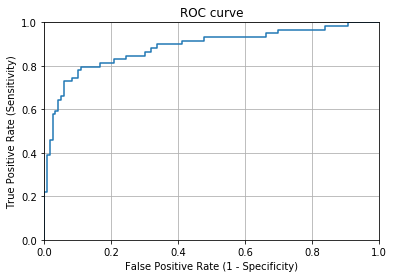

In [140]:
# first argument is true values, second argument is predicted probabilities
# thresholds represents all unique prediction probabilities in descending order
# random guess would be the diagonal line
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [141]:
# Let's try and change the cutoff values and see how it impacts other metrics
preds = pd.DataFrame(y_pred_prob)
preds.columns = ['prob_1']
preds['pred_0.5'] = np.where(preds['prob_1']>0.5, 1, 0)
preds['pred_0.3'] = np.where(preds['prob_1']>0.3, 1, 0)
preds['pred_0.7'] = np.where(preds['prob_1']>0.7, 1, 0)
preds.head()

,prob_1,pred_0.5,pred_0.3,pred_0.7
0,0.129419,0,0,0
1,0.114458,0,0,0
2,0.374297,0,1,0
3,0.110316,0,0,0
4,0.022230,0,0,0


In [142]:
preds['pred_0.5'].value_counts()

0    122
1     56
Name: pred_0.5, dtype: int64

In [143]:
actual_preds = pd.DataFrame(predictions)
actual_preds.columns = ['predictions']
actual_preds['predictions'].value_counts()

0    122
1     56
Name: predictions, dtype: int64

In [144]:
preds['pred_0.3'].value_counts()

0    99
1    79
Name: pred_0.3, dtype: int64

In [145]:
preds['pred_0.7'].value_counts()

0    142
1     36
Name: pred_0.7, dtype: int64

### Evaluation function

In [146]:
def evaluate_model(y_test,predictions):
    conf_matrix = confusion_matrix(y_test,predictions)
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    accuracy = (tn + tp)/(tn + fn + tp + fp)
    sensitivity = recall_score(y_test,predictions)
    specificity = tn / (tn + fp)
    precision = precision_score(y_test,predictions)
    auc = roc_auc_score(y_test,predictions)
    return (accuracy,sensitivity,specificity,precision,auc)

In [147]:
accuracy,sensitivity,specificity,precision,auc = evaluate_model(y_test,predictions)
accuracy,sensitivity,specificity,precision,auc

(0.848314606741573,
 0.7457627118644068,
 0.8991596638655462,
 0.7857142857142857,
 0.8224611878649765)

In [148]:
accuracy,sensitivity,specificity,precision,auc = evaluate_model(y_test,preds['pred_0.5'])
vals_50 = pd.DataFrame.from_records([{'threshold':0.5,'accuracy':accuracy,'sensitivity':sensitivity,'specificity':specificity,'precision':precision,'auc':auc}])
vals_50

,accuracy,auc,precision,sensitivity,specificity,threshold
0,0.848315,0.822461,0.785714,0.745763,0.89916,0.5


In [149]:
accuracy,sensitivity,specificity,precision,auc = evaluate_model(y_test,preds['pred_0.3'])
vals_30 = pd.DataFrame.from_records([{'threshold':0.3,'accuracy':accuracy,'sensitivity':sensitivity,'specificity':specificity,'precision':precision,'auc':auc}])
vals_30

,accuracy,auc,precision,sensitivity,specificity,threshold
0,0.786517,0.80188,0.632911,0.847458,0.756303,0.3


In [150]:
accuracy,sensitivity,specificity,precision,auc = evaluate_model(y_test,preds['pred_0.7'])
vals_70 = pd.DataFrame.from_records([{'threshold':0.7,'accuracy':accuracy,'sensitivity':sensitivity,'specificity':specificity,'precision':precision,'auc':auc}])
vals_70

,accuracy,auc,precision,sensitivity,specificity,threshold
0,0.837079,0.767056,0.916667,0.559322,0.97479,0.7


In [151]:
vals_30.append([vals_50,vals_70])

,accuracy,auc,precision,sensitivity,specificity,threshold
0,0.786517,0.801880,0.632911,0.847458,0.756303,0.3
0,0.848315,0.822461,0.785714,0.745763,0.899160,0.5
0,0.837079,0.767056,0.916667,0.559322,0.974790,0.7


As we see, as we increase the threshold, our confusion matrix changes. Also the sensitivity goes down and specificity increases.

Sensitivity or True positive rate or Recall is measured as how many times did my model predict 1 correctly when it was actually 1. As we increase the cutoff, the number of predicted 1s would decrease or sensitivity would decrease.

Specificity is measured as how many times did my model predict 0 when it was actually 0. As the cutoff increases, the number of predicted 1s will go down or predicted 0s will increase, thus increasing specificity. 

### AUC or area under the curve

AUC is defined as the area under the curve for the ROC curve. Higher the value, better is the model with a maximum value of 1. It is used as a single number summary of model performance. It doesn't depend on any threshold value and can be used even when there is class imbalance.

In [152]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.8856288278023072

In [153]:
accuracy,sensitivity,specificity,precision,auc = evaluate_model(y_test,predictions)
accuracy,sensitivity,specificity,precision,auc

(0.848314606741573,
 0.7457627118644068,
 0.8991596638655462,
 0.7857142857142857,
 0.8224611878649765)

## RFE - feature selection

In [154]:
# model with just 1 variable
model = LogisticRegression()

# create the RFE model and select 4 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(x_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print('Selected features:', x_train.columns[rfe.support_])
print('Feature ranking', rfe.ranking_)

[False False False False  True False False False False]
Selected features: Index(['male'], dtype='object')
Feature ranking [7 5 6 8 1 3 2 9 4]


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

In [155]:
# model with 2 variables
model = LogisticRegression()

# create the RFE model and select 4 attributes
rfe = RFE(model, 2)
rfe = rfe.fit(x_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print('Selected features:', x_train.columns[rfe.support_])
print('Feature ranking', rfe.ranking_)

[False False False False  True False  True False False]
Selected features: Index(['male', 'pclass_3'], dtype='object')
Feature ranking [6 4 5 7 1 2 1 8 3]


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

Instead of we trying a model with each and every possible combination of variables, we can run a loop and check for the best model upto all variables. In this example, sensitivity and specificity would not make too much of difference. We will try and find the best model using AUC value.

In [156]:
nvars = [1,2,3,4,5,6,7,8,9]
for n in nvars:
    logreg = LogisticRegression()
    rfe = RFE(logreg, n)
    rfe.fit(x_train,y_train)
    cols = x_train.columns[rfe.support_]
    x_train2 = x_train[cols]
    x_test2 = x_test[cols]
    mod = logreg.fit(x_train2,y_train)
    y_pred_prob = logreg.predict_proba(x_test2)[:, 1]
    predictions = logreg.predict(x_test2)
    accuracy = accuracy_score(y_test,predictions)
    auc = roc_auc_score(y_test,y_pred_prob)
    print(n)
    print(x_train.columns[rfe.support_])
    print('AUC : ', auc)
    print('Accuracy : ', accuracy)    

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

1
Index(['male'], dtype='object')
AUC :  0.8182595071927075
Accuracy :  0.8426966292134831
2
Index(['male', 'pclass_3'], dtype='object')
AUC :  0.8621991169349095
Accuracy :  0.8426966292134831


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

3
Index(['male', 'pclass_2', 'pclass_3'], dtype='object')
AUC :  0.8716707021791767
Accuracy :  0.8426966292134831
4
Index(['male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
AUC :  0.8741632246118787
Accuracy :  0.8426966292134831
5
Index(['sibsp', 'male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
AUC :  0.8746617290984191
Accuracy :  0.8595505617977528
6
Index(['sibsp', 'parch', 'male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
AUC :  0.8740207947585814
Accuracy :  0.8595505617977528
7
Index(['age', 'sibsp', 'parch', 'male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
AUC :  0.8899729383278734
Accuracy :  0.8595505617977528
8
Index(['age', 'sibsp', 'parch', 'fare', 'male', 'pclass_2', 'pclass_3',
       'embarked_s'],
      dtype='object')
AUC :  0.883207520296254
Accuracy :  0.8651685393258427
9
Index(['age', 'sibsp', 'parch', 'fare', 'male', 'pclass_2', 'pclass_3',
       'embarked_q', 'embarked_s'],
      dtype='object')
AUC :  0.88

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklea

In [157]:
# 1
# Index(['male'], dtype='object')
# AUC :  0.8182595071927075
# Accuracy :  0.8426966292134831
# 2
# Index(['male', 'pclass_3'], dtype='object')
# AUC :  0.8621991169349095
# Accuracy :  0.8426966292134831
# 3
# Index(['male', 'pclass_2', 'pclass_3'], dtype='object')
# AUC :  0.8716707021791767
# Accuracy :  0.8426966292134831
# 4
# Index(['male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
# AUC :  0.8741632246118787
# Accuracy :  0.8426966292134831
# 5
# Index(['sibsp', 'male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
# AUC :  0.8746617290984191
# Accuracy :  0.8595505617977528
# 6
# Index(['sibsp', 'parch', 'male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
# AUC :  0.8740207947585814
# Accuracy :  0.8595505617977528
# 7
# Index(['age', 'sibsp', 'parch', 'male', 'pclass_2', 'pclass_3', 'embarked_s'], dtype='object')
# AUC :  0.8899729383278734
# Accuracy :  0.8595505617977528
# 8
# Index(['age', 'sibsp', 'parch', 'fare', 'male', 'pclass_2', 'pclass_3',
#        'embarked_s'],
#       dtype='object')
# AUC :  0.883207520296254
# Accuracy :  0.8651685393258427
# 9
# Index(['age', 'sibsp', 'parch', 'fare', 'male', 'pclass_2', 'pclass_3',
#        'embarked_q', 'embarked_s'],
#       dtype='object')
# AUC :  0.883207520296254
# Accuracy :  0.8651685393258427

## Quick RandomForest model

In [158]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
imp_feat = pd.DataFrame(model.feature_importances_,x_train.columns)
#imp_feat['var'] = imp_feat.index
imp_feat.reset_index(inplace = True)
imp_feat.columns = ['var','feat_imp']
imp_feat.sort_values(by = 'feat_imp',ascending = False)

,var,feat_imp
0,age,0.301908
3,fare,0.298432
4,male,0.198960
6,pclass_3,0.058349
1,sibsp,0.050209
2,parch,0.039737
8,embarked_s,0.023944
5,pclass_2,0.018085
7,embarked_q,0.010377


In [160]:
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()
# titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
# titanic